<a href="https://colab.research.google.com/github/manjuiitm/mlprojects/blob/main/mlprojects%20/Credit-card-approval-prediction-classification/Credit_card_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=825e1d08d84fe5e08c450c28319558f04f36fcd12221820b556fb877ec57a96b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
!pip install scipy==1.9.3
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.errors import SettingWithCopyWarning
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
import scikitplot as skplt
%matplotlib inline

# 1. Get the data


1.1 import csv file

In [ ]:
cc_data_full_data = pd.read_csv('application_record.csv')
credit_status = pd.read_csv('credit_record.csv')
cc_data_full_data.shape[0]
#credit_status.head()

194659

In [ ]:
credit_status['MONTHS_BALANCE'] = pd.to_numeric(credit_status['MONTHS_BALANCE'], errors='coerce')
#print(credit_status['MONTHS_BALANCE'].isnull().sum())

# 1.2 creating the target variable

In [ ]:
begin_month=pd.DataFrame(credit_status.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'Account age'})
cc_data_full_data=pd.merge(cc_data_full_data,begin_month,how='left',on='ID')
cc_data_full_data.head()

<ipython-input-7-5bf70f9b1946>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  begin_month=pd.DataFrame(credit_status.groupby(['ID'])['MONTHS_BALANCE'].agg(min))


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005        -4542.0   
1        Civil marriage   Rented apartment      -12005        -4542.0   
2               Married  House / apartment      -21474        -1134.0   
3  Single / not married  House / apartment      -19110        -3051.0   
4  Single / not married  House / apartment      -19110        -3051.0   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0         1.0              1.0         0.0         0.0             NaN   
1         1.0              1.0         0.0         0.0             NaN   
2         1.0              0.0         0.0         0.0  Security staff   
3         1.0              0.0         1.0         1.0     Sales staff   
4         1.0              0.0         1.0         1.0     Sales staff   

   CNT_FAM_MEMBERS  Account age  
0              2.0        -15.0  
1              2.0        -14.0  
2              2.0        -29.0  
3              1.0         -4.0  
4              1.0        -26.0

In [ ]:
credit_status['STATUS'] = credit_status['STATUS'].astype(str)

In [ ]:
credit_status['dep_value'] = None  # Default to 'No', can be changed later
credit_status.loc[credit_status['STATUS'].isin(['2', '3', '4', '5']), 'dep_value'] = 'Yes'

In [ ]:
print(credit_status['dep_value'].unique())

[None 'Yes']


In [ ]:
credit_status['STATUS'] = credit_status['STATUS'].str.strip()

In [ ]:
# Group by ID and count the occurrences
cpunt = credit_status.groupby('ID').count()



In [ ]:

# Convert 'dep_value' column to string type to avoid dtype incompatibility
cpunt['dep_value'] = cpunt['dep_value'].astype(str)

# Use .loc for assignment to avoid chained assignment warning
cpunt.loc[cpunt['dep_value'] > '0', 'dep_value'] = 'Yes'  # Assign 'Yes' for values > 0
cpunt.loc[cpunt['dep_value'] == '0', 'dep_value'] = 'No'   # Assign 'No' for values == 0

# Keep only the 'dep_value' column
cpunt = cpunt[['dep_value']]

#print(count_yes,count_no)
# Verify the result
print(cpunt['dep_value'].unique())

['No' 'Yes']


In [ ]:
cc_data_full_data = pd.merge(cc_data_full_data,cpunt,how='inner',on='ID')
cc_data_full_data.to_csv('test1.csv',index=False)
cc_data_full_data['Is high risk']=cc_data_full_data['dep_value']
#cc_data_full_data.head()
cc_data_full_data.loc[cc_data_full_data['Is high risk']=='Yes','Is high risk']=1
cc_data_full_data.loc[cc_data_full_data['Is high risk']=='No','Is high risk']=0
cc_data_full_data.drop('dep_value',axis=1,inplace=True)
pd.options.mode.chained_assignment = None

In [ ]:
cc_data_full_data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005        -4542.0   
1        Civil marriage   Rented apartment      -12005        -4542.0   
2               Married  House / apartment      -21474        -1134.0   
3  Single / not married  House / apartment      -19110        -3051.0   
4  Single / not married  House / apartment      -19110        -3051.0   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0         1.0              1.0         0.0         0.0             NaN   
1         1.0              1.0         0.0         0.0             NaN   
2         1.0              0.0         0.0         0.0  Security staff   
3         1.0              0.0         1.0         1.0     Sales staff   
4         1.0              0.0         1.0         1.0     Sales staff   

   CNT_FAM_MEMBERS  Account age Is high risk  
0              2.0        -15.0            0  
1              2.0        -14.0            0  
2              2.0        -29.0            0  
3              1.0         -4.0            0  
4              1.0        -26.0            0

# 1.3 Rename features

In [ ]:
# rename the features to a more readable feature names
cc_data_full_data = cc_data_full_data.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment status',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family member count',
    'Account age': 'Account age'
    })

# 1.4 Split the data into training and test sets, creating a copy of the datasets

In [ ]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [ ]:
cc_train_original, cc_test_original = data_split(cc_data_full_data, 0.2)

In [ ]:
cc_train_original.shape

(28884, 20)

In [ ]:
cc_test_original.shape

(7221, 20)

In [ ]:
cc_train_original.to_csv('train.csv',index=False)

In [ ]:
cc_test_original.to_csv('test.csv',index=False)

In [ ]:
# creating a copy of the dataset so that the original stays untouched
cc_train_copy = cc_train_original.copy()
cc_test_copy = cc_test_original.copy()

# 2. Explore the Data


# 2.0 Pandas Profiling

In [ ]:
from ydata_profiling import ProfileReport
profile_report = ProfileReport(cc_train_copy, explorative=True)
profile_report_file_path = Path('income_class_profile.html')

  #checking if the pandas profile report file exists in the current directory
try:
    profile_report_file_path.resolve(strict=True)
except FileNotFoundError:
    profile_report.to_file("income_class_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2.1 Quick glance at the data

In [ ]:
cc_data_full_data.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5008804      M         Y              Y               0  427500.0   
1  5008805      M         Y              Y               0  427500.0   
2  5008806      M         Y              Y               0  112500.0   
3  5008808      F         N              Y               0  270000.0   
4  5008809      F         N              Y               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

            Dwelling    Age  Employment length  Has a mobile phone  \
0   Rented apartment -12005            -4542.0                 1.0   
1   Rented apartment -12005            -4542.0                 1.0   
2  House / apartment -21474            -1134.0                 1.0   
3  House / apartment -19110            -3051.0                 1.0   
4  House / apartment -19110            -3051.0                 1.0   

   Has a work phone  Has a phone  Has an email       Job title  \
0               1.0          0.0           0.0             NaN   
1               1.0          0.0           0.0             NaN   
2               0.0          0.0           0.0  Security staff   
3               0.0          1.0           1.0     Sales staff   
4               0.0          1.0           1.0     Sales staff   

   Family member count  Account age Is high risk  
0                  2.0        -15.0            0  
1                  2.0        -14.0            0  
2                  2.0        -29.0            0  
3                  1.0         -4.0            0  
4                  1.0        -26.0            0

In [ ]:
cc_data_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36105 non-null  int64  
 1   Gender               36105 non-null  object 
 2   Has a car            36105 non-null  object 
 3   Has a property       36105 non-null  object 
 4   Children count       36105 non-null  int64  
 5   Income               36105 non-null  float64
 6   Employment status    36105 non-null  object 
 7   Education level      36105 non-null  object 
 8   Marital status       36105 non-null  object 
 9   Dwelling             36105 non-null  object 
 10  Age                  36105 non-null  int64  
 11  Employment length    36105 non-null  float64
 12  Has a mobile phone   36105 non-null  float64
 13  Has a work phone     36105 non-null  float64
 14  Has a phone          36105 non-null  float64
 15  Has an email         36105 non-null 

In [ ]:
cc_data_full_data.describe()

ID  Children count        Income           Age  \
count  3.610500e+04    36105.000000  3.610500e+04  36105.000000   
mean   5.078205e+06        0.430854  1.866752e+05 -15976.549453   
std    4.186918e+04        0.742747  1.018650e+05   4200.196605   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042019e+06        0.000000  1.215000e+05 -19439.000000   
50%    5.074548e+06        0.000000  1.575000e+05 -15564.000000   
75%    5.114649e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150487e+06       19.000000  1.575000e+06  -7489.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       36105.000000             36105.0      36105.000000  36105.000000   
mean        59190.176818                 1.0          0.225592      0.295278   
std        137591.973094                 0.0          0.417977      0.456174   
min        -15713.000000                 1.0          0.000000      0.000000   
25%         -3153.000000                 1.0          0.000000      0.000000   
50%         -1555.000000                 1.0          0.000000      0.000000   
75%          -410.000000                 1.0          0.000000      1.000000   
max        365243.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  
count  36105.000000         36105.000000  36105.000000  
mean       0.089766             2.199501    -26.171555  
std        0.285850             0.911920     16.532223  
min        0.000000             1.000000    -60.000000  
25%        0.000000             2.000000    -39.000000  
50%        0.000000             2.000000    -24.000000  
75%        0.000000             3.000000    -12.000000  
max        1.000000            20.000000      0.000000


The code you provided uses the msno.matrix(cc_data_full_data) and plt.show() functions, and it is likely related to visualizing missing data within the cc_data_full_data DataFrame. Let's break down what each part does:msno.matrix(): This function generates a matrix plot that visualizes the missing data in the DataFrame.
Each row corresponds to one entry in the DataFrame.
Each column corresponds to a feature (or column) in the DataFrame.
White lines in the plot represent missing data, and colored lines represent non-missing data.

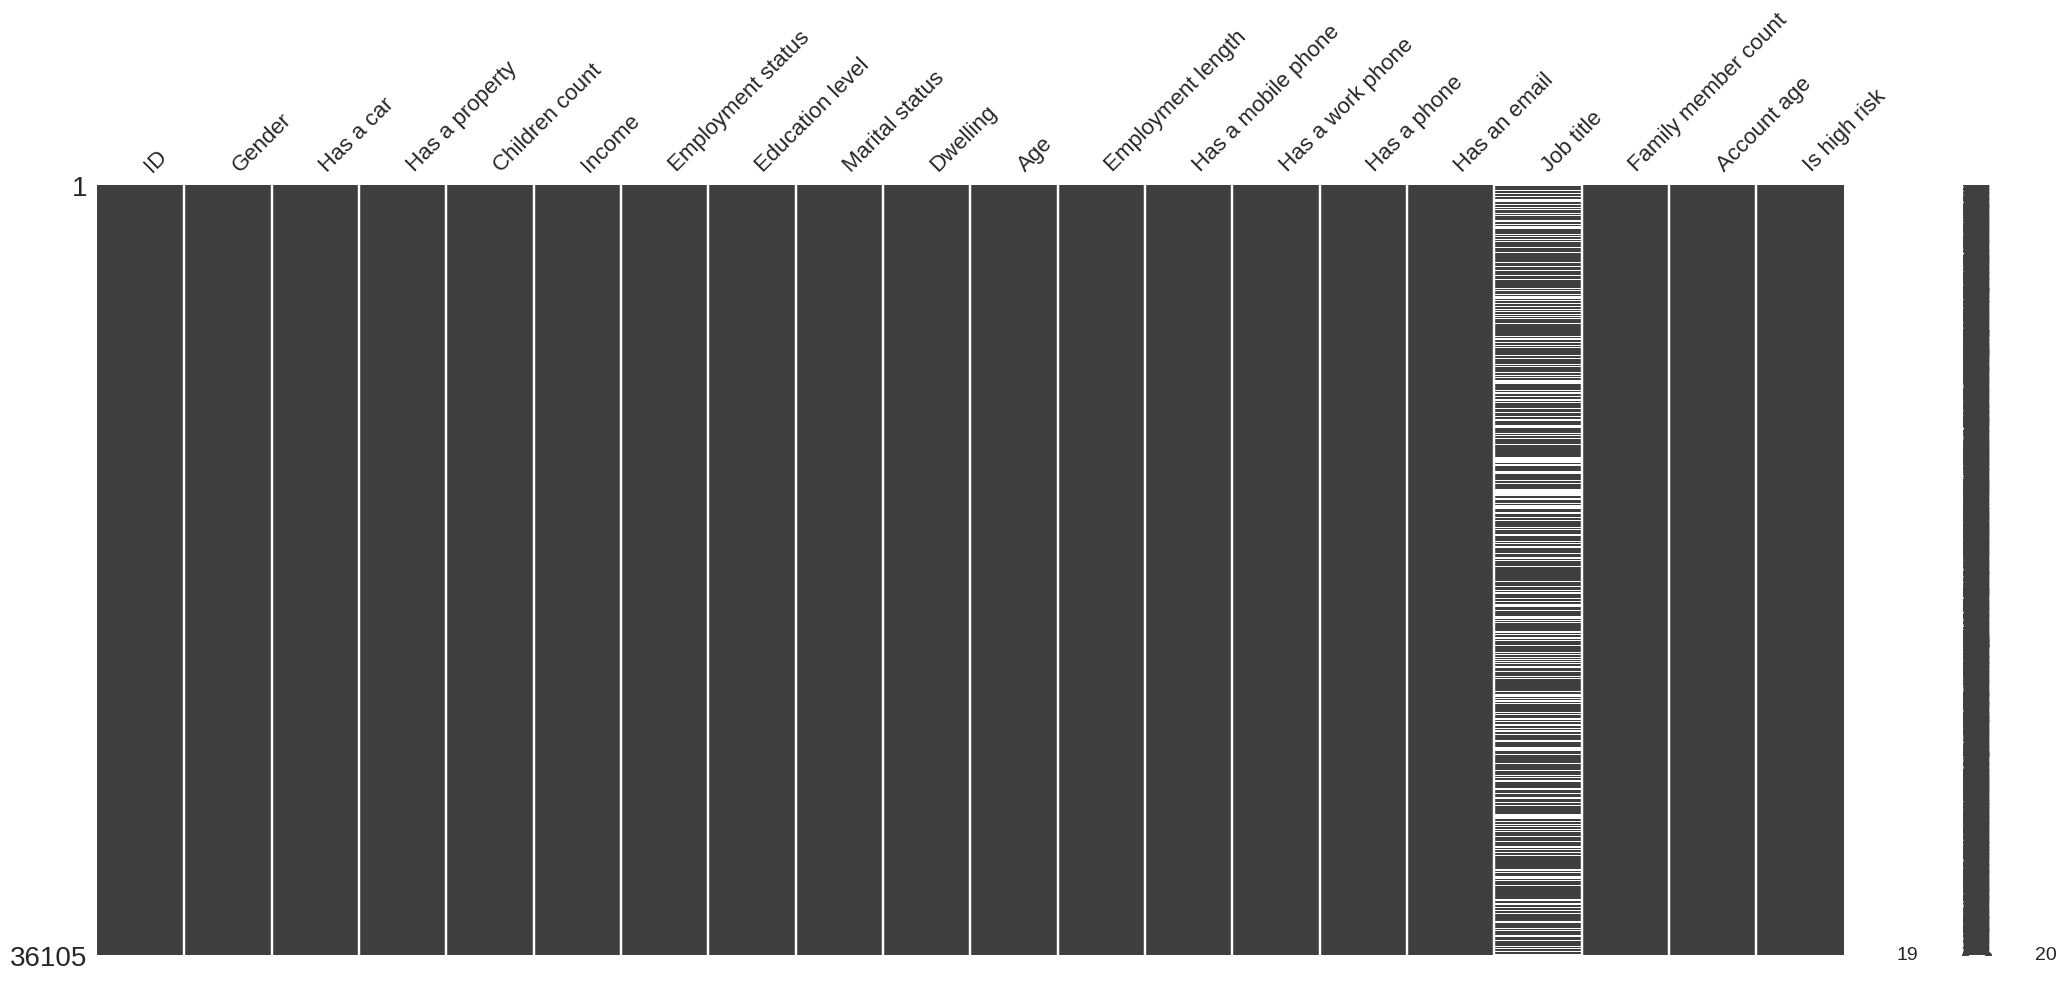

In [ ]:
msno.matrix(cc_data_full_data)
plt.show()

The code msno.bar(cc_data_full_data) and plt.show() is used to visualize missing data in the cc_data_full_data DataFrame using the missingno library. Here's a detailed breakdown of what each part is doing:

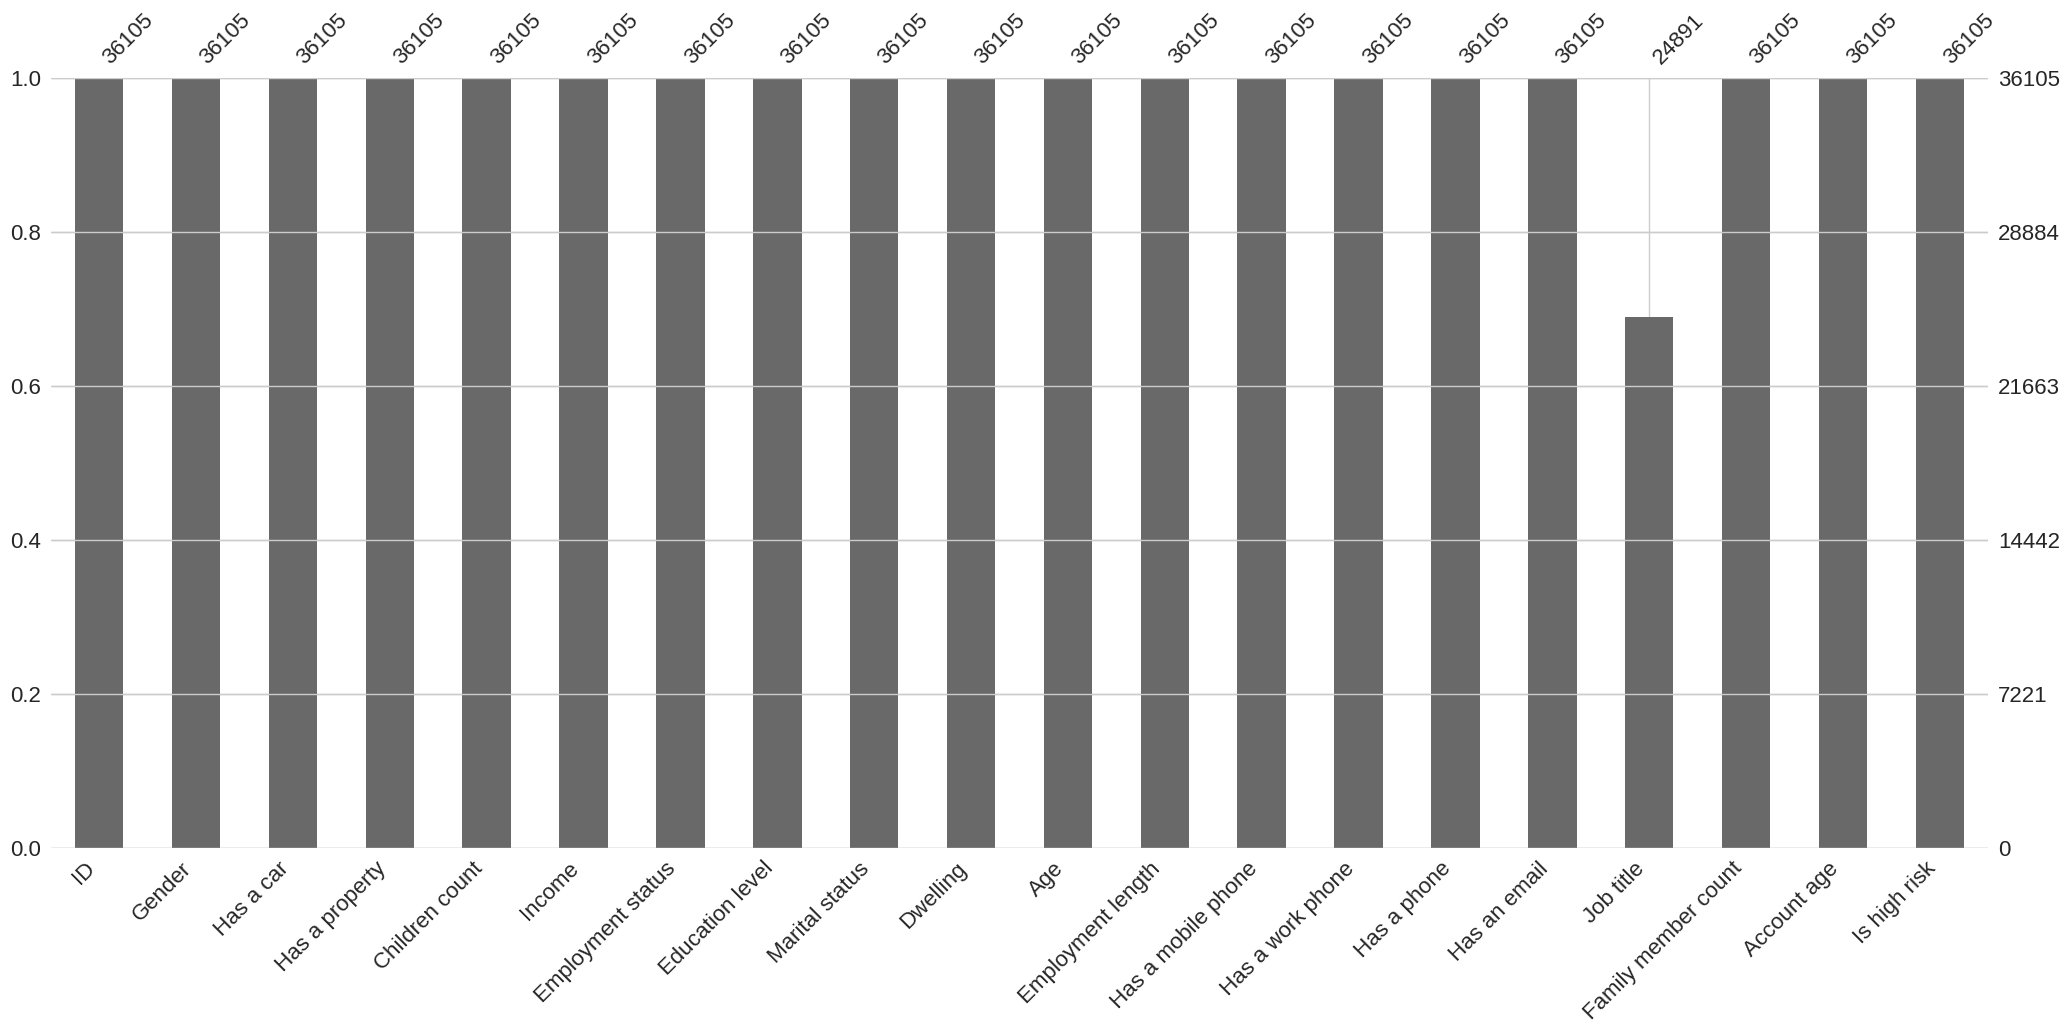

In [ ]:
msno.bar(cc_data_full_data)
plt.show()

# 2.2 Functions used to explore each feature

In [ ]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [ ]:
# function to create display general information about the feature
def gen_info_feat(df,feature):
    match feature:
        case 'Age':
            # change the feature to be express in positive numbers days
            print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
            print('*'*50)
            print('Object type:{}'.format(df[feature].dtype))
        case 'Employment length':
            # select only the rows where the rows are negative to ignore whose who have retired or unemployed
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
            print('*'*50)
            print('Object type:{}'.format(employment_len_no_ret.dtype))
        case 'Account age':
            # change the account age to a positive number of months
            print('Description:\n{}'.format((np.abs(df[feature])).describe()))
            print('*'*50)
            print('Object type:{}'.format(df[feature].dtype))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [ ]:
# function to create a pie chart plot
def create_pie_plot(df,feature):
    match feature:
        case 'Dwelling' | 'Education level':
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best',labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()
        case _:
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best')
            plt.axis('equal')
            return plt.show()

In [ ]:
# function to create a bar chart plot
def create_bar_plot(df,feature):
    match feature:
        case 'Marital status' | 'Dwelling' | 'Job title' | 'Employment status' | 'Education level':
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()

In [ ]:
# function to create a box plot
def create_box_plot(df,feature):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(2,8))
            # change the feature to be express in positive numbers days
            sns.boxplot(y=np.abs(df[feature])/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case 'Children count':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,df[feature].max(),1))
            return plt.show()
        case 'Employment length':
            fig, ax = plt.subplots(figsize=(2,8))
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            # employement length in days is a negative number so we need to change it to positive and change it to days
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            sns.boxplot(y=employment_len_no_ret_yrs)
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,employment_len_no_ret_yrs.max(),2))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            return plt.show()
        case 'Account age':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=np.abs(df[feature]))
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [ ]:
# function to create a histogram plot
def create_hist_plot(df,feature, the_bins=50):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(18,10))
            # change the feature to be express in positive numbers days
            sns.histplot(np.abs(df[feature])/365.25,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            # suppress scientific notation
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Employment length':
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            # change the feature to be express in positive numbers days
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(employment_len_no_ret_yrs,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Account age':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(np.abs(df[feature]),bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [ ]:
# High risk vs low risk applicants compared on a box plot
def low_high_risk_box_plot(df,feature):
    match feature:
        case 'Age':
            print(np.abs(df.groupby('Is high risk')[feature].mean()/365.25))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature])/365.25,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by age')
            return plt.show()
        case 'Income':
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()
        case 'Employment length':
            #checking is an applicant is high risk or not (for those who have negative employment length aka the employed ones)
            employment_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] <0]
            employment_no_ret_idx = employment_no_ret.index
            employment_len_no_ret_yrs = np.abs(employment_no_ret)/365.25
            employment_no_ret_df = cc_train_copy.iloc[employment_no_ret_idx][['Employment length','Is high risk']]
            employment_no_ret_is_high_risk = employment_no_ret_df.groupby('Is high risk')['Employment length'].mean()
            # compare the age of high risk individuals with the age of low risk individuals (those who are employed)
            print(np.abs(employment_no_ret_is_high_risk)/365.25)
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=employment_len_no_ret_yrs,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High vs low risk individuals grouped by {}'.format(feature))
            return plt.show()
        case _:
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()

In [ ]:
# High risk vs low risk applicants compared on a bar plot
def low_high_risk_bar_plot(df,feature):
    is_high_risk_grp = df.groupby(feature)['Is high risk'].sum()
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    print(dict(is_high_risk_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=is_high_risk_grp_srt.index,y=is_high_risk_grp_srt.values)
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('High risk applicants count grouped by {}'.format(feature))
    return plt.show()

In [ ]:
cc_train_copy.shape

(28884, 20)

# 2.3 Univariate analysis
# 2.3.1. Gender

In [ ]:
gen_info_feat(cc_train_copy,'Gender')

Description:
count     28884
unique        2
top           F
freq      19355
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
        Count  Frequency (%)
Gender                      
F       19355      67.009417
M        9529      32.990583


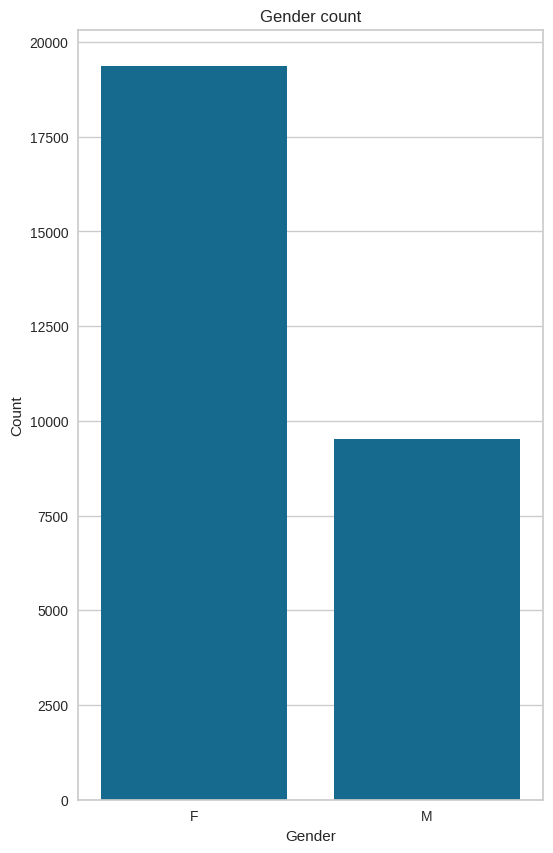

In [ ]:
create_bar_plot(cc_train_copy,'Gender')

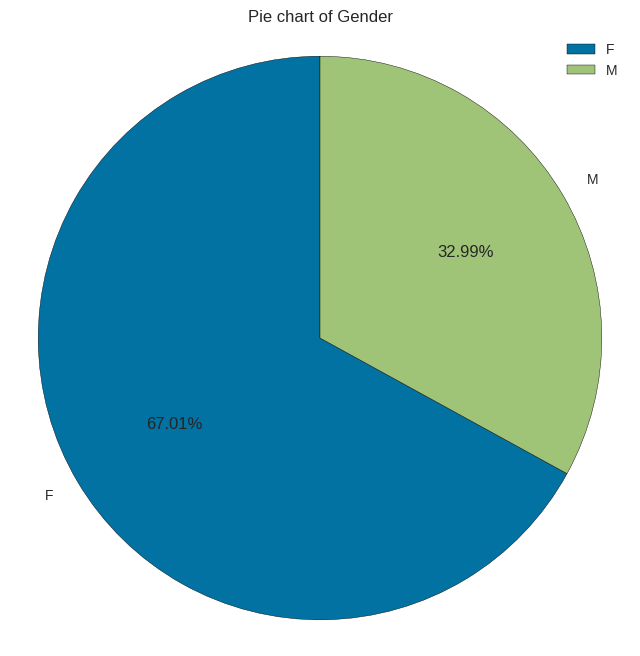

In [ ]:
create_pie_plot(cc_train_copy,'Gender')

Interpretation:

We have more female applicants than male (67% vs 32%)

2.3.2 Age

In [ ]:
gen_info_feat(cc_train_copy,'Age')

Description:
count    28884.000000
mean        43.716582
std         11.486911
min         21.095140
25%         34.154689
50%         42.606434
75%         53.137577
max         68.862423
Name: Age, dtype: float64
**************************************************
Object type:int64


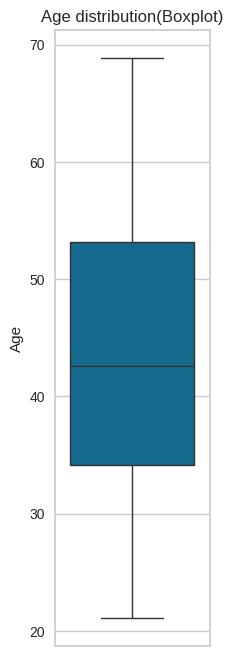

In [ ]:
create_box_plot(cc_train_copy,'Age')

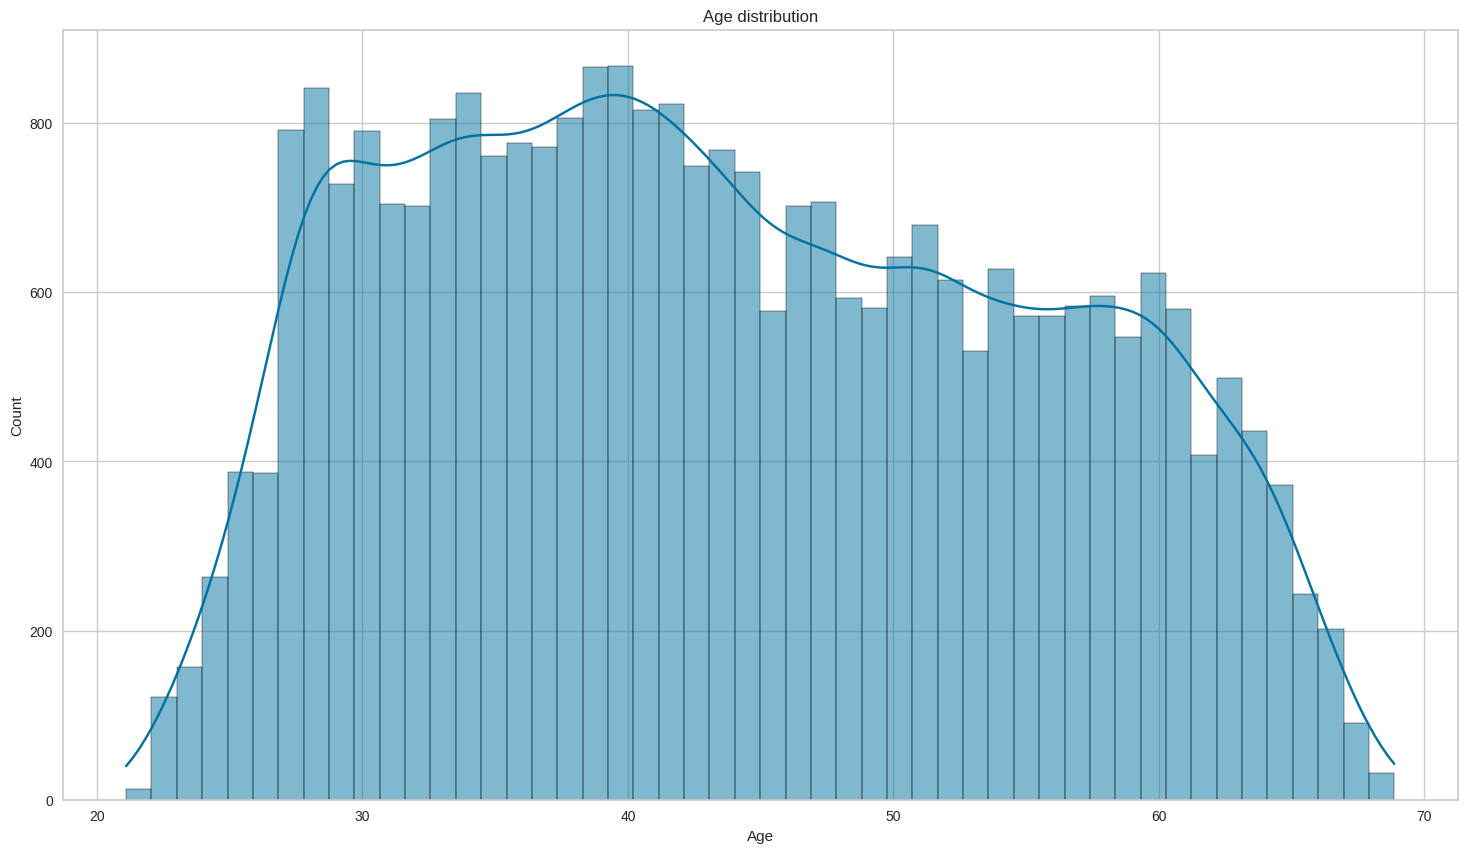

In [ ]:
create_hist_plot(cc_train_copy,'Age')

In [ ]:
cc_train_copy

ID Gender Has a car Has a property  Children count    Income  \
0      5117241      M         N              Y               0  135000.0   
1      5090978      F         N              N               0  180000.0   
2      5053049      F         N              Y               0  157500.0   
3      5022316      M         Y              N               1  270000.0   
4      5117514      F         N              N               0   90000.0   
...        ...    ...       ...            ...             ...       ...   
28879  5067139      F         N              Y               0  112500.0   
28880  5029193      F         N              Y               1  135000.0   
28881  5047710      F         N              Y               0   76500.0   
28882  5009886      F         N              Y               0  157500.0   
28883  5062632      F         N              Y               0  585000.0   

          Employment status                Education level  \
0                   Working  Secondary / secondary special   
1                   Working  Secondary / secondary special   
2                 Pensioner  Secondary / secondary special   
3      Commercial associate               Higher education   
4                   Working  Secondary / secondary special   
...                     ...                            ...   
28879             Pensioner  Secondary / secondary special   
28880  Commercial associate  Secondary / secondary special   
28881               Working  Secondary / secondary special   
28882             Pensioner  Secondary / secondary special   
28883  Commercial associate  Secondary / secondary special   

             Marital status             Dwelling    Age  Employment length  \
0                   Married    House / apartment -13826            -7128.0   
1                 Separated    House / apartment -13774            -2684.0   
2      Single / not married         With parents  -8149           365243.0   
3                   Married    House / apartment -11373            -1371.0   
4      Single / not married  Municipal apartment -10490             -796.0   
...                     ...                  ...    ...                ...   
28879  Single / not married    House / apartment -23400           365243.0   
28880               Married    House / apartment -15532            -8256.0   
28881               Married    House / apartment -17782            -3291.0   
28882        Civil marriage    House / apartment -21635           365243.0   
28883               Married    House / apartment -18858            -2010.0   

       Has a mobile phone  Has a work phone  Has a phone  Has an email  \
0                     1.0               0.0          0.0           0.0   
1                     1.0               0.0          0.0           0.0   
2                     1.0               0.0          0.0           0.0   
3                     1.0               0.0          0.0           0.0   
4                     1.0               1.0          0.0           0.0   
...                   ...               ...          ...           ...   
28879                 1.0               0.0          1.0           1.0   
28880                 1.0               0.0          0.0           0.0   
28881                 1.0               1.0          1.0           0.0   
28882                 1.0               0.0          1.0           0.0   
28883                 1.0               0.0          1.0           0.0   

           Job title  Family member count  Account age Is high risk  
0           Laborers                  2.0        -16.0            0  
1      Cooking staff                  1.0         -3.0            0  
2                NaN                  1.0        -14.0            0  
3           Managers                  3.0        -15.0            0  
4           Laborers                  1.0         -1.0            0  
...              ...                  ...          ...          ...  
28879            NaN                  

Is high risk
0    43.719111
1    43.390027
Name: Age, dtype: float64


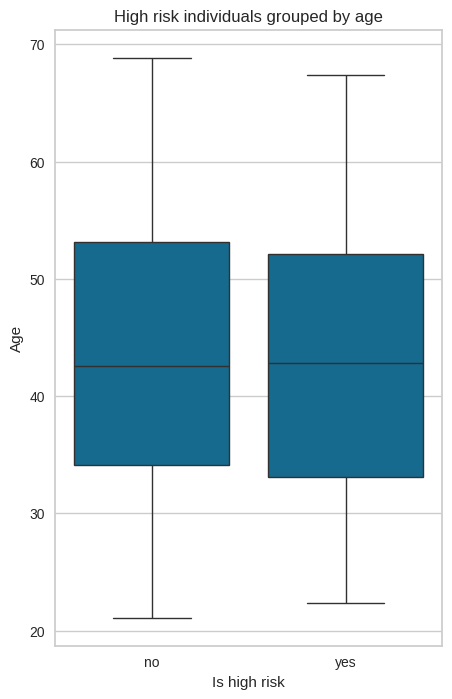

In [ ]:
low_high_risk_box_plot(cc_train_copy,'Age')

Interpretation:

The youngest applicant is 21 years old while the oldest is 68 years old. with the average of 43.7 and median of 42.6(outliers insensitive)
Age feature is not normally distributed, it is slightly positively skew
There is no difference between the average age of high and low risk applicants

Is high risk
0    43.822750
1    46.911639
Name: Age, dtype: float64


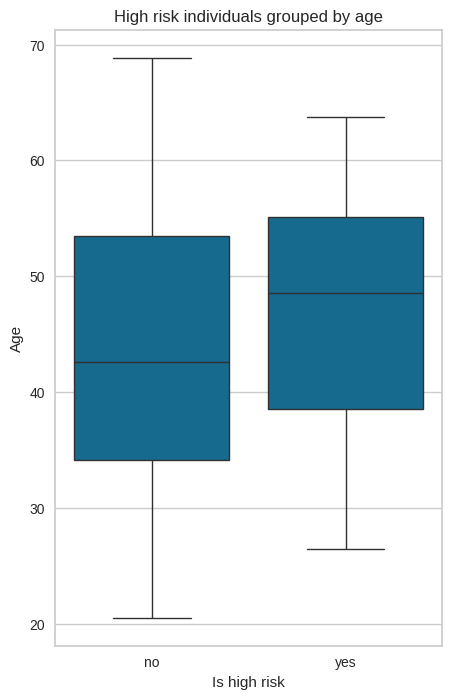

In [ ]:
low_high_risk_box_plot(cc_test_copy,'Age')

# 2.3.3 Marital status

In [ ]:

gen_info_feat(cc_train_copy,'Marital status')

Description:
count       28884
unique          5
top       Married
freq        19906
Name: Marital status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Marital status                            
Married               19906      68.917048
Single / not married   3775      13.069519
Civil marriage         2294       7.942113
Separated              1717       5.944468
Widow                  1192       4.126852


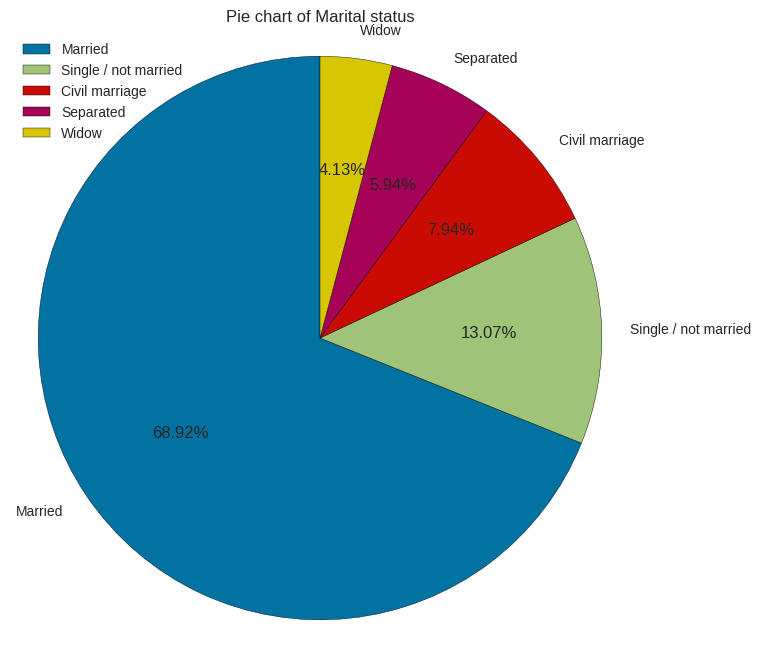

In [ ]:
create_pie_plot(cc_train_copy,'Marital status')

<ipython-input-33-476d26df2ae7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')


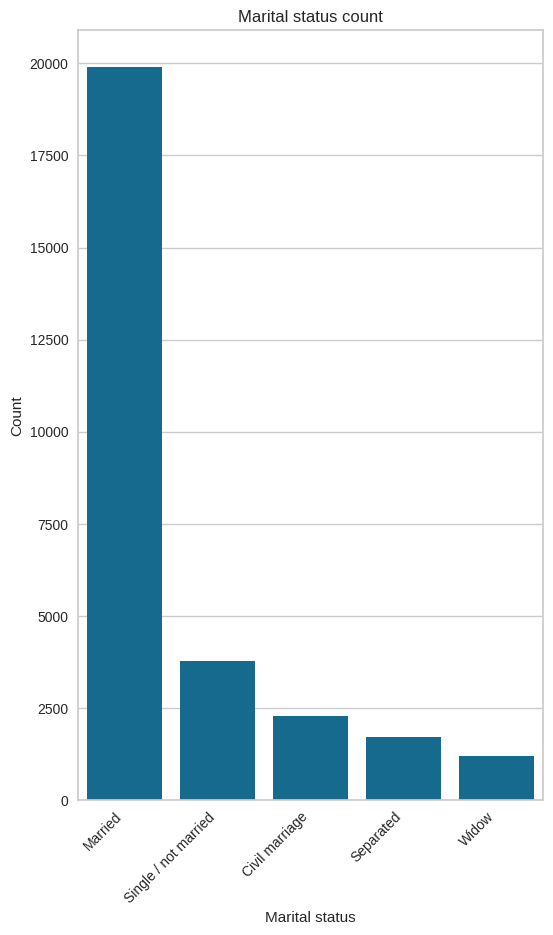

In [ ]:
create_bar_plot(cc_train_copy,'Marital status')

{'Married': 151, 'Single / not married': 29, 'Separated': 16, 'Civil marriage': 14, 'Widow': 12}


<ipython-input-37-4c0b93933b46>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')


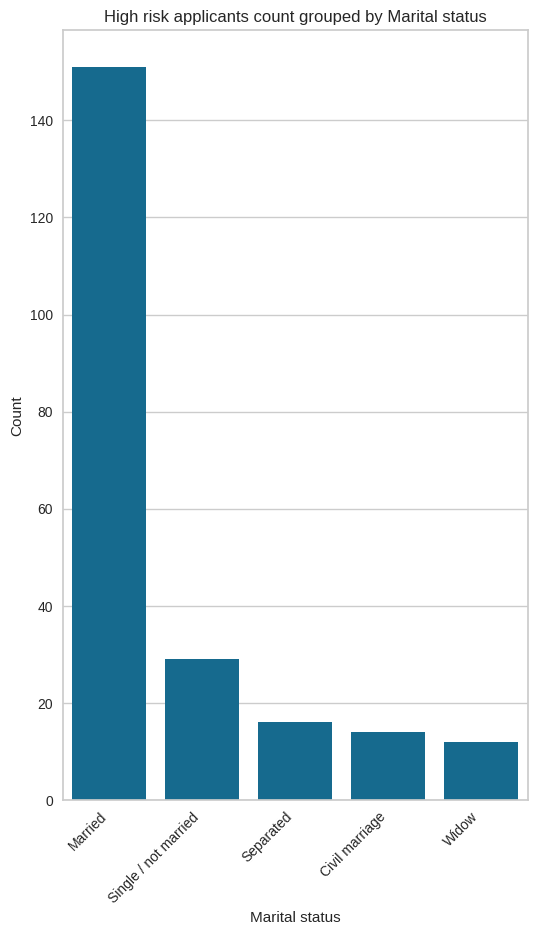

In [ ]:
low_high_risk_bar_plot(cc_train_copy,'Marital status')

Interpretation:

Most applicants are married
Even though we have a higher number of applicants who are separated than those who are widow, it seems like widow applicants are high risk than those who are separated.

# 2.3.4 Family member count

In [ ]:
gen_info_feat(cc_train_copy,'Family member count')

Description:
count    28884.000000
mean         2.199834
std          0.907114
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: Family member count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
                     Count  Frequency (%)
Family member count                      
2.0                  15419      53.382495
1.0                   5518      19.104002
3.0                   5090      17.622213
4.0                   2479       8.582606
5.0                    311       1.076721
6.0                     46       0.159258
7.0                     17       0.058856
15.0                     2       0.006924
9.0                      2       0.006924


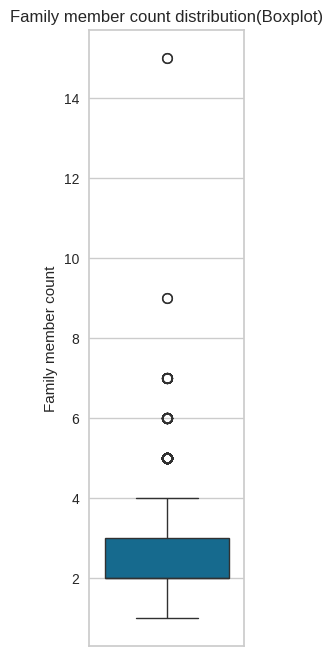

In [ ]:
create_box_plot(cc_train_copy,'Family member count')

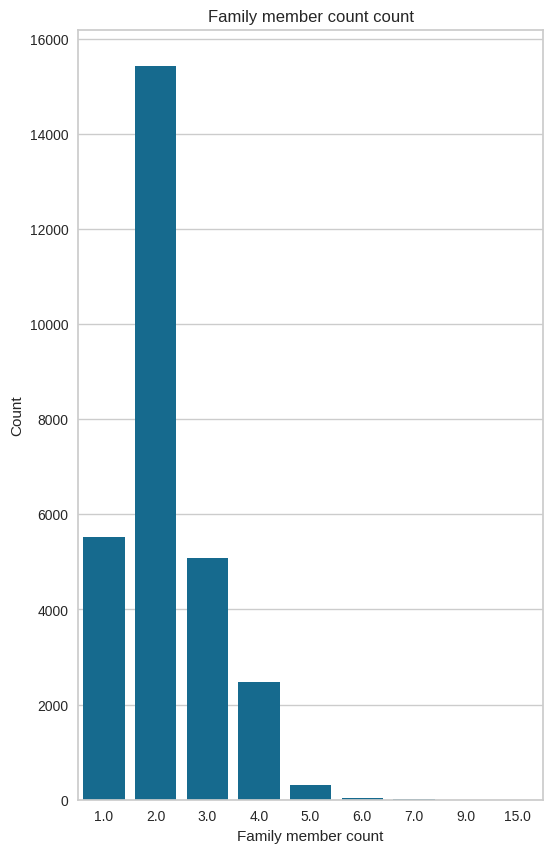

In [ ]:
create_bar_plot(cc_train_copy,'Family member count')

Interpretation:

Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child (more on this in a bit)
We also have 6 outliers, 2 of them are extreme with 20 and 15 members in their household

# 2.3.5 Children count

In [ ]:
gen_info_feat(cc_train_copy,'Children count')

Description:
count    28884.000000
mean         0.431242
std          0.736391
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         14.000000
Name: Children count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                Count  Frequency (%)
Children count                      
0               19945      69.052070
1                5937      20.554632
2                2604       9.015372
3                 325       1.125190
4                  51       0.176568
5                  18       0.062318
14                  2       0.006924
7                   2       0.006924


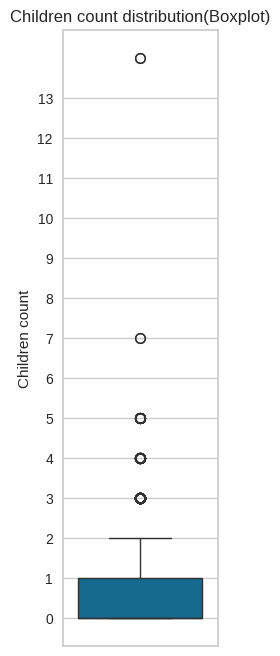

In [ ]:
create_box_plot(cc_train_copy,'Children count')

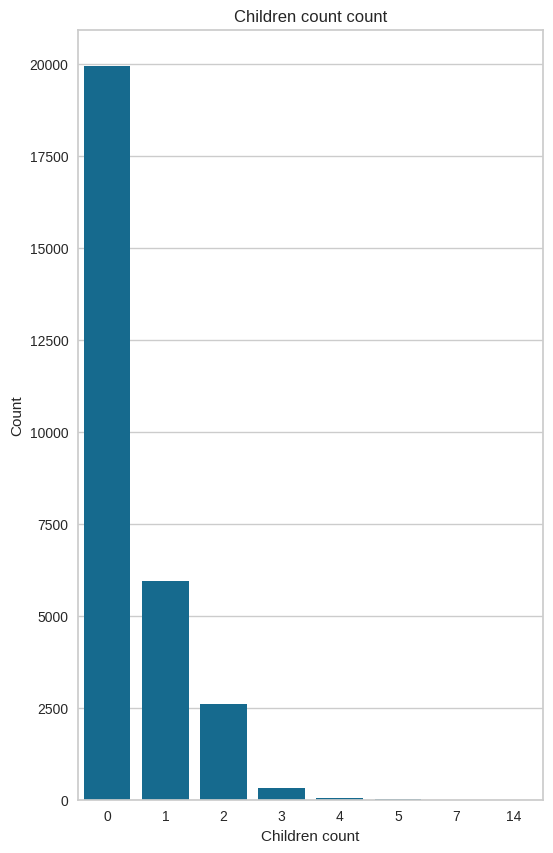

In [ ]:
create_bar_plot(cc_train_copy,'Children count')

Interpretation:

As previously discussed most applicant don’t have a child
Also here we have 6 outliers, probably the same from the family member count

# 2.3.6 Dwelling type

In [ ]:
gen_info_feat(cc_train_copy,'Dwelling')

Description:
count                 28884
unique                    6
top       House / apartment
freq                  25789
Name: Dwelling, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Dwelling                                 
House / apartment    25789      89.284725
With parents          1404       4.860823
Municipal apartment    884       3.060518
Rented apartment       463       1.602964
Office apartment       208       0.720122
Co-op apartment        136       0.470849


<ipython-input-33-476d26df2ae7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')


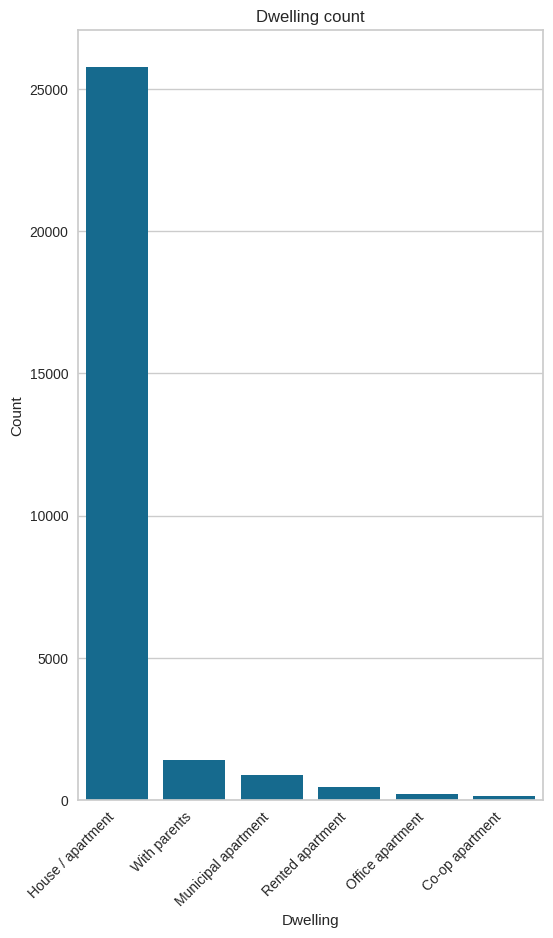

In [ ]:
create_bar_plot(cc_train_copy,'Dwelling')

Interpretation:

Almost every applicants live in house or apartment

# 2.3.7 Income

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gen_info_feat(cc_train_copy,'Income')

Description:
count     28884.00
mean     186980.15
std      101410.75
min       27000.00
25%      121500.00
50%      157500.00
75%      225000.00
max     1575000.00
Name: Income, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
           Count  Frequency (%)
Income                         
135000.00   3453          11.95
157500.00   2470           8.55
180000.00   2450           8.48
225000.00   2335           8.08
112500.00   2329           8.06
...          ...            ...
51750.00       1           0.00
432000.00      1           0.00
177750.00      1           0.00
151200.00      1           0.00
82350.00       1           0.00

[257 rows x 2 columns]


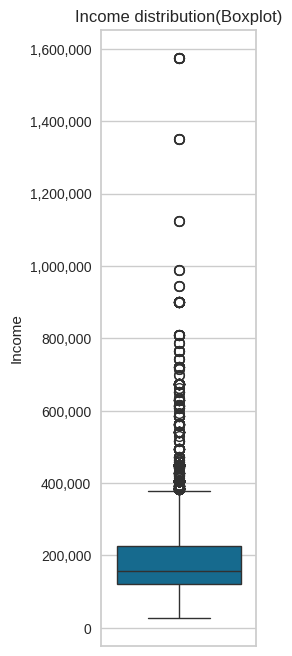

In [ ]:

create_box_plot(cc_train_copy,'Income')

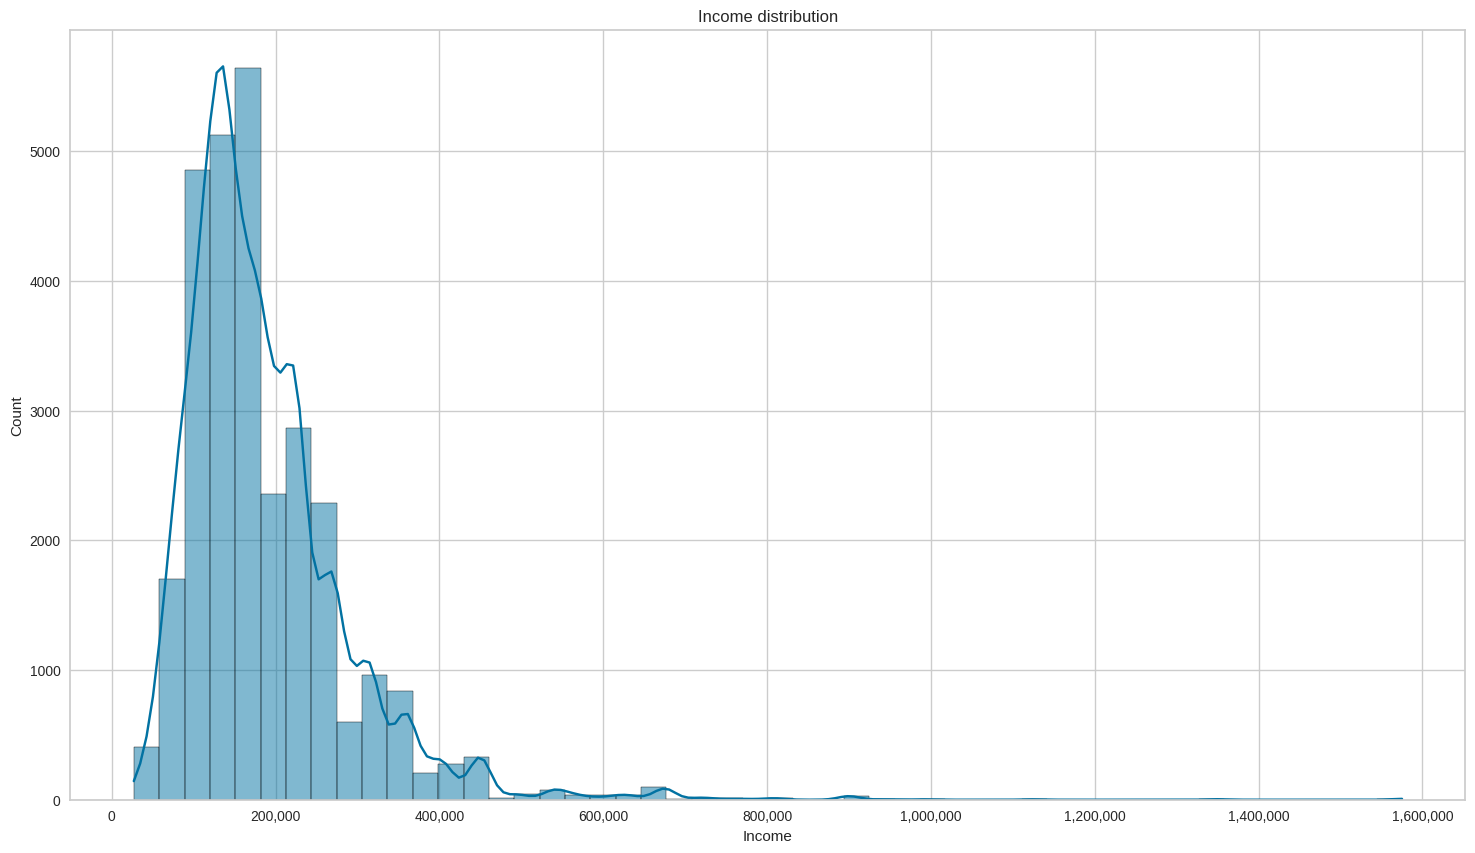

In [ ]:

create_hist_plot(cc_train_copy,'Income')

# bivariate analysis with target variable

Is high risk
0   186967.14
1   188659.11
Name: Income, dtype: float64


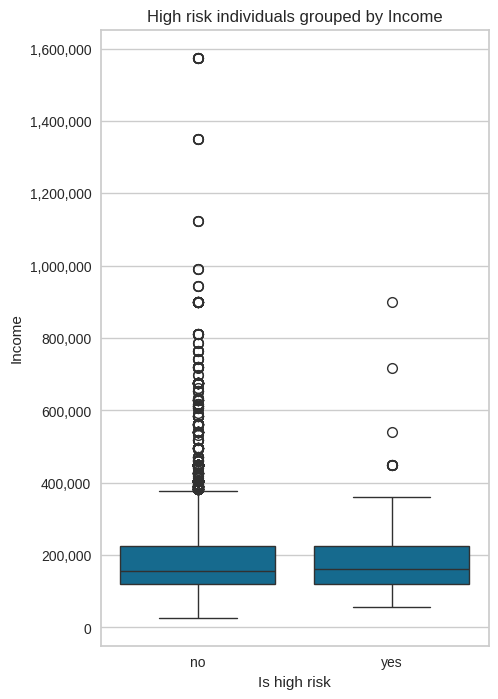

In [ ]:

low_high_risk_box_plot(cc_train_copy,'Income')

Interpretation:

The average income is 186890 but this amount accounts for outliers. If we ignore the outlier most people make 157500
We have 3 applicants who makes more than 1000000
This feature is positively skewed
High risk and low risk applicants have roughly similar income

# 2.3.8 Job title

In [ ]:

gen_info_feat(cc_train_copy,'Job title')

Description:
count        19984
unique          18
top       Laborers
freq          4979
Name: Job title, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Job title                                  
Laborers                4979          24.91
Core staff              2822          14.12
Sales staff             2767          13.85
Managers                2383          11.92
Drivers                 1720           8.61
High skill tech staff   1128           5.64
Accountants              984           4.92
Medicine staff           935           4.68
Cooking staff            546           2.73
Security staff           446           2.23
Cleaning staff           434           2.17
Private service staff    284           1.42
Low-skill Laborers       131           0.66
Waiters/barmen staff     129           0.65
Secretaries              119           0.

In [ ]:
job_title_nan_count = cc_train_copy['Job title'].isna().sum()
job_title_nan_count

8900

In [ ]:
rows_total_count = cc_train_copy.shape[0]

In [ ]:
print('The percentage of missing rows is {:.2f} %'.format(job_title_nan_count * 100 / rows_total_count))

The percentage of missing rows is 30.81 %


<ipython-input-33-476d26df2ae7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')


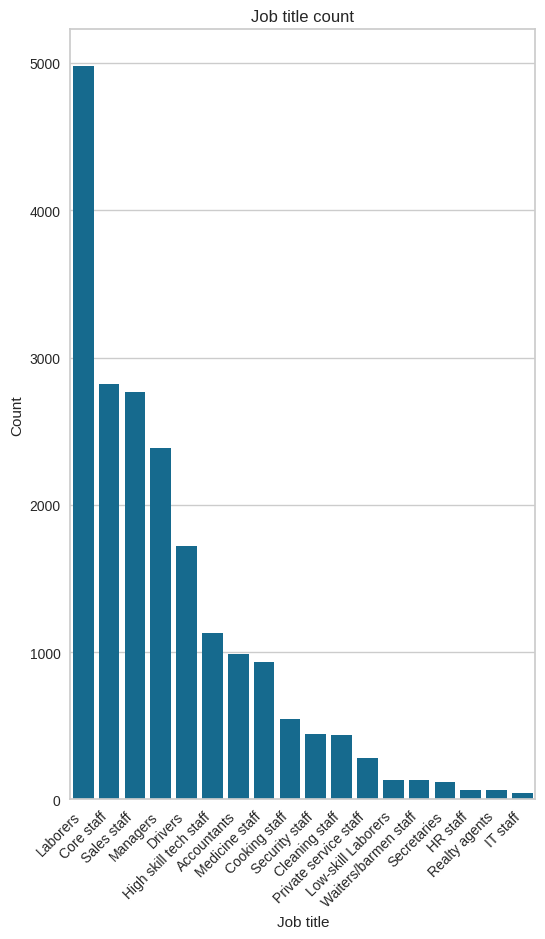

In [ ]:
create_bar_plot(cc_train_copy,'Job title')

Interpretation:

The most prolific Job title is laborers by far
We have 30.95% if missing data

# 2.3.9 Employment status

In [ ]:

gen_info_feat(cc_train_copy,'Employment status')

Description:
count       28884
unique          5
top       Working
freq        14918
Name: Employment status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Employment status                         
Working               14918          51.65
Commercial associate   6784          23.49
Pensioner              4801          16.62
State servant          2374           8.22
Student                   7           0.02


<ipython-input-33-476d26df2ae7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')


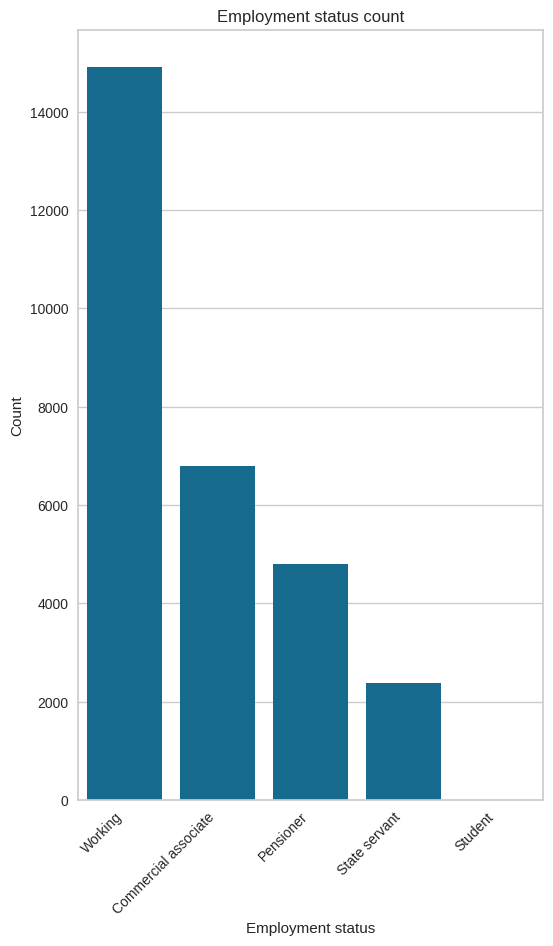

In [ ]:
create_bar_plot(cc_train_copy,'Employment status')

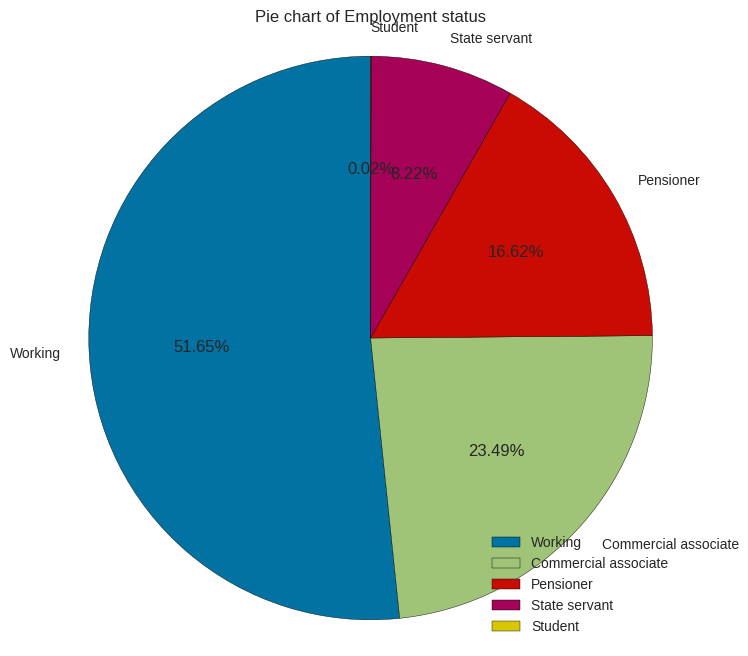

In [ ]:
create_pie_plot(cc_train_copy,'Employment status')

# Interpretation:

Most applicants are employed

# 2.3.10 Education level

In [ ]:

gen_info_feat(cc_train_copy,'Education level')

Description:
count                             28884
unique                                5
top       Secondary / secondary special
freq                              19606
Name: Education level, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                               Count  Frequency (%)
Education level                                    
Secondary / secondary special  19606          67.88
Higher education                7830          27.11
Incomplete higher               1132           3.92
Lower secondary                  290           1.00
Academic degree                   26           0.09


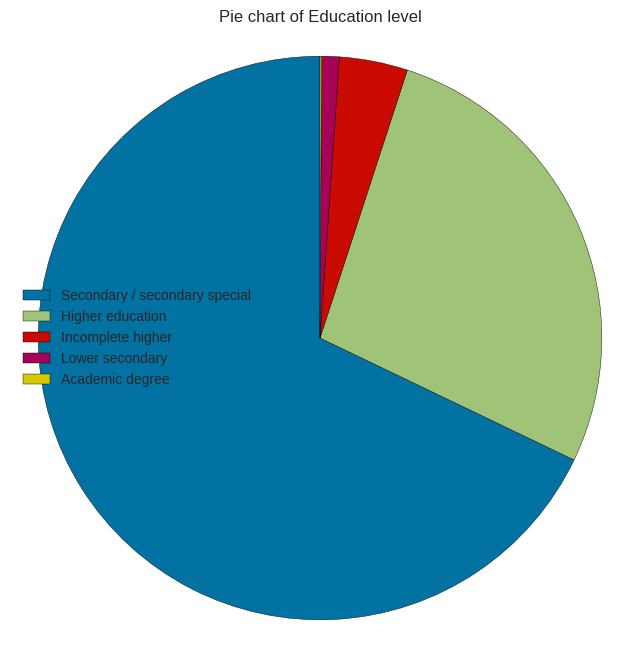

In [ ]:

create_pie_plot(cc_train_copy,'Education level')

<ipython-input-33-476d26df2ae7>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')


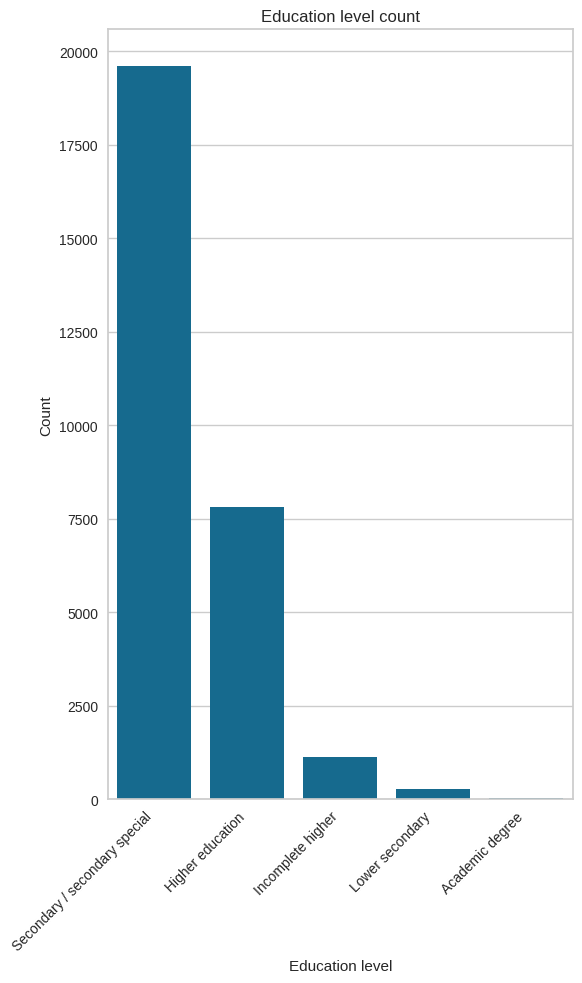

In [ ]:
create_bar_plot(cc_train_copy,'Education level')

Interpretation:

The majority of applicants have completed their secondary degree, ¼ completed their higher education


2.3.11 Employment length

In [ ]:

gen_info_feat(cc_train_copy,'Employment length')

Description:
count   24083.00
mean        7.28
std         6.47
min         0.05
25%         2.69
50%         5.50
75%         9.60
max        43.02
Name: Employment length, dtype: float64
**************************************************
Object type:float64


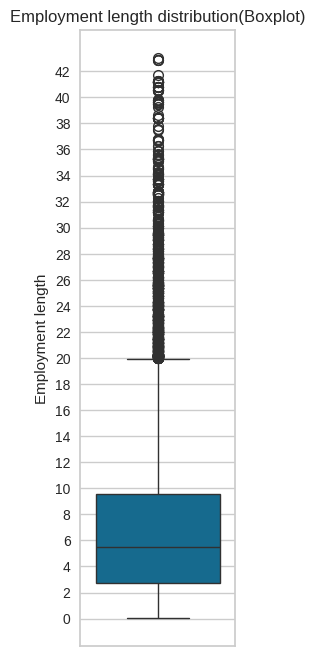

In [ ]:
create_box_plot(cc_train_copy,'Employment length')

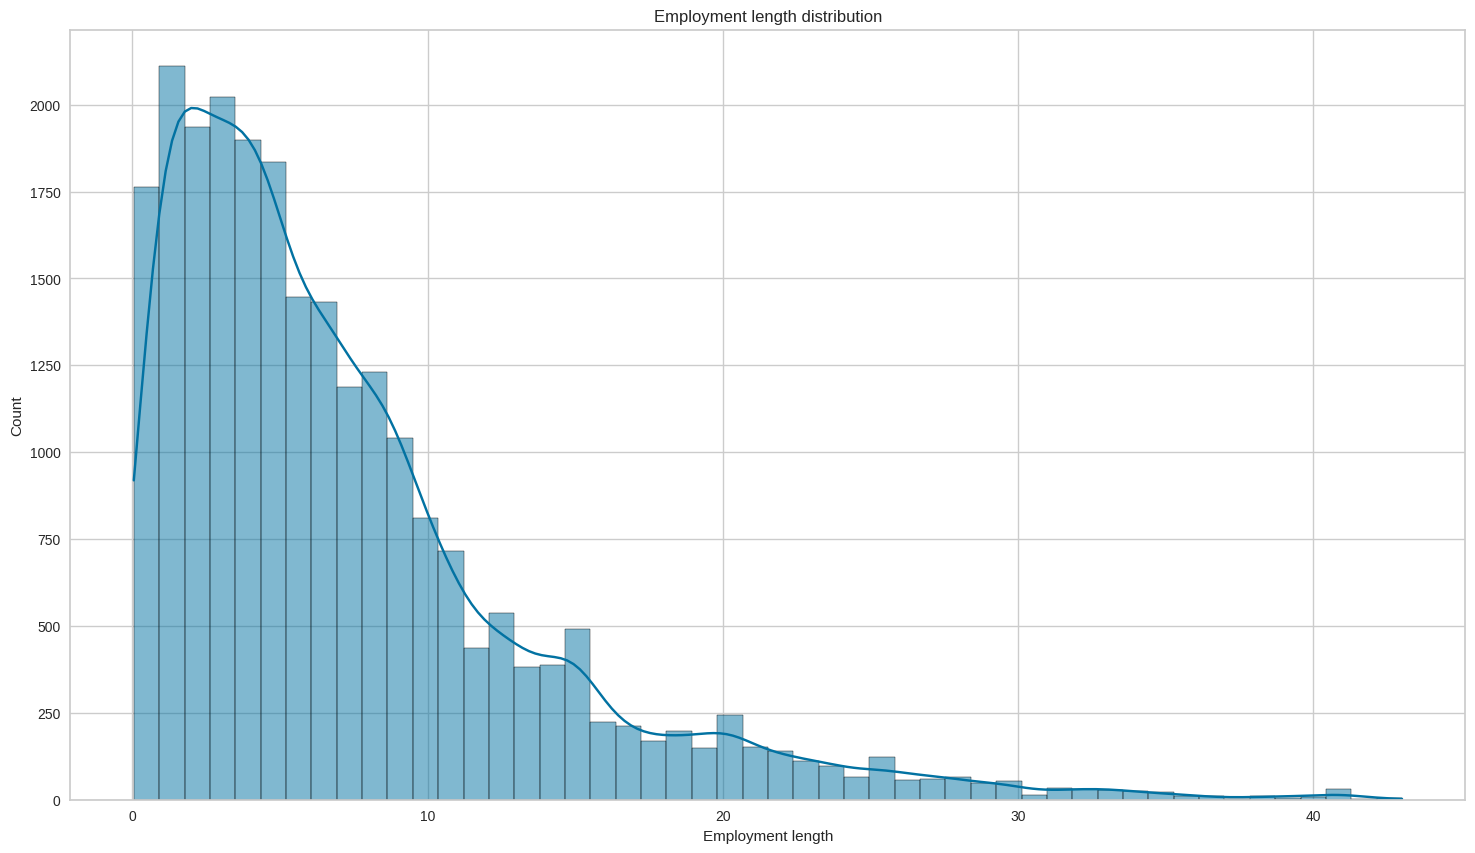

In [ ]:
create_hist_plot(cc_train_copy,'Employment length')

bivariate analysis with target variable

Is high risk
0   7.29
1   6.18
Name: Employment length, dtype: float64


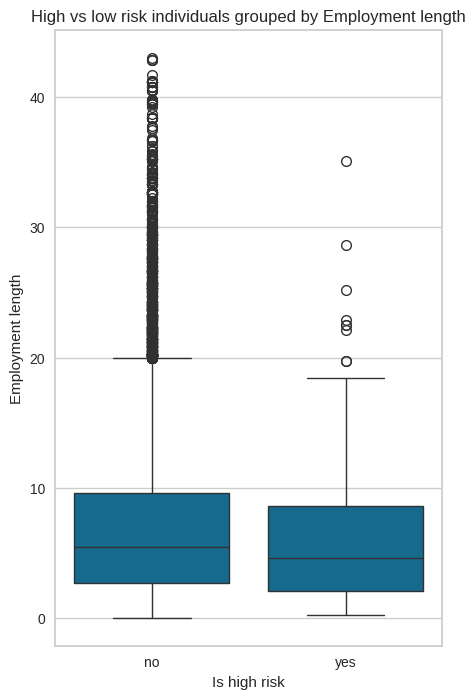

In [ ]:
# distribution of employment length for high vs low risk applicants
# Here 0 means No and 1 means Yes
low_high_risk_box_plot(cc_train_copy,'Employment length')

Interpretation:

Most of applicant have been working for 5 to 7 years on average
We have quite a number of outliers who have been working for more than 20 years+
The employment length is positively skewed
Those who are high risk have a low employment length of 5 versus 7 years for the low risk


2.3.12 Has a car

In [ ]:
gen_info_feat(cc_train_copy,'Has a car')

Description:
count     28884
unique        2
top           N
freq      17881
Name: Has a car, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
           Count  Frequency (%)
Has a car                      
N          17881          61.91
Y          11003          38.09


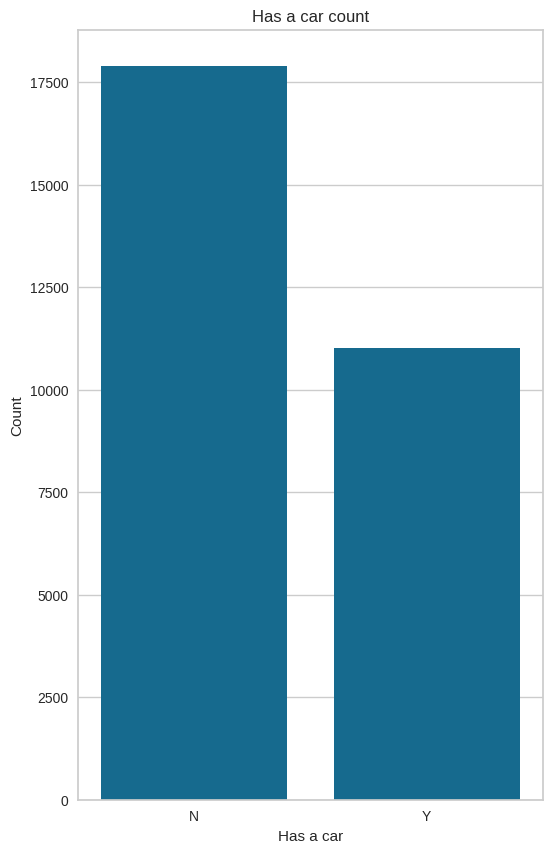

In [ ]:

create_bar_plot(cc_train_copy,'Has a car')

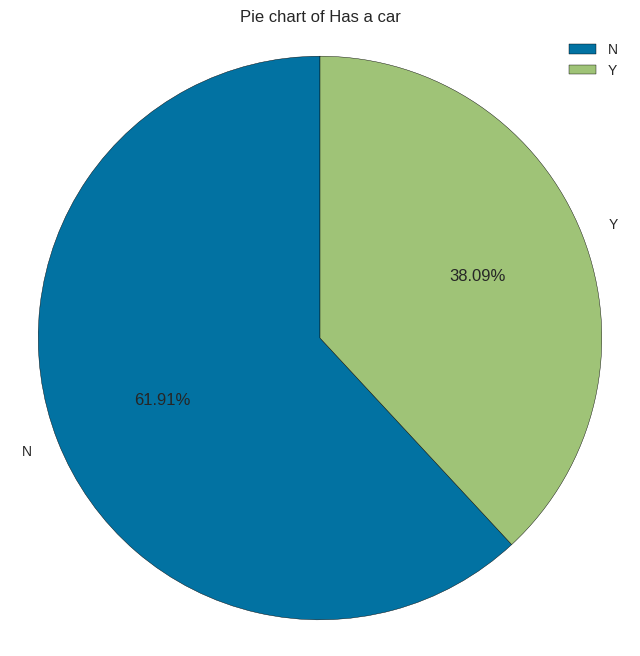

In [ ]:
create_pie_plot(cc_train_copy,'Has a car')

Interpretation:

Most applicant don’t own a car

# 2.3.13 Has a property

In [ ]:

gen_info_feat(cc_train_copy,'Has a property')

Description:
count     28884
unique        2
top           Y
freq      19471
Name: Has a property, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                Count  Frequency (%)
Has a property                      
Y               19471          67.41
N                9413          32.59


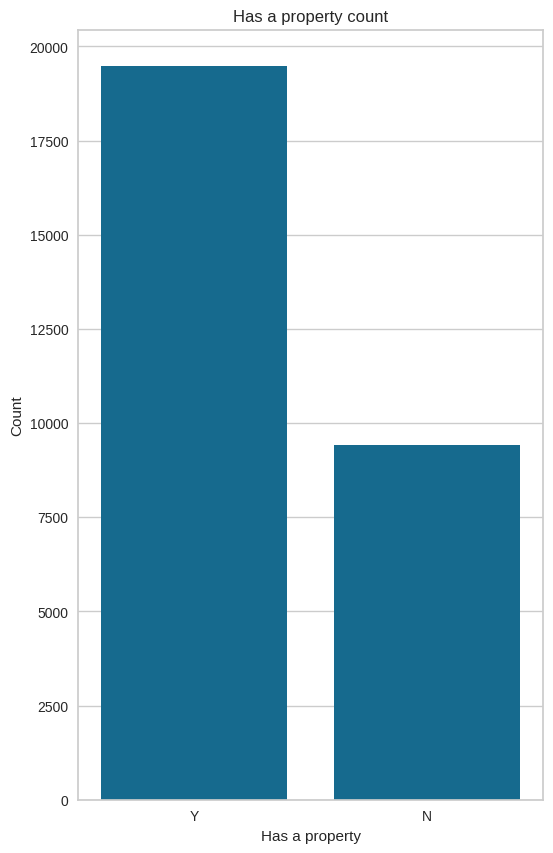

In [ ]:
create_bar_plot(cc_train_copy,'Has a property')

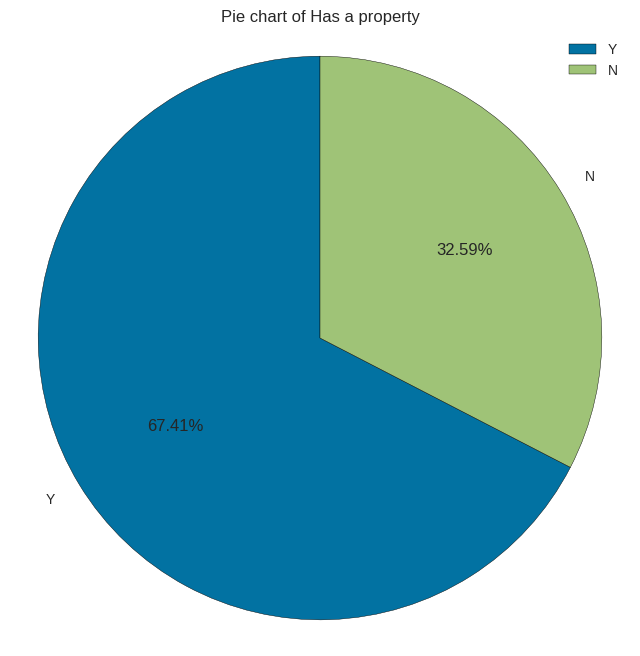

In [ ]:
create_pie_plot(cc_train_copy,'Has a property')

Interpretation:

Most applicants own a property

# 2.3.14 Has a work phone

In [ ]:

gen_info_feat(cc_train_copy,'Has a work phone')

Description:
count   28884.00
mean        0.22
std         0.42
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Has a work phone, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
                  Count  Frequency (%)
Has a work phone                      
0.00              22399          77.55
1.00               6485          22.45


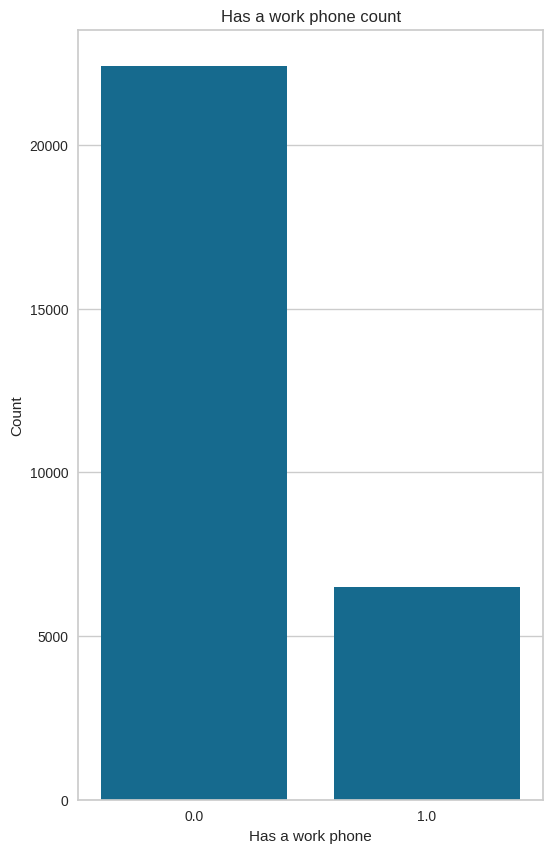

In [ ]:
create_bar_plot(cc_train_copy,'Has a work phone')

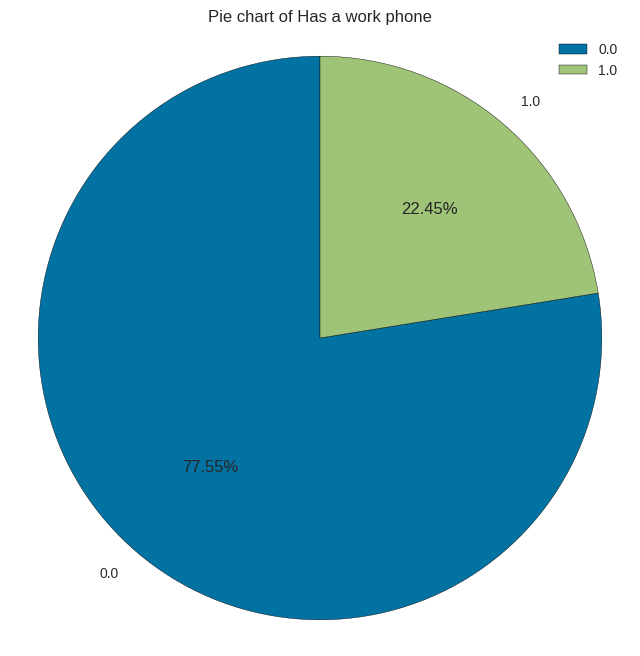

In [ ]:
create_pie_plot(cc_train_copy,'Has a work phone')

Interpretation:

More than ¾ of applicants don’t have a work phone
Note: Here 0 is no and 1 is yes

# 2.3.15 Has a mobile phone

In [ ]:
gen_info_feat(cc_train_copy,'Has a mobile phone')

Description:
count   28884.00
mean        1.00
std         0.00
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: Has a mobile phone, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
                    Count  Frequency (%)
Has a mobile phone                      
1.00                28884         100.00


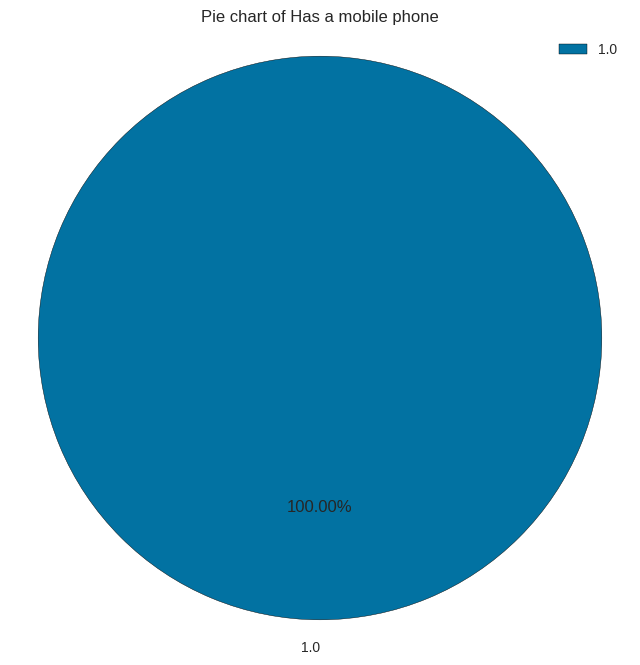

In [ ]:
create_pie_plot(cc_train_copy,'Has a mobile phone')

Interpretation:

All the applicants without exception have a mobile phone
Note: Here 0 is no and 1 is yes


2.3.16 Has a phone

In [ ]:

gen_info_feat(cc_train_copy,'Has a phone')

Description:
count   28884.00
mean        0.30
std         0.46
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: Has a phone, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
             Count  Frequency (%)
Has a phone                      
0.00         20363          70.50
1.00          8521          29.50


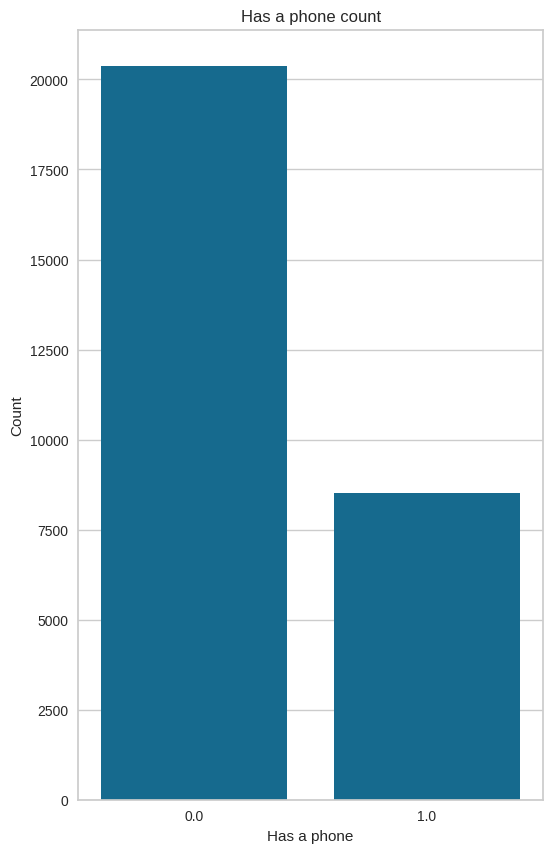

In [ ]:
create_bar_plot(cc_train_copy,'Has a phone')

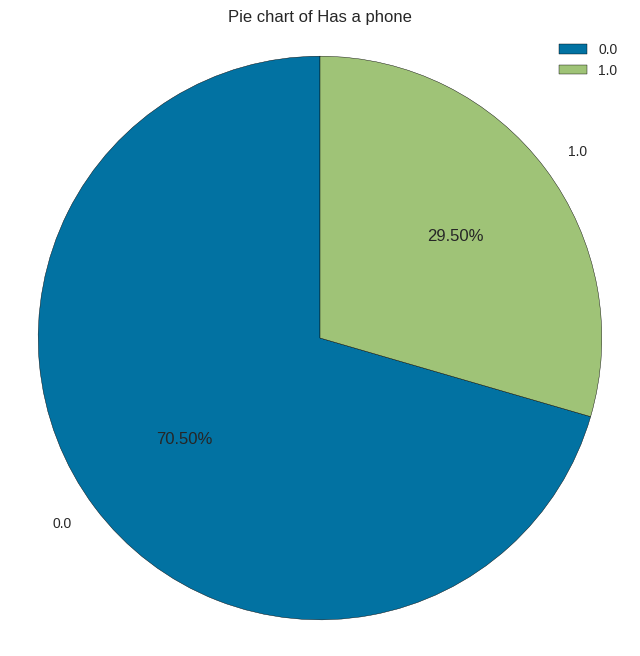

In [ ]:

create_pie_plot(cc_train_copy,'Has a phone')

Interpretation:

Most applicants don’t have a phone (probably a home phone)
Note: Here 0 is no and 1 is yes

# 2.3.17 Has an email

In [ ]:

gen_info_feat(cc_train_copy,'Has an email')

Description:
count   28884.00
mean        0.09
std         0.29
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Has an email, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
              Count  Frequency (%)
Has an email                      
0.00          26263          90.93
1.00           2621           9.07


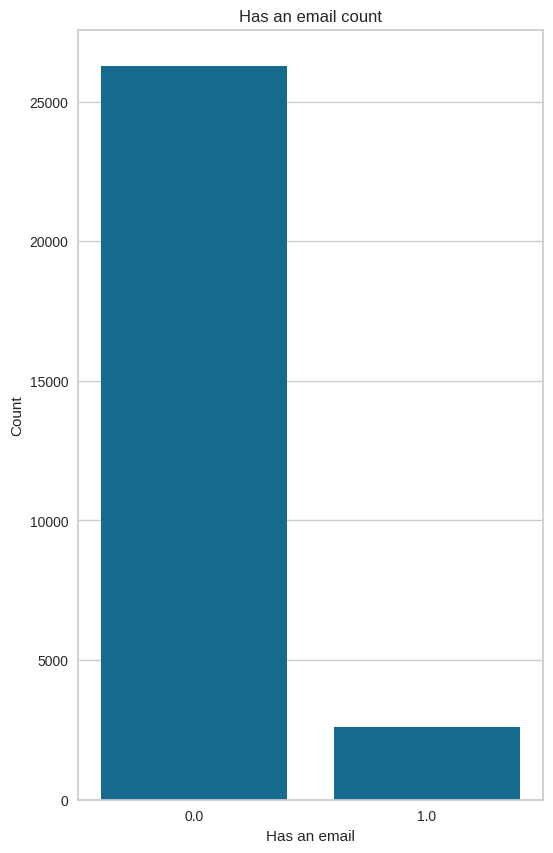

In [ ]:
create_bar_plot(cc_train_copy,'Has an email')

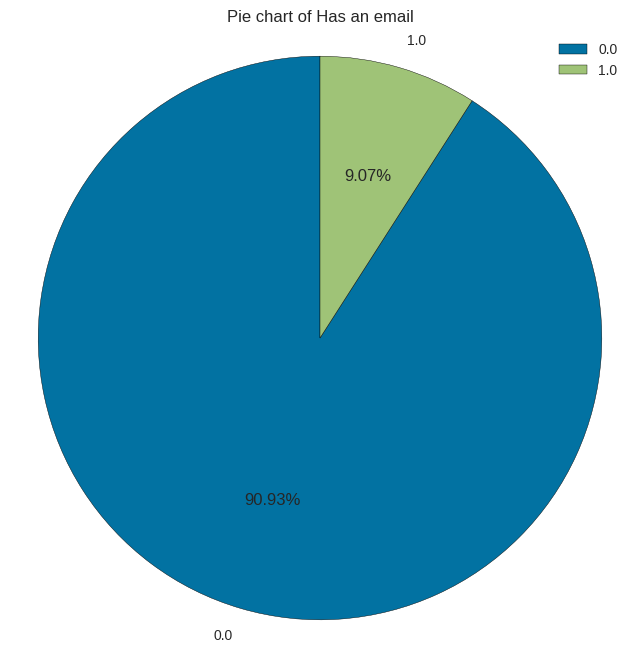

In [ ]:
create_pie_plot(cc_train_copy,'Has an email')

Interpretation:

More than 90% of applicants don’t have an email
Note: Here 0 is no and 1 is yes

# 2.3.18 Account age

In [ ]:
gen_info_feat(cc_train_copy,'Account age')

Description:
count   28884.00
mean       26.22
std        16.56
min         0.00
25%        12.00
50%        24.00
75%        39.00
max        60.00
Name: Account age, dtype: float64
**************************************************
Object type:float64


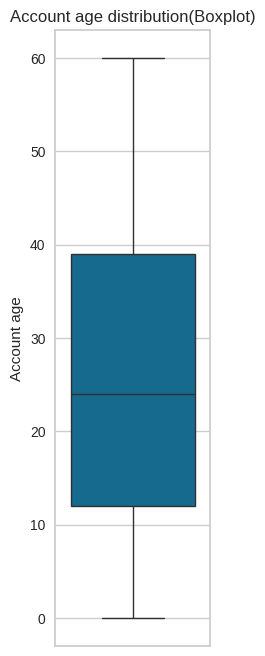

In [ ]:
create_box_plot(cc_train_copy,'Account age')

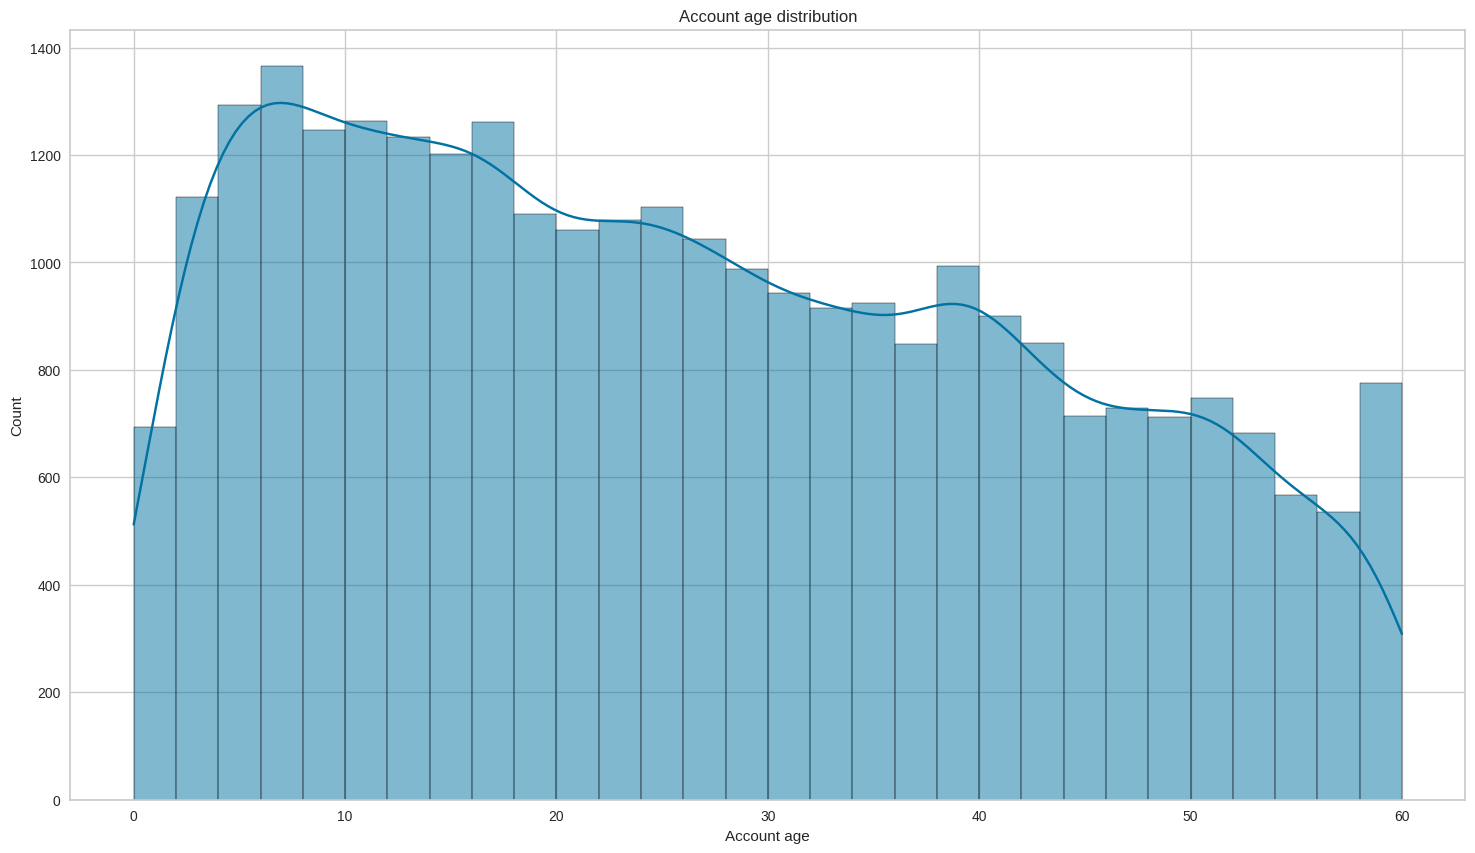

In [ ]:

create_hist_plot(cc_train_copy,'Account age', the_bins=30)

# bivariate analysis with target variable

Is high risk
0   26.08
1   45.00
Name: Account age, dtype: float64


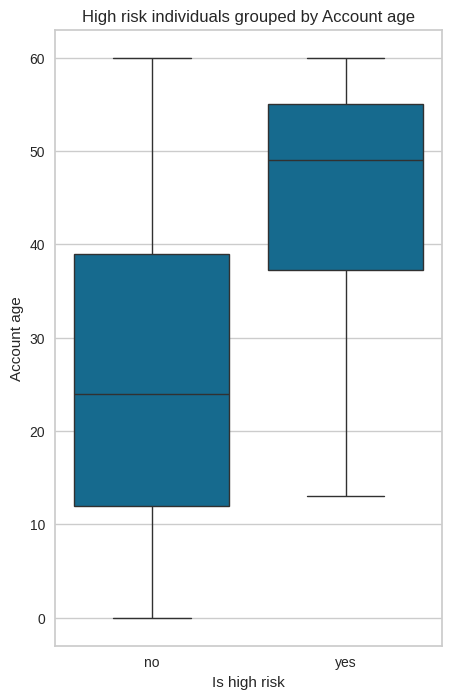

In [ ]:

low_high_risk_box_plot(cc_train_copy,'Account age')

Interpretation:

Most accounts are 26 months old
Account age is not normally distributed, it is positively skewed
The accounts that have been flagged as high risk are on average 34 months old vs 26 months old for old account

# 2.3.19 Is high risk (target variable)

In [ ]:

gen_info_feat(cc_train_copy,'Is high risk')

Description:
count     29165
unique        2
top           0
freq      28666
Name: Is high risk, dtype: int64
**************************************************
Object type:
object
**************************************************
Value count:
              Count  Frequency (%)
Is high risk                      
0             28666          98.29
1               499           1.71


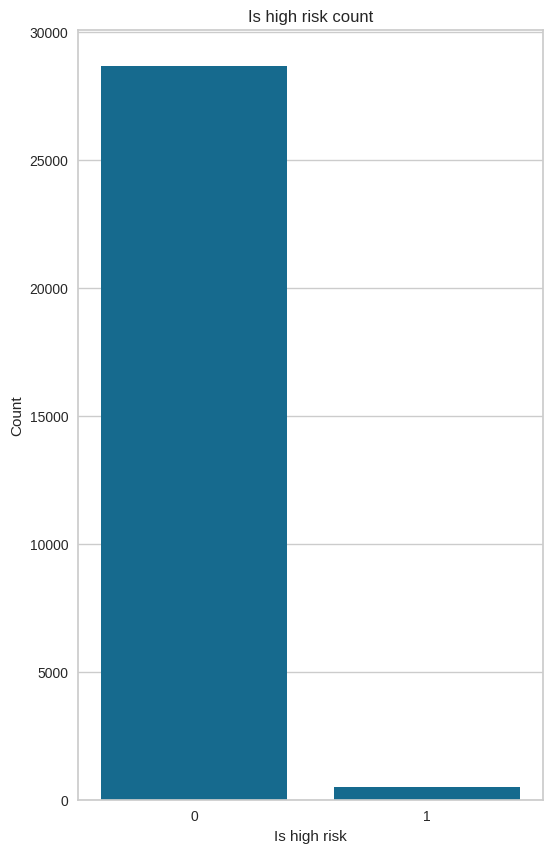

In [ ]:
create_bar_plot(cc_train_copy,'Is high risk')

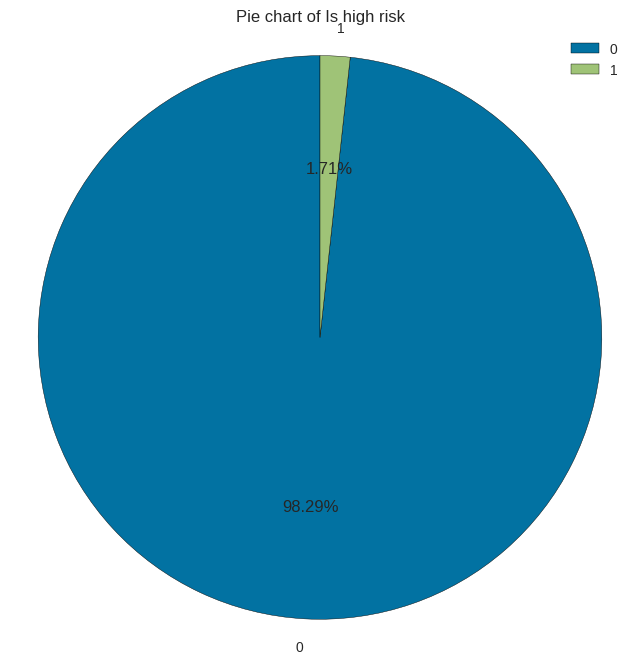

In [ ]:
create_pie_plot(cc_train_copy,'Is high risk')

Interpretation:

A vast majority of applicants are low risk applicants.
We have a very imbalance data.
Note: Here 0 is no and 1 is yes

2.4 Bivariate analysis
2.4.1 Numerical vs numerical features (Correlation & scatter plots)
2.4.1.1 Scatter plots

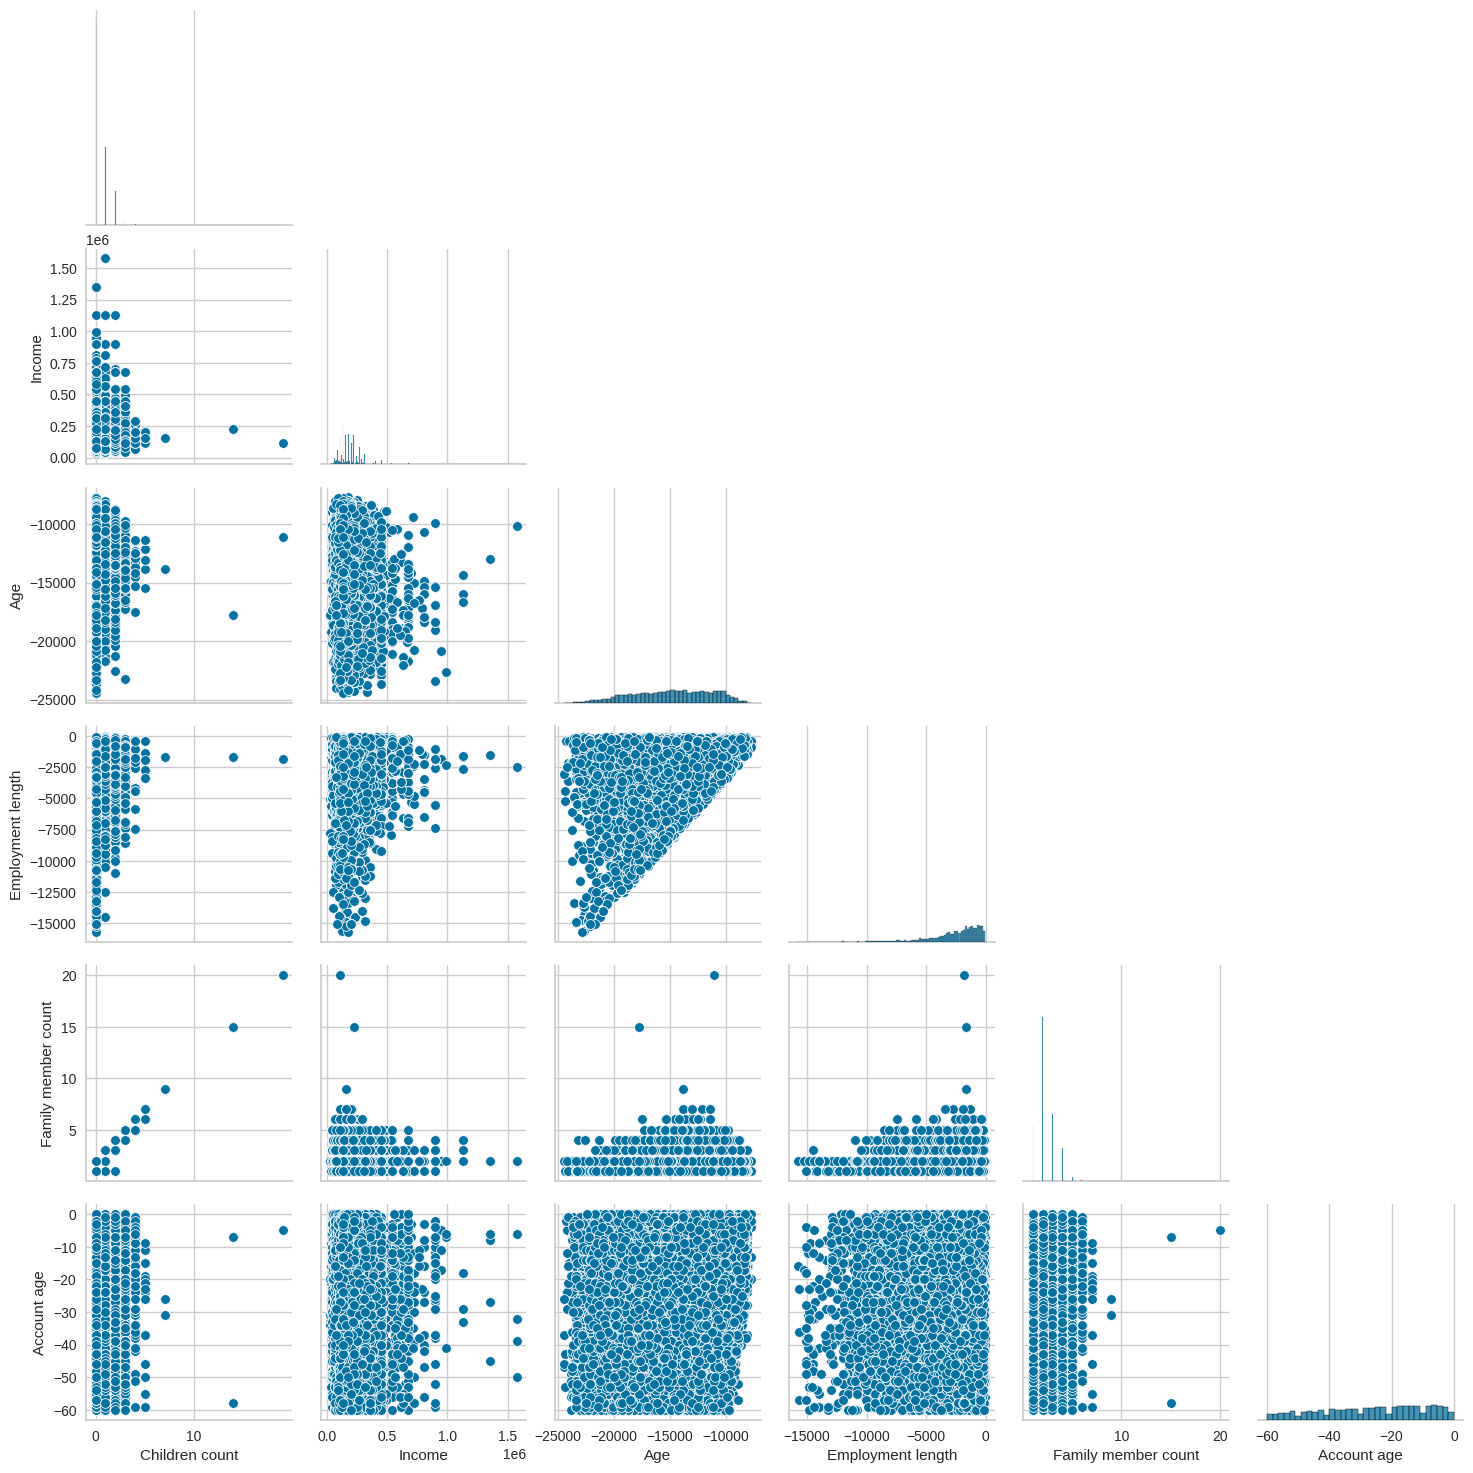

In [ ]:
sns.pairplot(cc_train_copy[cc_train_copy['Employment length'] < 0].drop(['ID','Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email','Is high risk'],axis=1),corner=True)
plt.show()

Interpretation:

We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are.

# 2.4.1.1.1 Family member count vs children count (numerical vs numerical feature comparison)

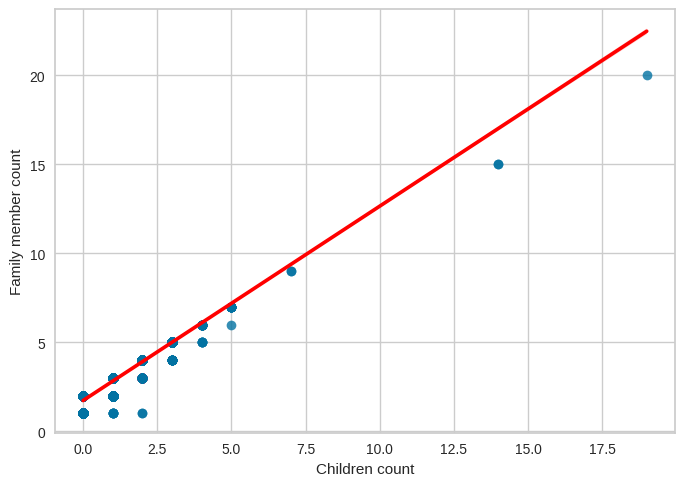

In [ ]:
sns.regplot(x='Children count',y='Family member count',data=cc_train_copy,line_kws={'color': 'red'})
plt.show()


Interpretation:

The more children a person has, the larger the family member count.

# 2.4.1.1.2 Account age vs age (numerical vs numerical feature comparison)

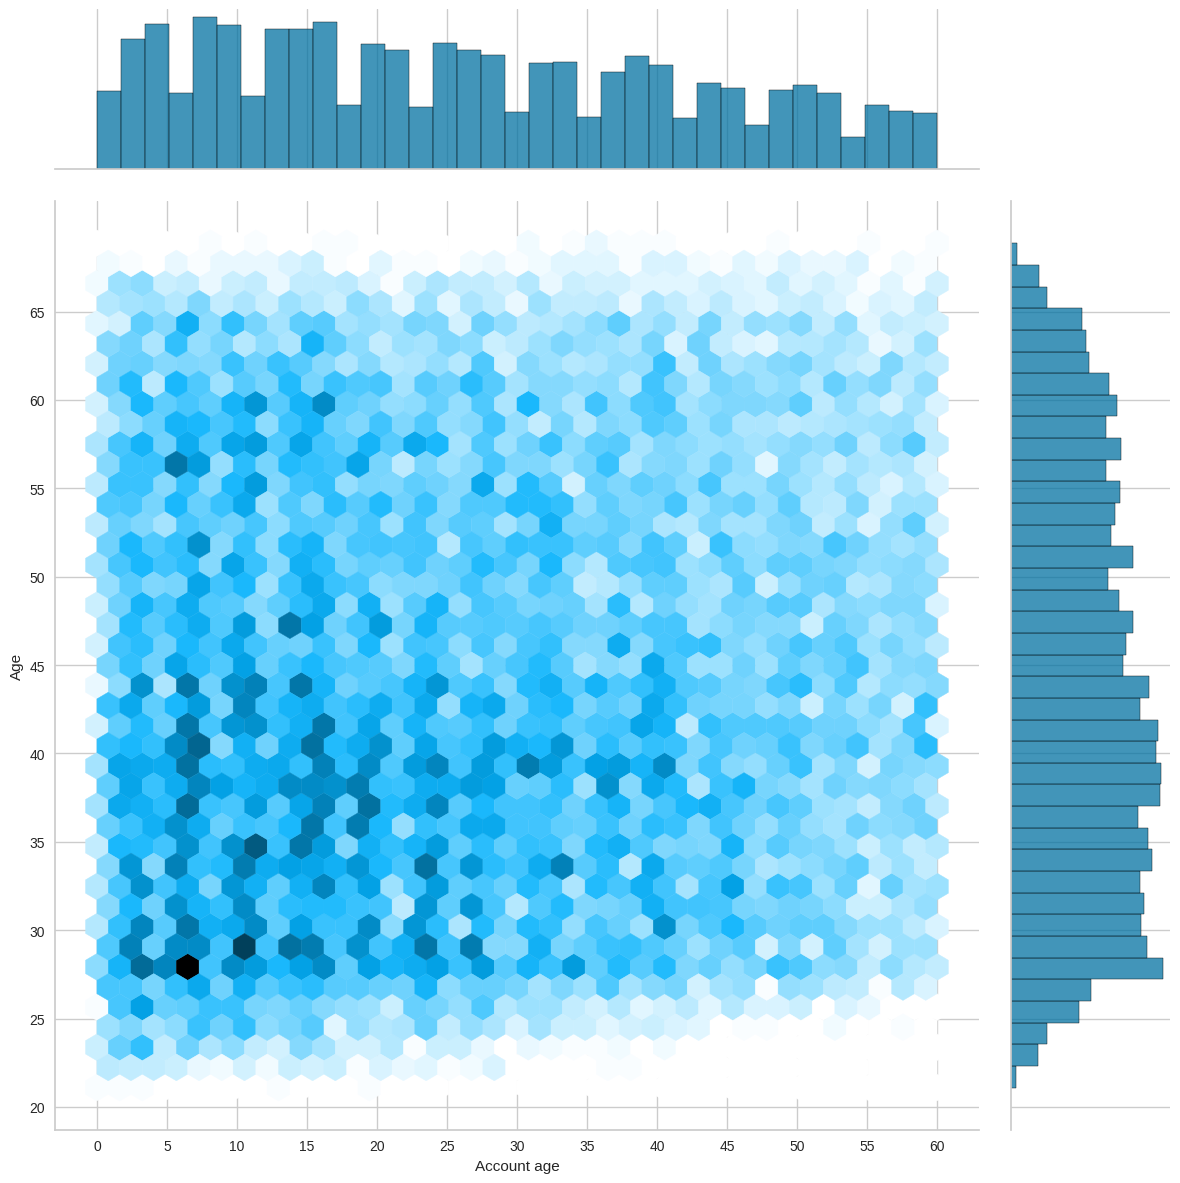

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_age = np.abs(cc_train_copy['Age']) / 365.25

# Use 'x' and 'y' keyword arguments for the data
sns.jointplot(x=np.abs(cc_train_copy['Account age']), y=y_age, kind="hex", height=12)

# Optional: set tick marks for better visualization
plt.yticks(np.arange(20, y_age.max(), 5))
plt.xticks(np.arange(0, 65, 5))
plt.ylabel('Age')

# Show the plot
plt.show()



Interpretation:

Most of the applicants are between 20 and 45 years old and have an account that is less than 25 months old.

# 2.4.1.1.3 Employment length vs age (numerical vs numerical feature comparison)

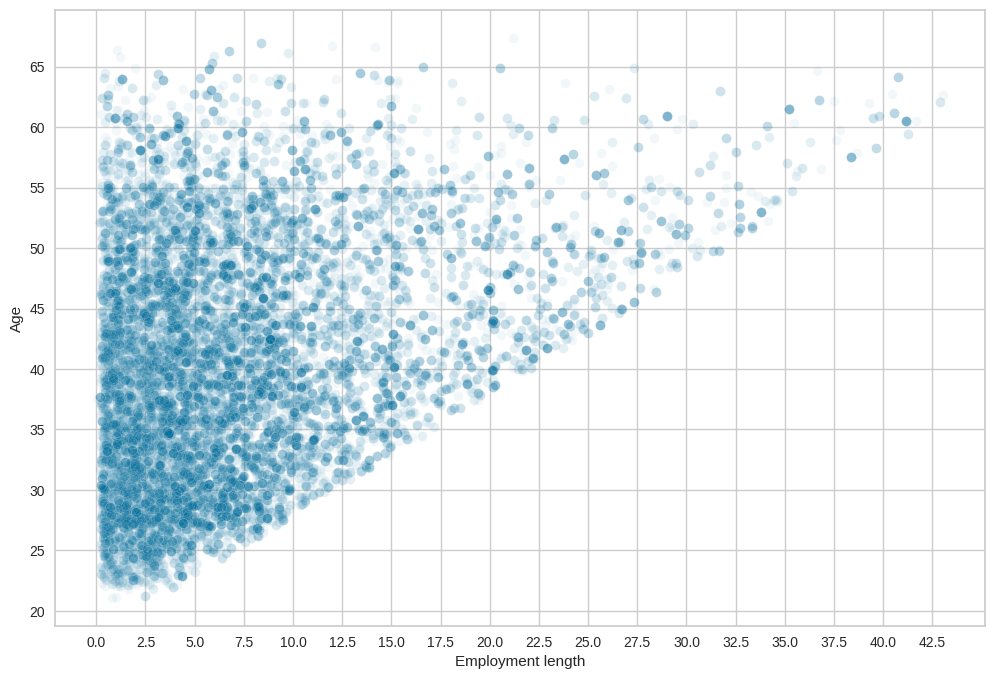

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate x_employ_length and y_age
x_employ_length = np.abs(cc_train_copy[cc_train_copy['Employment length'] < 0]['Employment length']) / 365.25
y_age = np.abs(cc_train_copy['Age']) / 365.25

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=x_employ_length, y=y_age, alpha=0.05)

# Optional: adjust the frequency of the x-axis and y-axis labels
plt.xticks(np.arange(0, x_employ_length.max(), 2.5))
plt.yticks(np.arange(20, y_age.max(), 5))

# Show the plot
plt.show()


Interpretation:

This scatterplot shows that the age of the applicants is correlated with the length of the employment. The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the length of the employment. You can't have an employment length > than the age.

# 2.4.1.2 Correlation analysis

In [ ]:
# change the datatype of target feature to int
is_high_risk_int = cc_train_copy['Is high risk'].astype('int32')

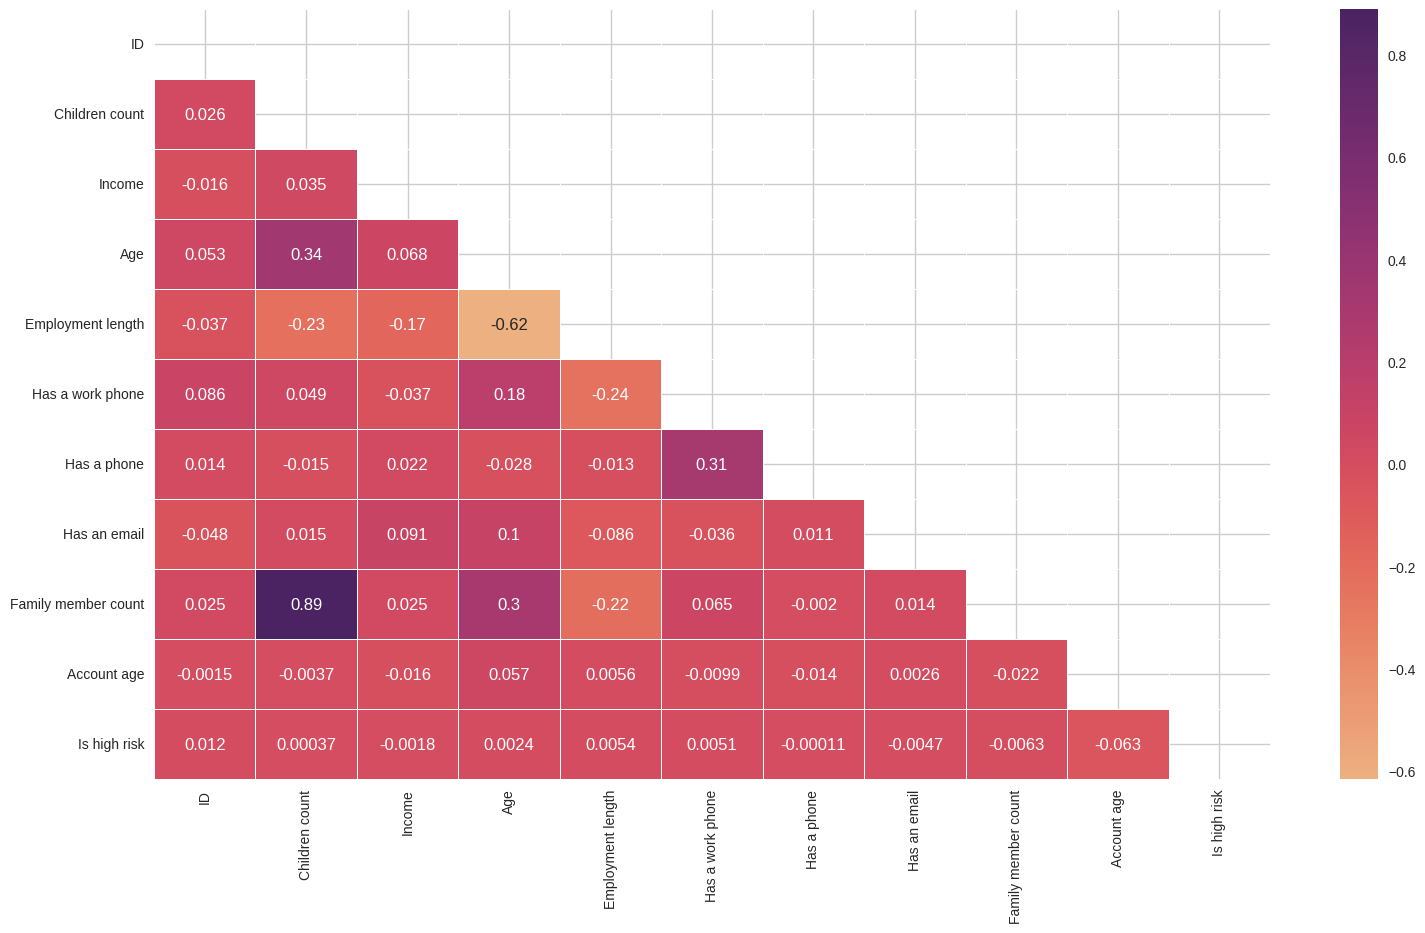

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'is_high_risk_int' is a series and has the same index as the other columns
cc_train_copy_corr_no_mobile = pd.concat([cc_train_copy.drop(['Has a mobile phone', 'Is high risk'], axis=1), is_high_risk_int], axis=1)

# Check that all columns are numeric
cc_train_copy_corr_no_mobile = cc_train_copy_corr_no_mobile.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = cc_train_copy_corr_no_mobile.corr()

# Get the lower triangle of the correlation matrix
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 10))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='flare', mask=mask, linewidths=.5)

# Show the plot
plt.show()



Interpretation:

There is no feature that is correlated with the target feature
Family member count is highly correlated with children count as previously discussed
Age has some positive correlation with the family member count and children count. The older a person is, the most likely he/she will have a larger family.
Another positive correlation is having a phone and having a work phone.
The final positive correlation is between the age and work phone. The younger someone is the less likely he/she will have a work phone.
We also have a negative correlation between the employment length and the age as previously seen.

# 2.4.2 Numerical vs categorical features (ANOVA)

2.4.2.1 Age vs the rest of categorical features

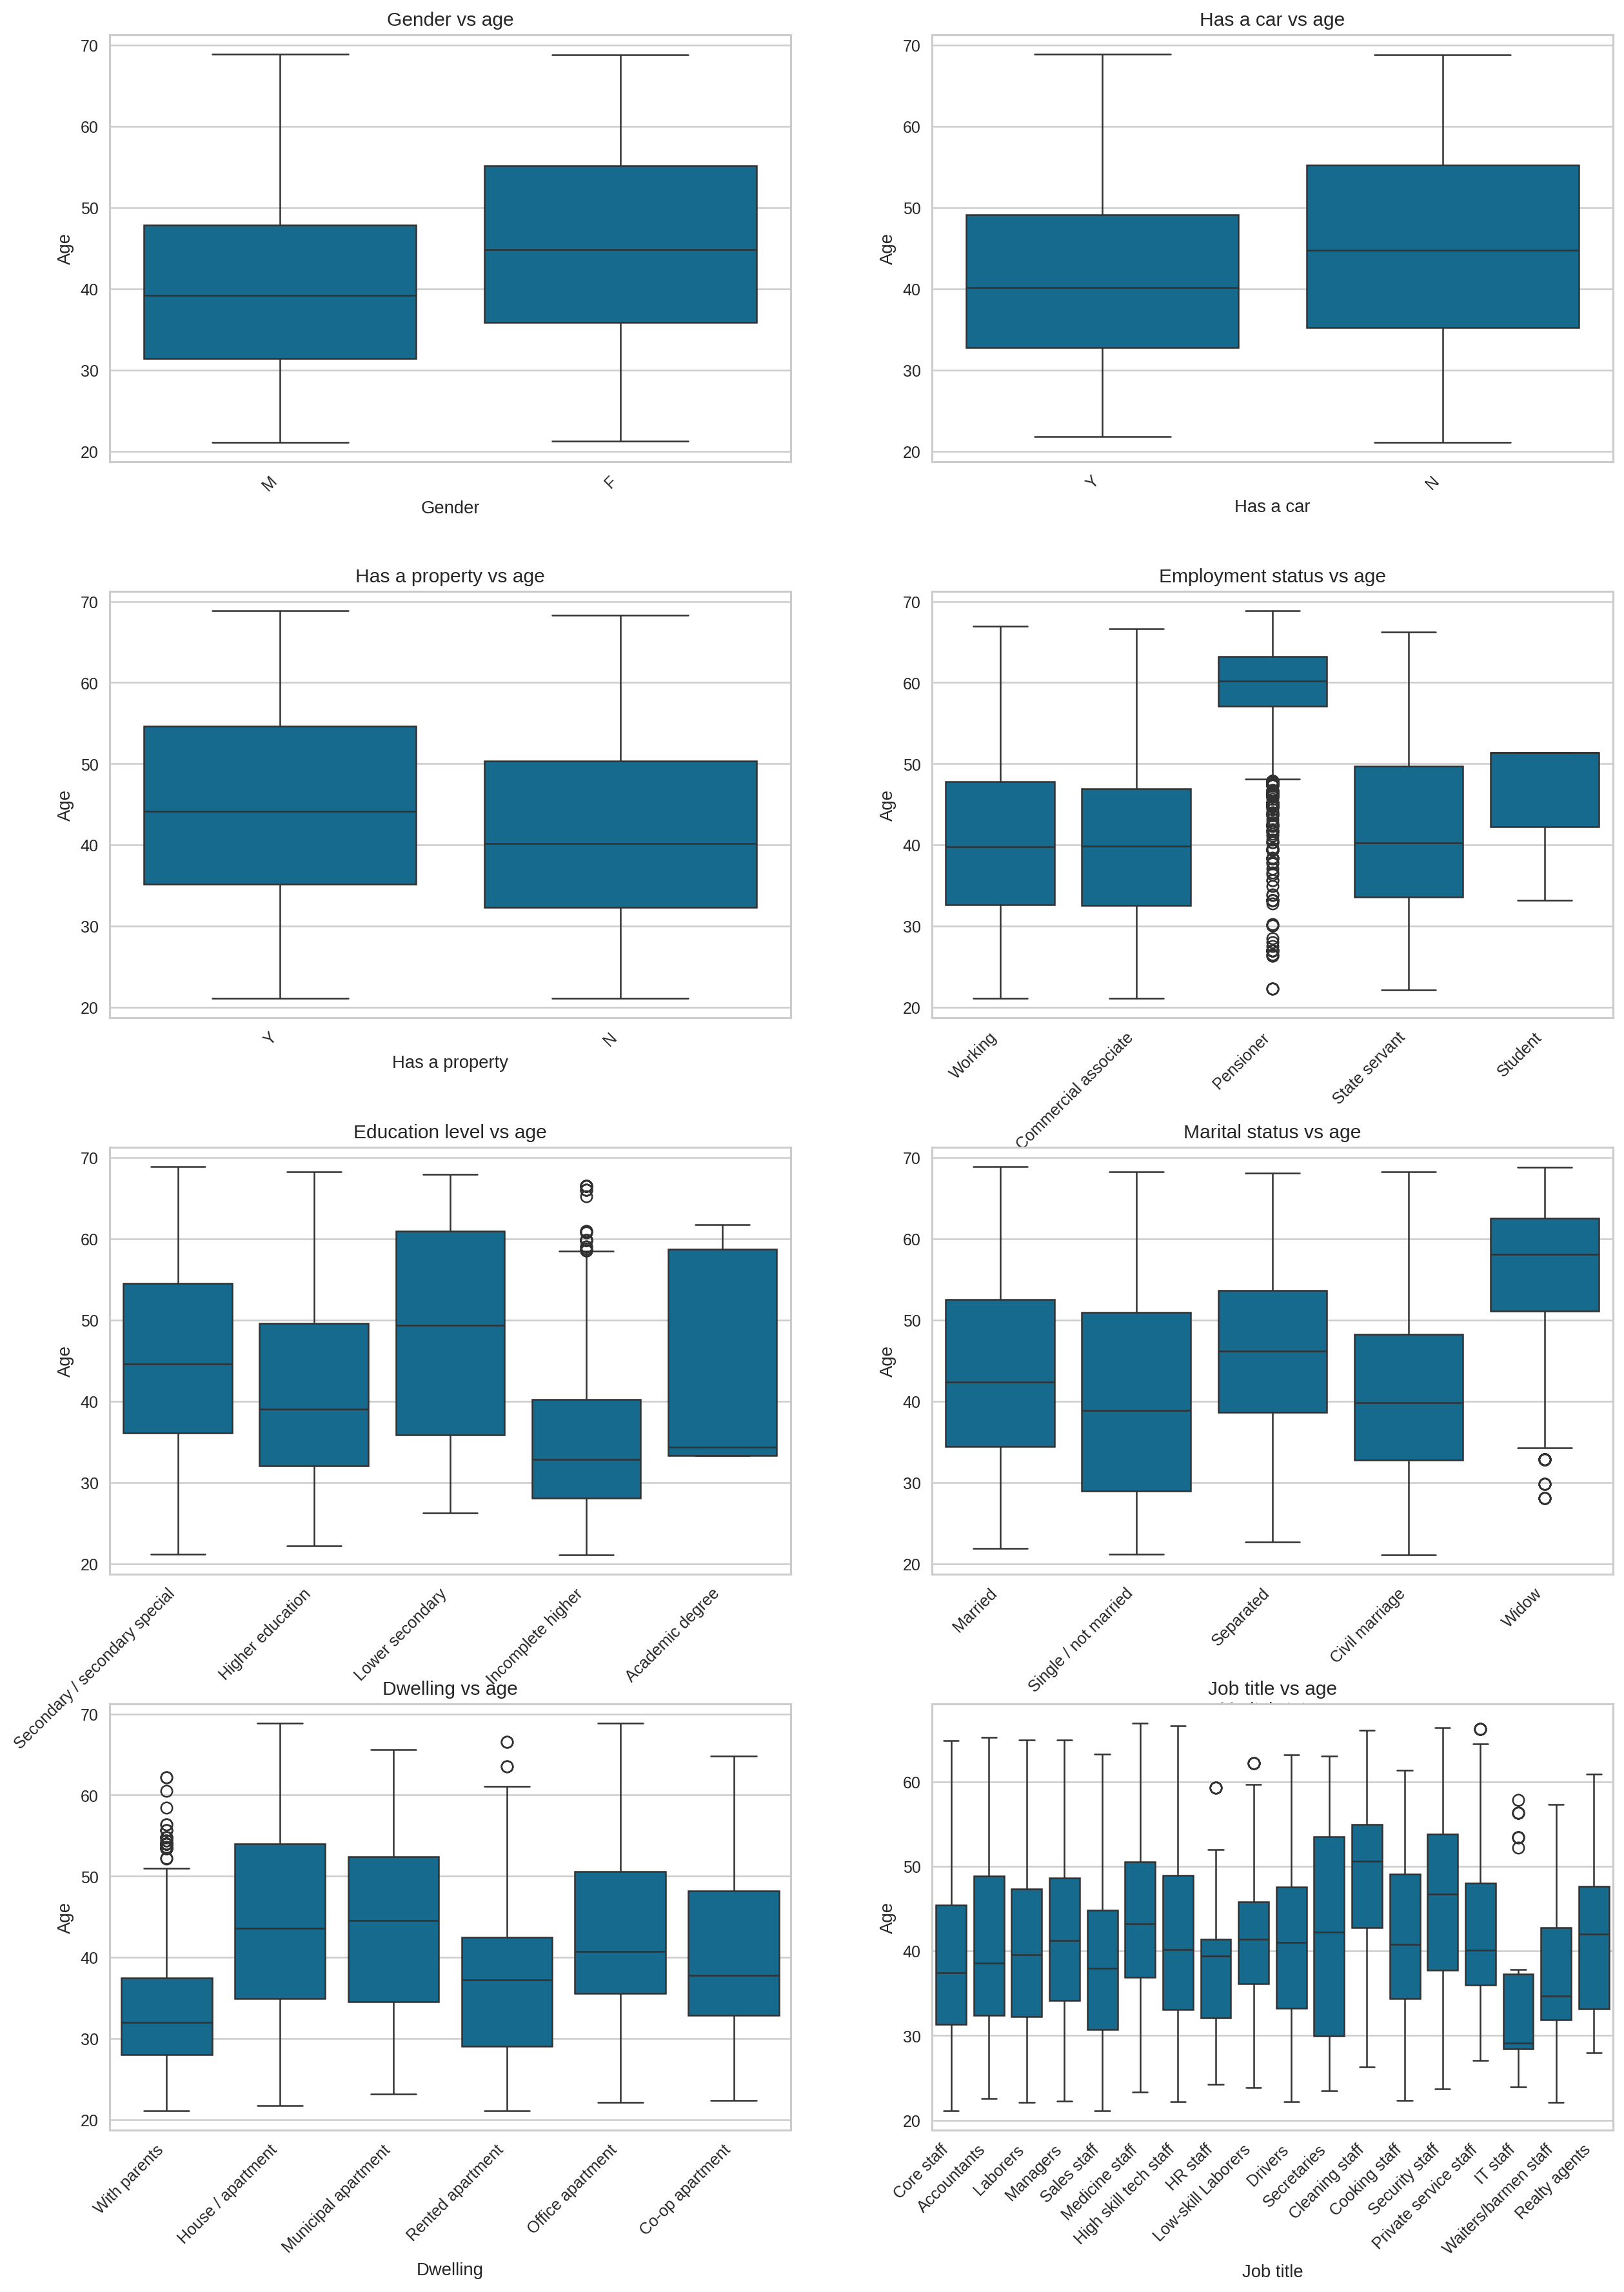

In [ ]:

fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=cc_train_copy[cat_features[cat_ft_count]],y=np.abs(cc_train_copy['Age'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

Interpretation:

Female applicants are older than their male counterpart.
Those who don't own a car tend to be older.
Those who own a property tend to be older than those who don't.
Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).
It is also interesting to see that those who hold an academic degree are younger in general than the other groups.
Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.
With no surprise, those who live with parent tend to be younger. We also see some outlier as well.
Lastly, who work as cleaning staff tend to be older while those who work in IT tend to be younger.

# 2.4.2.2 Income vs the rest of categorical features

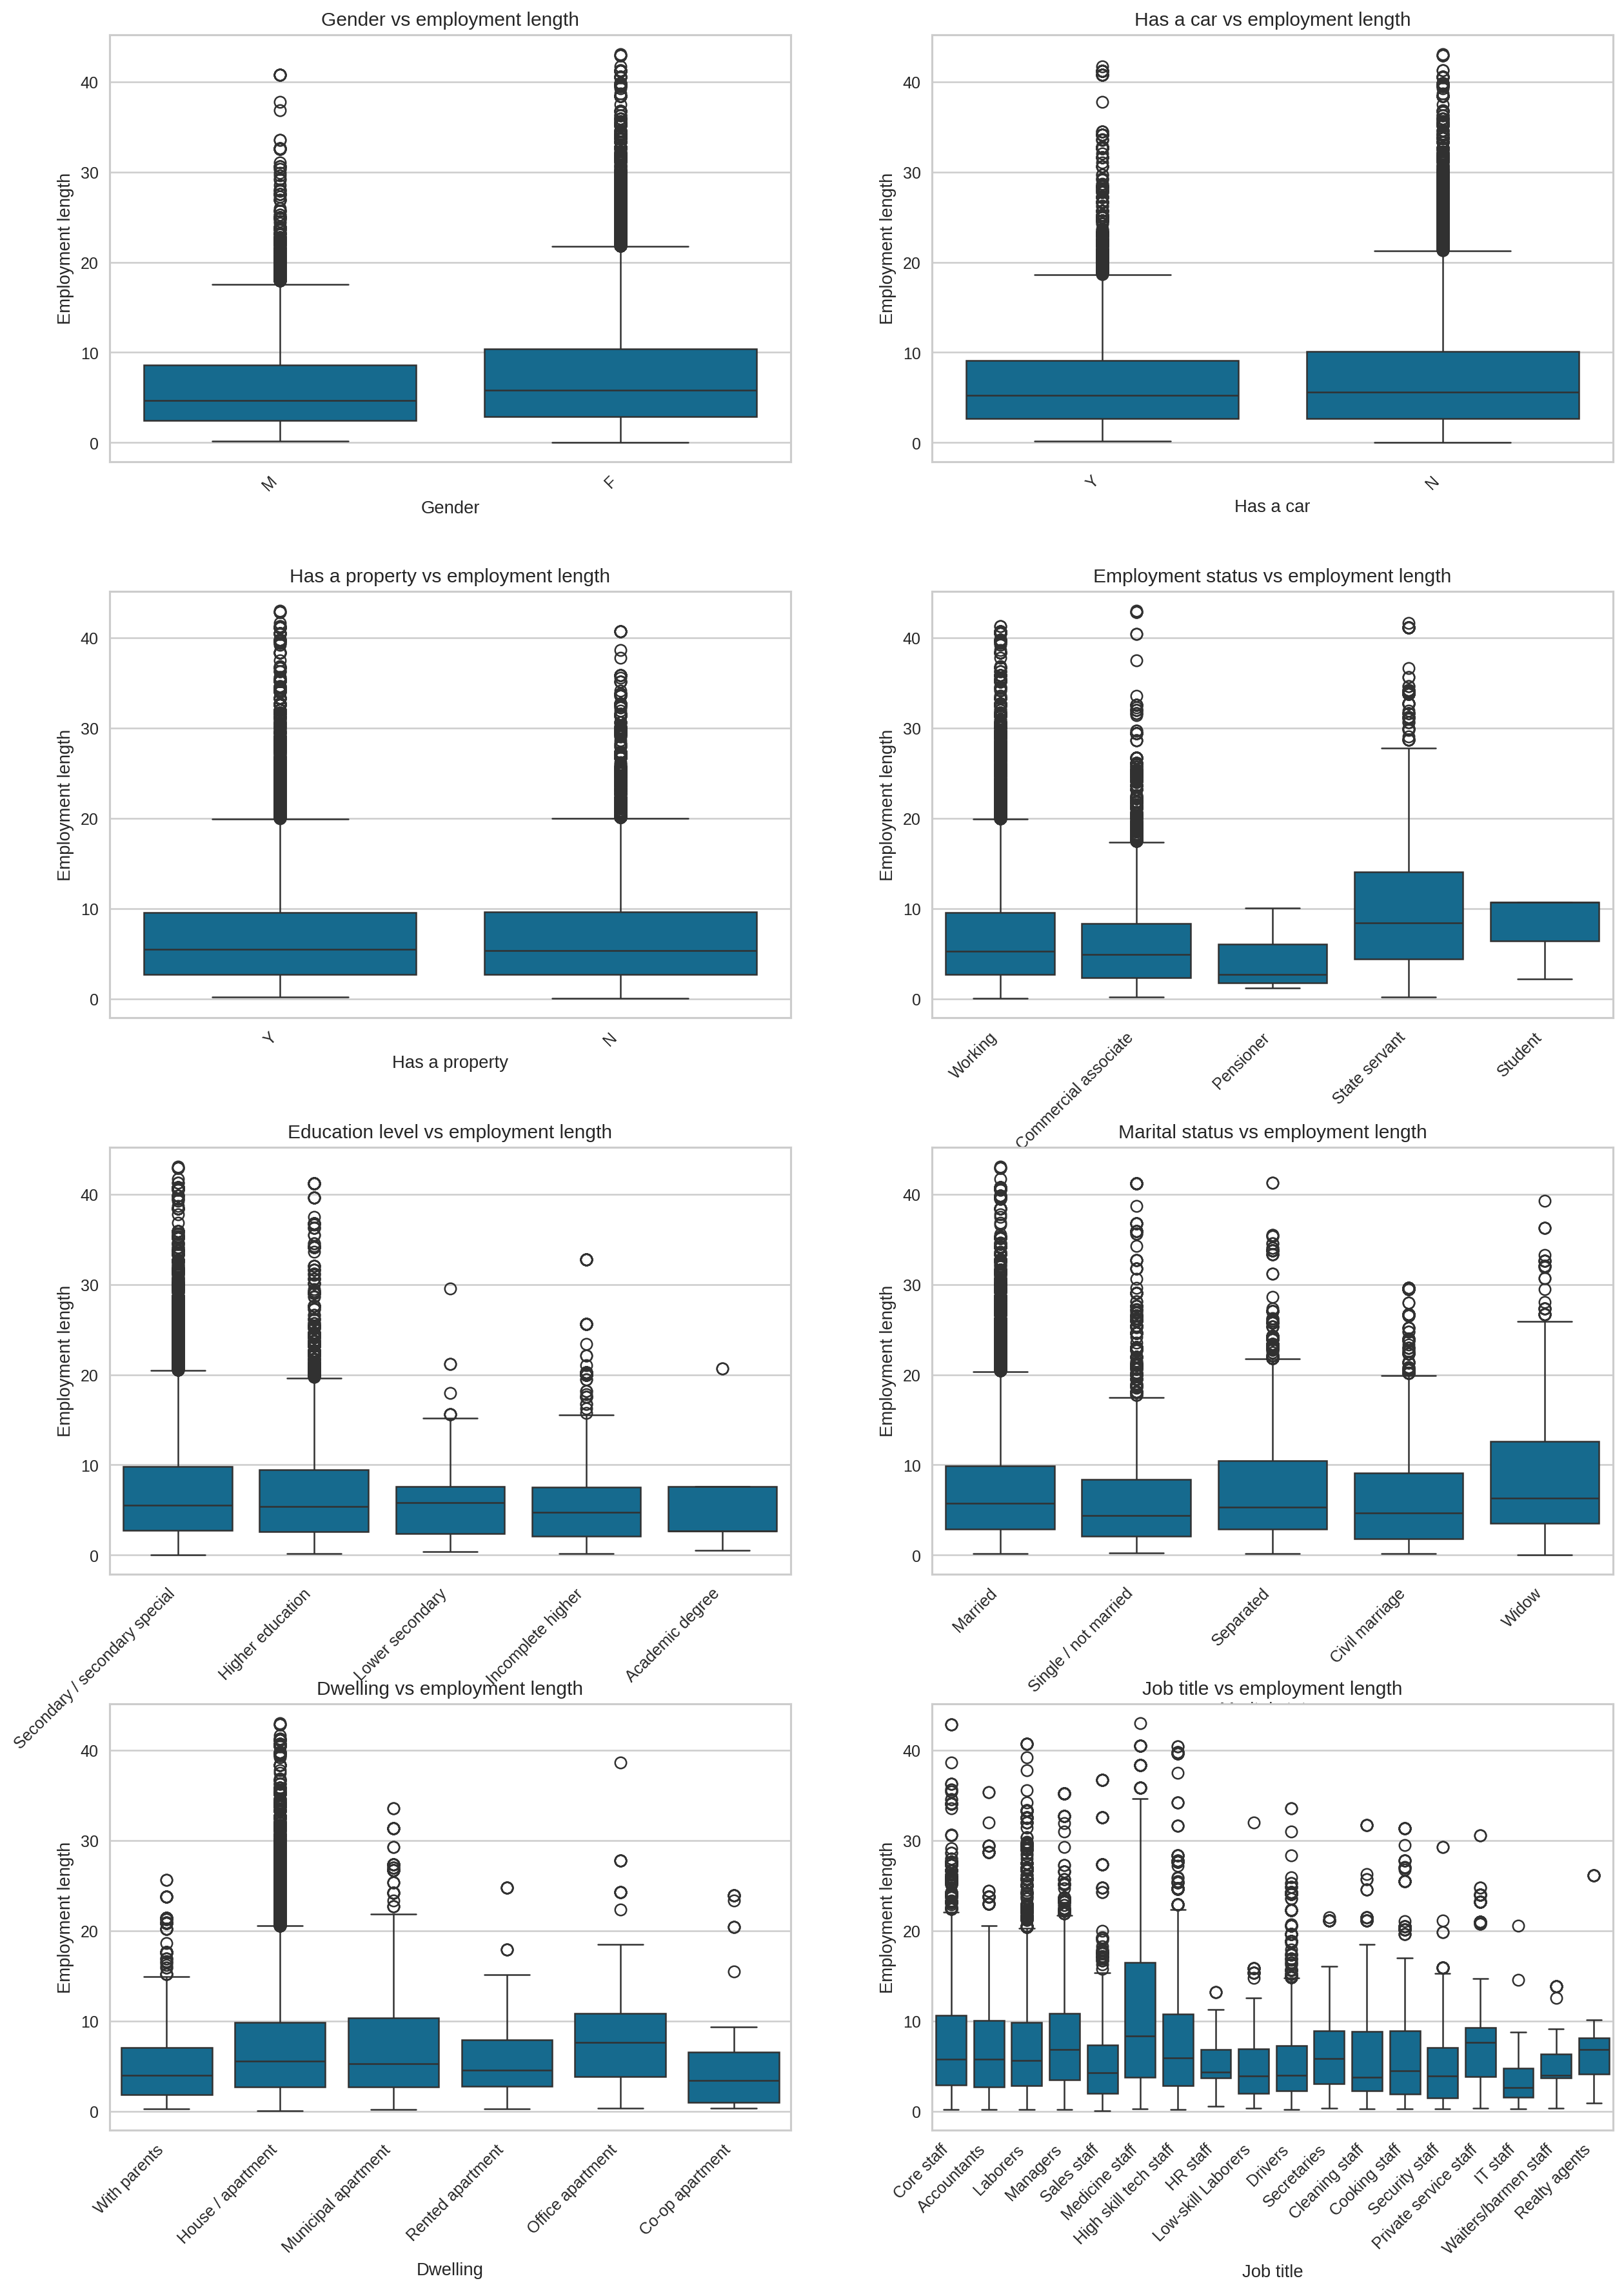

In [ ]:

fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=cc_train_copy[cat_features[cat_ft_count]],y=np.abs(cc_train_copy[cc_train_copy['Employment length'] < 0]['Employment length'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs employment length")
            plt.sca(axes[row_count,feat_count])
            plt.ylabel('Employment length')
            plt.xticks(rotation=45,ha='right')
            cat_ft_count += 1
    break

Interpretation:

State employed applicant tend to have been employed longer than the rest.
Those who work in the medical field, have been employed longer than the rest.

# 2.4.3 Categorical vs categorical features (Chi-square test)

Null hypothesis: the feature's categories have no effect on the target variable. Alternate hypothesis: one(or more) of the feature categories has a significant effect on the target variable.

In [ ]:
def chi_func(feature):
    # selection row with high risk
    high_risk_ft = cc_train_copy[cc_train_copy['Is high risk'] == 1][feature]
    high_risk_ft_ct = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    high_risk_ft_ct.index.name = None
    # observe values
    obs = high_risk_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

In [ ]:

cat_ft = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** Gender ****

Observed values:

   Count
F    306
M    193


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F 249.50
M 249.50


Chi-square:

25.589178356713425


Critical value:

3.841458820694124


P-value:

[4.22401699e-07]


Reject the null hypothesis


**** Has a car ****

Observed values:

   Count
N    317
Y    182


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N 249.50
Y 249.50


Chi-square:

36.523046092184366


Critical value:

3.841458820694124


P-value:

[1.50871859e-09]


Reject the null hypothesis


**** Has a property ****

Observed values:

   Count
N    210
Y    289


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N 249.50
Y 249.50


Chi-square:

12.507014028056112


Critical value:

3.841458820694124


P-value:

[0.00040543]


Reject the null hypothesis


**** Employment status ****

Observed values:

                      Count
Commercial associate    114
Pensioner               103
State servant            28
Working

<ipython-input-125-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-125-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-125-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-125-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is 



**** Gender ****

Observed values:

   Count
F  19549
M   9616


Index(['F', 'M'], dtype='object')
Expected values:

     Count
F 14582.50
M 14582.50


Chi-square:

3382.9757929024518


Critical value:

3.841458820694124


P-value:

[0.]


Reject the null hypothesis


**** Has a car ****

<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
Observed values:

   Count
N  18128
Y  11037


Index(['N', 'Y'], dtype='object')
Expected values:

     Count
N 14582.50
Y 14582.50


Chi-square:

1724.0624378535917


Critical value:

3.841458820694124


P-value:

[0.]


Reject the null hypothesis


**** Has a property ****

Observed values:

   Count
N   9608
Y  19557


Index(['N', 'Y'], dtype='object')
Expected values:

     Count
N 14582.50
Y 14582.50


Chi-square:

3393.8831133207614


Critical value:

3.841458820694124


P-value:

[0.]


Reject the null hypothesis


**** Employment status ****

Observed values:

                      Count
Commercial associate   6801
Pensioner              4920
State servant          2381
Student                   7
Working               15056


Index(['Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working'],
      dtype='object')
Expected values:

                       Count
Commercial associate 5833.00
Pensioner            5833.00
State servant        5833.00
Student              5833.00
Working              5833.00


Chi-square:

22748.65455168867


Critical value:

9.487729036781154


P-value:

[0.]


Reject the null hypothesis


**** Education level ****

Observed values:

                               Count
Academic degree                   25
Higher education                7910
Incomplete higher               1129
Lower secondary                  298
Secondary / secondary special  19803


Index(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'],
      dtype='object')
Expected values:

                                Count
Academic degree               5833.00
Higher education              5833.00
Incomplete higher             5833.00
Lower secondary               5833.00
Secondary / secondary special 5833.00


<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
Chi-square:

49026.4930567461


Critical value:

9.487729036781154


P-value:

[0.]


Reject the null hypothesis


**** Marital status ****

Observed values:

                      Count
Civil marriage         2312
Married               20044
Separated              1712
Single / not married   3864
Widow                  1233


Index(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'],
      dtype='object')
Expected values:

                       Count
Civil marriage       5833.00
Married              5833.00
Separated            5833.00
Single / not married 5833.00
Widow                5833.00


Chi-square:

43951.579633121895


Critical value:

9.487729036781154


P-value:

[0.]


Reject the null hypothesis


**** Dwelling ****

Observed values:

                     Count
Co-op apartment        127
House / apartment    26059
Municipal apartment    912
Office apartment       208
Rented apartment       453
With parents          1406


Index(['Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents'],
      dtype='object')
Expected values:

                      Count
Co-op apartment     4860.83
House / apartment   4860.83
Municipal apartment 4860.83
Office apartment    4860.83
Rented apartment    4860.83
With parents        4860.83


Chi-square:

111169.9212412138


Critical value:

11.070497693516351


P-value:

[0.]


Reject the null hypothesis


**** Job title ****

Observed values:

                       Count
Accountants              998
Cleaning staff           425
Cooking staff            521
Core staff              2866
Drivers                 1722
HR staff                  72
High skill tech staff   1133
IT staff                  48
Laborers                5004
Low-skill Laborers       138
Managers                2422
Medicine staff           956
Private service staff    287
Realty agents             60
Sales staff             2773
Secretaries              122
Security staff           464
Waiters/barmen staff     127


Index(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff'],
      dtype='object')
Expected values:

                        Count
Accountants           1118.78
Cleaning staff        1118.78
Cooking staff         1118.78
Core staff            1118.78
Drivers               1118.78
HR staff              1118.78
High skill tech staff 1118.78
IT staff              1118.78
Laborers              1118.78
Low-skill Laborers    1118.78
Managers              1118.78
Medicine staff        1118.78
Private service staff 1118.78
Realty agents         1118.78
Sales staff           1118.78
Secretaries           1118.78
Security staff        1118.78
Waiters/barmen staff  1118.78


Chi-square:

27931.75528850929


Critical value:

27.58711163827534


P-value:

[0.]


Reject the null hypothesis
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:
<ipython-input-167-b0fc2b77ab4e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(chi_squared_stat[0])
<ipython-input-167-b0fc2b77ab4e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if chi_squared_stat[0] >= crit:

2.5 Business findings from the EDA
Typical profile of an applicant is: a Female in her early 40’s, married with a partner and no child. She has been employed for 5 years with a salary of 157500. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment). Her account is 26 months old.
Age and income do not have any effects on the target variable
Those who are flagged as bad client, tend to have a shorter employment length and older accounts. They also constitute less than 2% of total applicants.
Most applicants are 20 to 45 years old and have an account that is 25 months old or less.

3. Prepare the data
3.1 Transform to be done on each feature
ID:

Drop the feature
Gender:

One hot encoding
Age:

Min-max scaling
Fix skewness
Abs value and div 365.25
Marital status:

One hot encoding
Family member count

Fix outliers
Children count

Fix outliers
Drop feature
Dwelling type

One hot encoding
Income

Remove outliers
Fix skewness
Min-max scaling
Job title

One hot encoding
Impute missing values
Employment status:

One hot encoding
Education level:

Ordinal encoding
Employment length:

Remove outliers
Min-max scaling
Abs value and div 365.25
change days of employments of retirees to 0
Has a car:

Change it numerical
One-hot encoding
Has a property:

Change it numerical
One-hot encoding
Has a mobile phone:

Drop feature
Has a work phone:

One-hot encoding
Has a phone:

One-hot encoding
Has an email:

One-hot encoding
Account age:

Drop feature
Is high risk(Target):

Change the data type to numerical
balance the data with SMOTE

3.2 Data Cleaning

3.2.1 Outliers handling

In [ ]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Family member count','Income', 'Employment length']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

3.3 Feature selection
3.3.1 Drop features

In [ ]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['ID','Has a mobile phone','Children count','Job title','Account age']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

Why are we droping these features?

ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.
Has a mobile phone: Since everyone has a mobile phone, this feature does not inform us about anything.
Children count: is highly correlated with Family member count, and to avoid multicollinearity, we drop it.
Job title: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.
Account age: Because account was used to create the target, reusing will make our model to overfit. Plus, this information is unknown while applying for a credit card.

3.4 Feature engineering
3.4.1 Time conversion

In [ ]:
class TimeConversionHandler(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_days = ['Employment length', 'Age']):
        self.feat_with_days = feat_with_days
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if (set(self.feat_with_days).issubset(X.columns)):
            # convert days to absolute value
            X[['Employment length','Age']] = np.abs(X[['Employment length','Age']])
            return X
        else:
            print("One or more features are not in the dataframe")
            return X

3.4.2 Retiree handling (in the employment length feature)

In [ ]:
class RetireeHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df):
        return self
    def transform(self, df):
        if 'Employment length' in df.columns:
            # select rows with employment length is 365243 which corresponds to retirees
            df_ret_idx = df['Employment length'][df['Employment length'] == 365243].index
            # change 365243 to 0
            df.loc[df_ret_idx,'Employment length'] = 0
            return df
        else:
            print("Employment length is not in the dataframe")
            return df

# 3.4.3 Skewness handling

In [ ]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_skewness=['Income','Age']):
        self.feat_with_skewness = feat_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.feat_with_skewness] = np.cbrt(df[self.feat_with_skewness])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

3.4.4 Binning

In [ ]:
class BinningNumToYN(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_num_enc=['Has a work phone','Has a phone','Has an email']):
        self.feat_with_num_enc = feat_with_num_enc
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_num_enc).issubset(df.columns)):
            # Change 0 to N and 1 to Y for all the features in feat_with_num_enc
            for ft in self.feat_with_num_enc:
                df[ft] = df[ft].map({1:'Y',0:'N'})
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

# 3.4.5 One hot encoding (with feature's name)

In [ ]:
class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['Gender', 'Marital status', 'Dwelling', 'Employment status', 'Has a car', 'Has a property', 'Has a work phone', 'Has a phone', 'Has an email']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df

# 3.4.6 Ordinal encoding (with feature's names)

In [ ]:
class OrdinalFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_enc_ft = ['Education level']):
        self.ordinal_enc_ft = ordinal_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Education level' in df.columns:
            ordinal_enc = OrdinalEncoder()
            df[self.ordinal_enc_ft] = ordinal_enc.fit_transform(df[self.ordinal_enc_ft])
            return df
        else:
            print("Education level is not in the dataframe")
            return df

3.4.7 Min-Max scaling (with feature's names)

In [ ]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Age', 'Income', 'Employment length']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df


3.4.8 Change the data types of the target feature

In [ ]:
class ChangeToNumTarget(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Is high risk' in df.columns:
            df['Is high risk'] = pd.to_numeric(df['Is high risk'])
            return df
        else:
            print("Is high risk is not in the dataframe")
            return df


3.4.9 Oversampling

In [ ]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Is high risk' in df.columns:
            # smote function to oversample the minority class to fix the imbalance data
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Is high risk'],df['Is high risk'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("Is high risk is not in the dataframe")
            return df

We are oversampling with SMOTE because the minority class (Is high risk = 1) is very rare in the data

# 3.5 Data Preprocessing

In [ ]:
def full_pipeline(df):
    # Create the pipeline that will call all the class from OutlierRemoval to OversampleSMOTE in one go
    pipeline = Pipeline([
        ('outlier_remover', OutlierRemover()),
        ('feature_dropper', DropFeatures()),
        ('time_conversion_handler', TimeConversionHandler()),
        ('retiree_handler', RetireeHandler()),
        ('skewness_handler', SkewnessHandler()),
        ('binning_num_to_yn', BinningNumToYN()),
        ('one_hot_with_feat_names', OneHotWithFeatNames()),
        ('ordinal_feat_names', OrdinalFeatNames()),
        ('min_max_with_feat_names', MinMaxWithFeatNames()),
        ('change_to_num_target', ChangeToNumTarget()),
        ('oversample', Oversample())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [ ]:
pd.options.mode.chained_assignment = None  # Hide the copy warning
cc_train_prep = full_pipeline(cc_train_copy)

In [ ]:
cc_train_prep.shape

(46544, 34)

In [143]:
X_cc_train_prep, y_cc_train_prep = cc_train_prep.loc[:, cc_train_prep.columns != 'Is high risk'], cc_train_prep['Is high risk'].astype('int64')

# 4. Short-list promising models
4.1 Models training

In [ ]:
classifiers = {
    'sgd':SGDClassifier(random_state=42,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'bagging':BaggingClassifier(random_state=42),
    'neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=42),
    'extra_trees':ExtraTreesClassifier(random_state=42),
    }

In [ ]:
# Function to get the feature importance of the classifier, and plot it
def feat_importance_plot(model_trn, model_name):
    if model_name not in ['sgd','support_vector_machine','gaussian_naive_bayes','k_nearest_neighbors','bagging','neural_network']:
        # change xtick font size
        plt.rcParams['xtick.labelsize'] = 12
        plt.rcParams['ytick.labelsize'] = 12
        # top 10 most predictive features
        top_10_feat = FeatureImportances(model_trn, relative=False, topn=10)
        # top 10 least predictive features
        bottom_10_feat = FeatureImportances(model_trn, relative=False, topn=-10)
        #change the figure size
        plt.figure(figsize=(10, 4))
        #change x label font size
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        top_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        top_10_feat.show()
        print('\n')
        plt.figure(figsize=(10, 4))
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        bottom_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        bottom_10_feat.show()
        print('\n')
    else:
        print('No feature importance for {0}'.format(model_name))
        print('\n')

In [ ]:
# Function to get the y prediction
def y_prediction_func(model_trn,model_name,final_model=False):
    if final_model == False:
        # check if y_train_copy_pred exists, if not create it
        y_cc_train_pred_path = Path('saved_models/{0}/y_train_copy_pred_{0}.sav'.format(model_name))
        try:
            y_cc_train_pred_path.resolve(strict=True)
        except FileNotFoundError:
            #cross validation prediction with kfold = 10
            y_cc_train_pred = cross_val_predict(model_trn,X_cc_train_prep,y_cc_train_prep,cv=10,n_jobs=-1)
            #save the predictions
            joblib.dump(y_cc_train_pred,y_cc_train_pred_path)
            return y_cc_train_pred
        else:
            # if it exist load the predictions
            y_cc_train_pred = joblib.load(y_cc_train_pred_path)
            return y_cc_train_pred
    else:
        # check if y_train_copy_pred exists, if not create it
        y_cc_train_pred_path_final = Path('saved_models_final/{0}/y_train_copy_pred_{0}_final.sav'.format(model_name))
        try:
            y_cc_train_pred_path_final.resolve(strict=True)
        except FileNotFoundError:
            #cross validation prediction with kfold = 10
            y_cc_train_pred_final = cross_val_predict(model_trn,X_cc_train_prep,y_cc_train_prep,cv=10,n_jobs=-1)
            #save the predictions
            joblib.dump(y_cc_train_pred_final,y_cc_train_pred_path_final)
            return y_cc_train_pred_final
        else:
            # if it exist load the predictions
            y_cc_train_pred_final = joblib.load(y_cc_train_pred_path_final)
            return y_cc_train_pred_final

In [ ]:
# Function to plot the confusion matrix
def confusion_matrix_func(model_trn,model_name,final_model=False):
    if final_model == False:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix_final = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')

In [ ]:
# Function to plot the roc curve
def roc_curve_func(model_trn,model_name,final_model=False):
    if final_model == False:
        # check if y probabilities file exists, if not create it
        y_proba_path = Path('saved_models/{0}/y_cc_train_proba_{0}.sav'.format(model_name))
        try:
            y_proba_path.resolve(strict=True)
        except FileNotFoundError:
            y_cc_train_proba = model_trn.predict_proba(X_cc_train_prep)
            joblib.dump(y_cc_train_proba,y_proba_path)
        else:
            # if path exist load the y probabilities file
            y_cc_train_proba = joblib.load(y_proba_path)
        skplt.metrics.plot_roc(y_cc_train_prep, y_cc_train_proba, title = 'ROC curve for {0}'.format(model_name), cmap='cool',figsize=(8,6), text_fontsize='large')
        #remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')
    else:
        # check if y probabilities file exists, if not create it
        y_proba_path_final = Path('saved_models_final/{0}/y_cc_train_proba_{0}_final.sav'.format(model_name))
        try:
            y_proba_path_final.resolve(strict=True)
        except FileNotFoundError:
            y_cc_train_proba_final = model_trn.predict_proba(X_cc_train_prep)
            joblib.dump(y_cc_train_proba_final,y_proba_path_final)
        else:
            # if path exist load the y probabilities file
            y_cc_train_proba_final = joblib.load(y_proba_path_final)
        skplt.metrics.plot_roc(y_cc_train_prep, y_cc_train_proba_final, title = 'ROC curve for {0}'.format(model_name), cmap='cool',figsize=(8,6), text_fontsize='large')
        #remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')

In [ ]:
# Function to display the classification report
def score_func(model_trn, model_name, final_model=False):
    if final_model == False:
        class_report = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name))
        print(class_report)
    else:
        class_report_final = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True))
        print(class_report_final)

In [ ]:
# Function to train the model
def train_model(model,model_name,final_model=False):
    # if we are not training the final model
    if final_model == False:
        # check if the model file exist and if not create, train and save it
        model_file_path = Path('saved_models/{0}/{0}_model.sav'.format(model_name))
        try:
            model_file_path.resolve(strict=True)
        except FileNotFoundError:
            if model_name == 'sgd':
                # for sgd, loss = 'hinge' does not have a predict_proba method. Therefore, we use a calibrated model
                calibrated_model = CalibratedClassifierCV(model, cv=10, method='sigmoid')
                model_trn = calibrated_model.fit(X_cc_train_prep,y_cc_train_prep)
            else:
                model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(model_file_path)
            # plot the most and least predictive features
            return model_trn
    else:
        # check if the final model file exist and if not create, train and save it
        final_model_file_path = Path('saved_models_final/{0}/{0}_model.sav'.format(model_name))
        try:
            final_model_file_path.resolve(strict=True)
        except FileNotFoundError:
            model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,final_model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(final_model_file_path)
            # plot the most and least predictive features
            return model_trn

In [ ]:
def folder_check_model():
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}'.format(model_name)):
        os.makedirs('saved_models/{}'.format(model_name))





----------------------  sgd  ----------------------


              precision    recall  f1-score   support

           0       0.58      0.54      0.56     23313
           1       0.57      0.61      0.59     23313

    accuracy                           0.57     46626
   macro avg       0.57      0.57      0.57     46626
weighted avg       0.57      0.57      0.57     46626



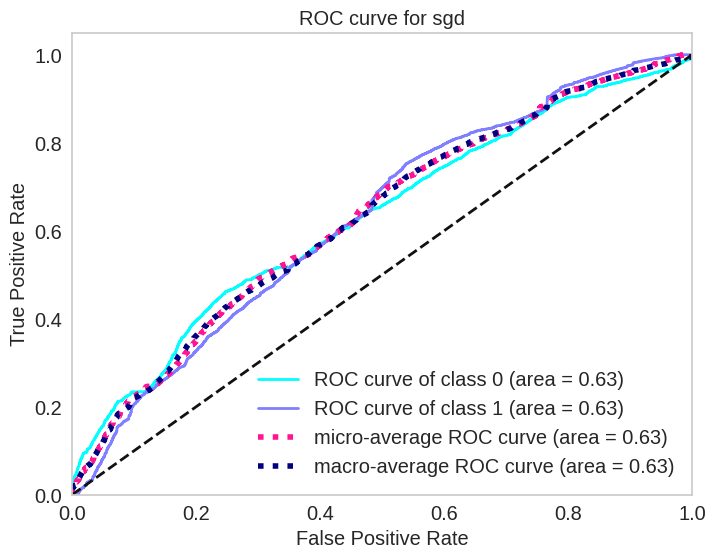

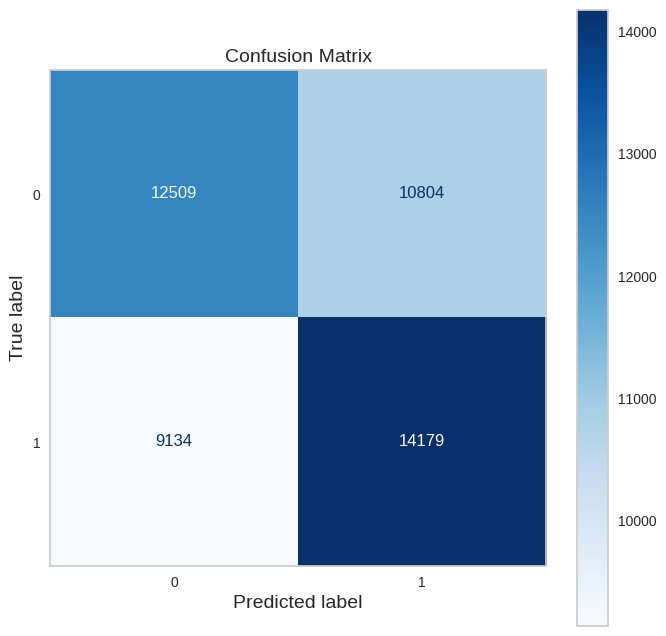



No feature importance for sgd






----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.59      0.55      0.57     23313
           1       0.58      0.63      0.60     23313

    accuracy                           0.59     46626
   macro avg       0.59      0.59      0.59     46626
weighted avg       0.59      0.59      0.59     46626



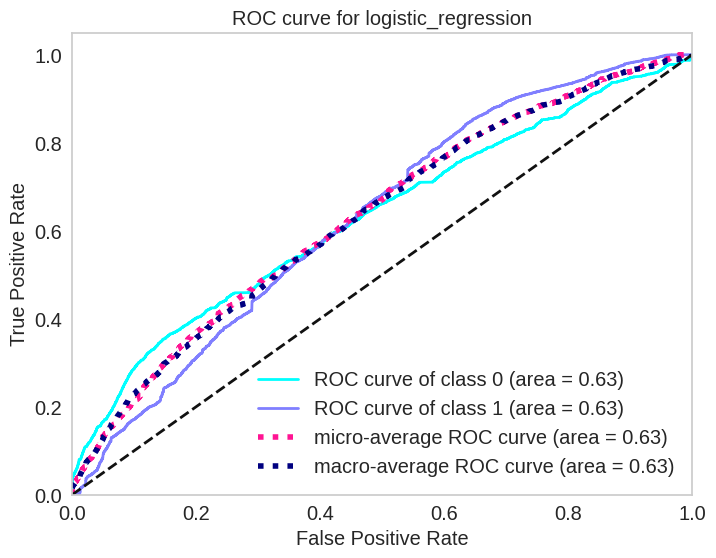

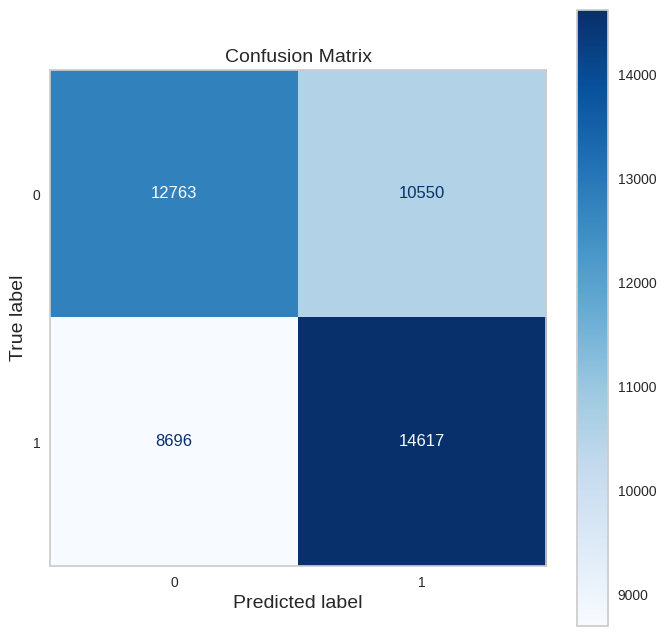

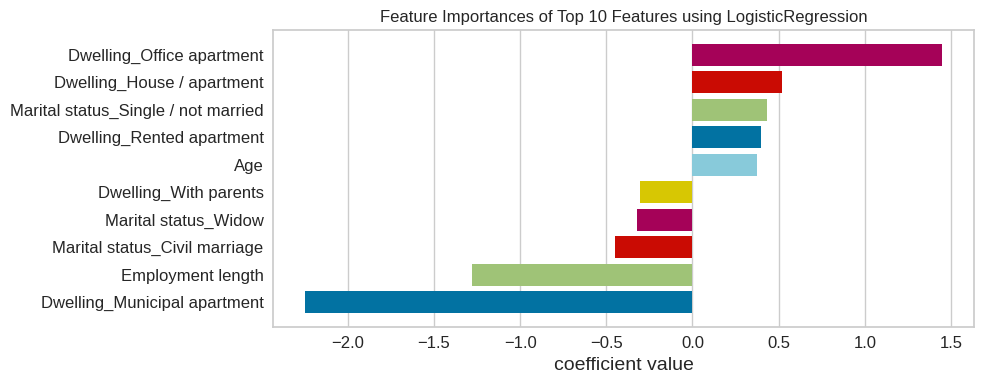

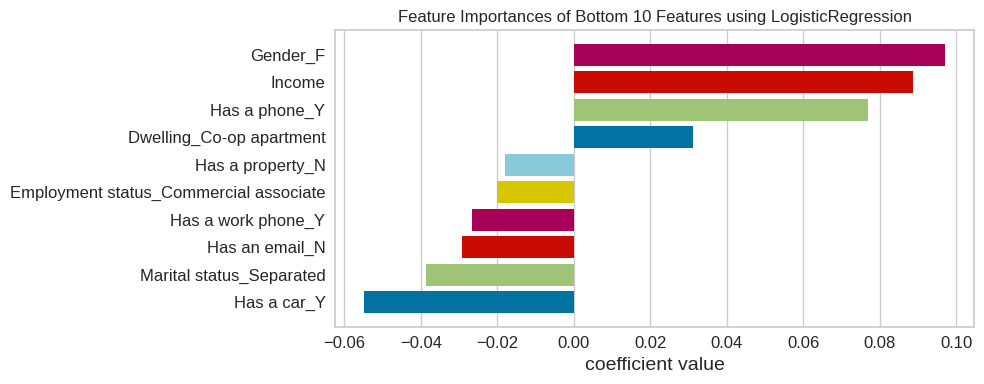







----------------------  support_vector_machine  ----------------------


              precision    recall  f1-score   support

           0       0.93      0.89      0.91     23313
           1       0.89      0.93      0.91     23313

    accuracy                           0.91     46626
   macro avg       0.91      0.91      0.91     46626
weighted avg       0.91      0.91      0.91     46626



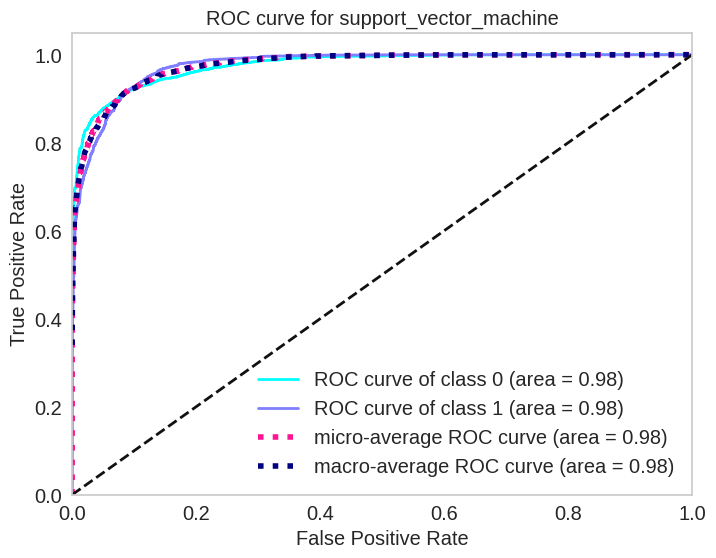

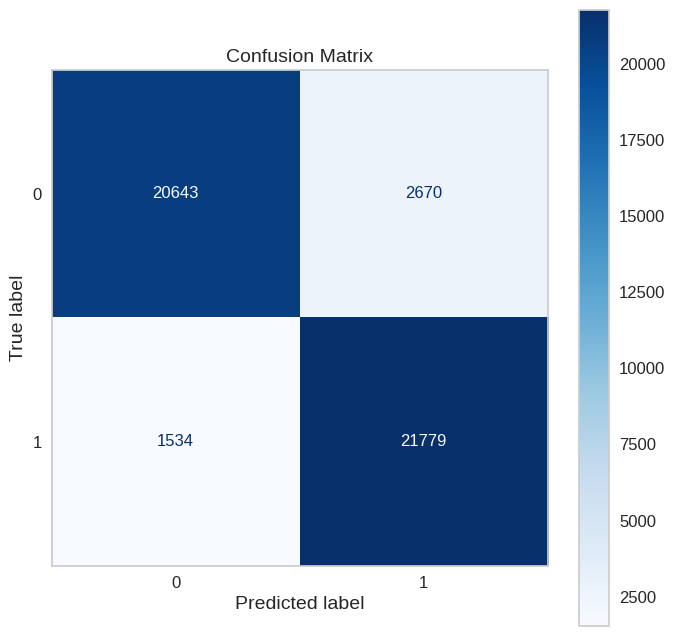



No feature importance for support_vector_machine






----------------------  decision_tree  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23313
           1       0.99      0.99      0.99     23313

    accuracy                           0.99     46626
   macro avg       0.99      0.99      0.99     46626
weighted avg       0.99      0.99      0.99     46626



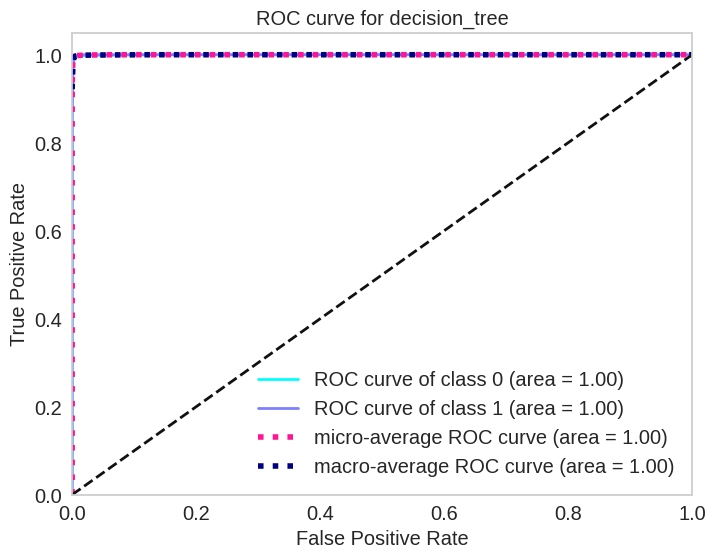

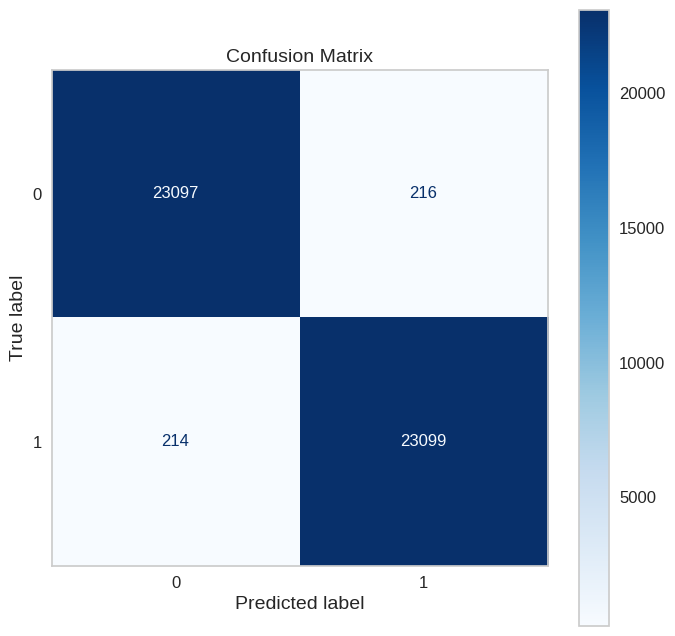

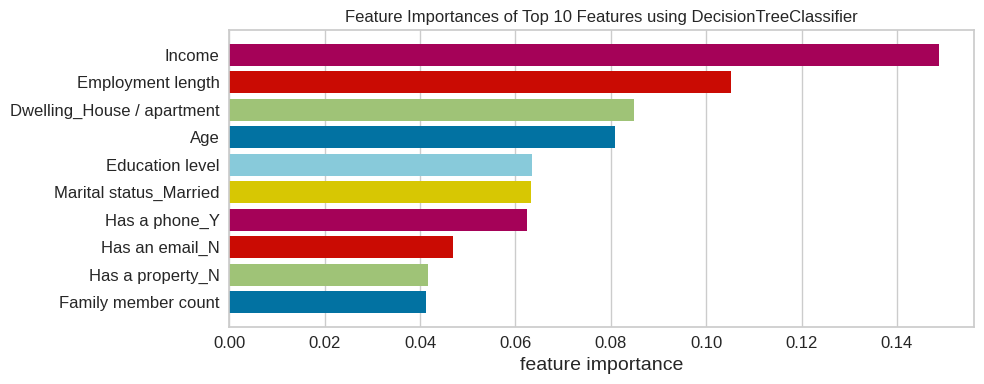

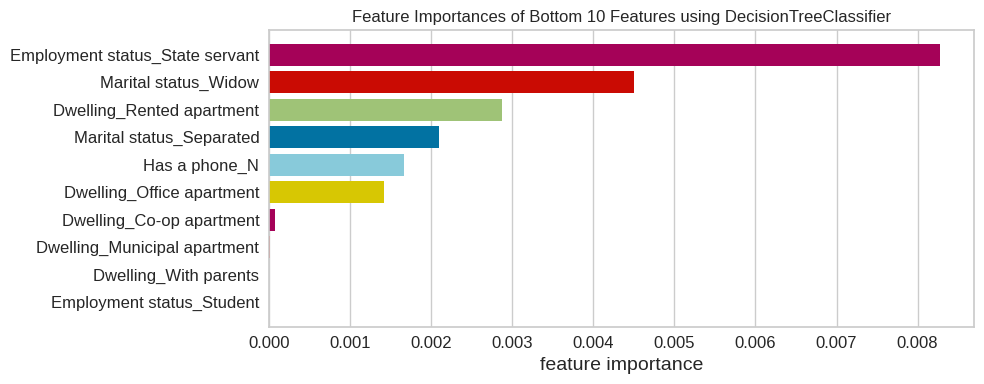







----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23313
           1       0.99      0.99      0.99     23313

    accuracy                           0.99     46626
   macro avg       0.99      0.99      0.99     46626
weighted avg       0.99      0.99      0.99     46626



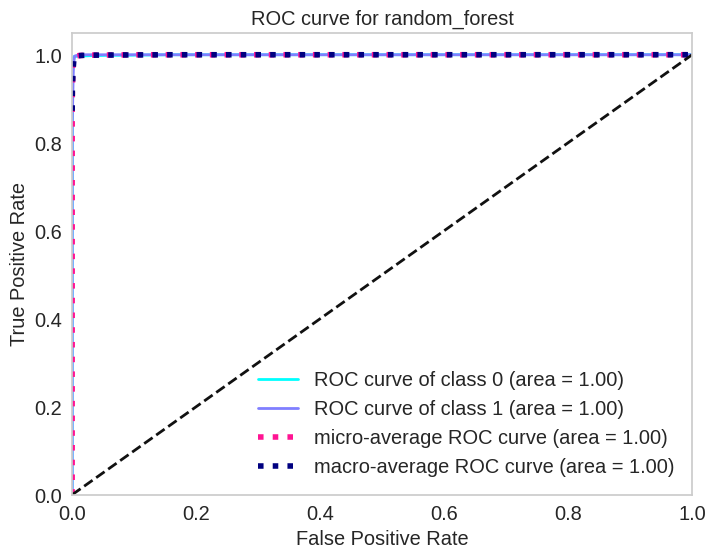

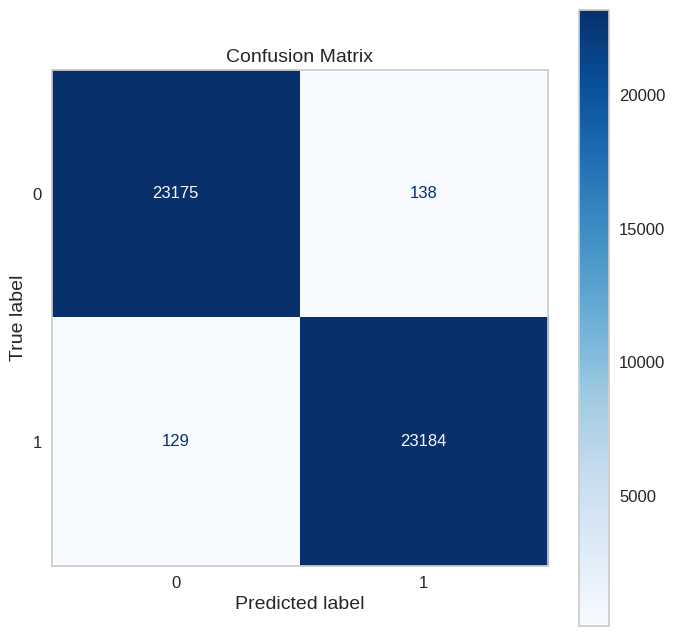

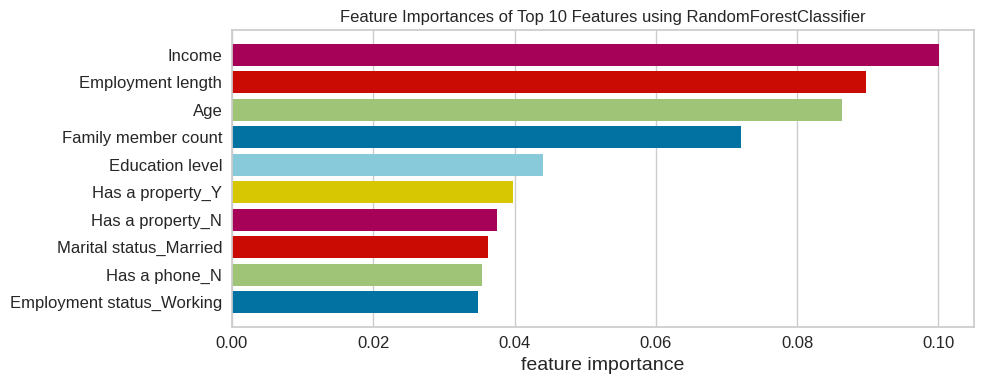

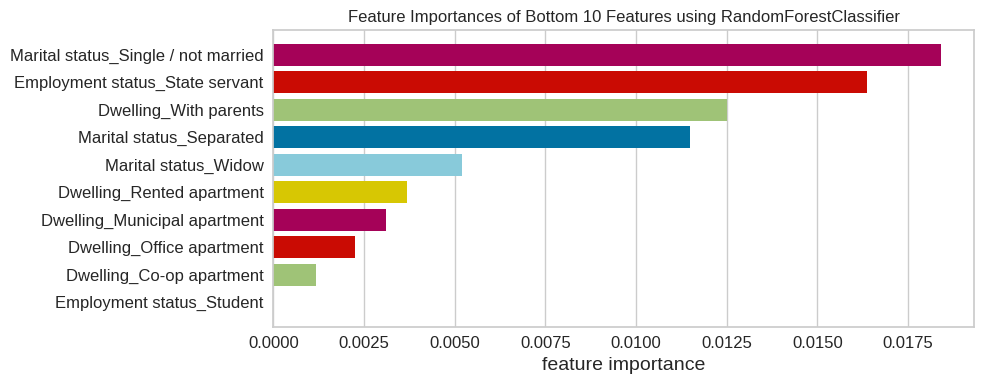







----------------------  gaussian_naive_bayes  ----------------------


              precision    recall  f1-score   support

           0       0.75      0.15      0.26     23313
           1       0.53      0.95      0.68     23313

    accuracy                           0.55     46626
   macro avg       0.64      0.55      0.47     46626
weighted avg       0.64      0.55      0.47     46626



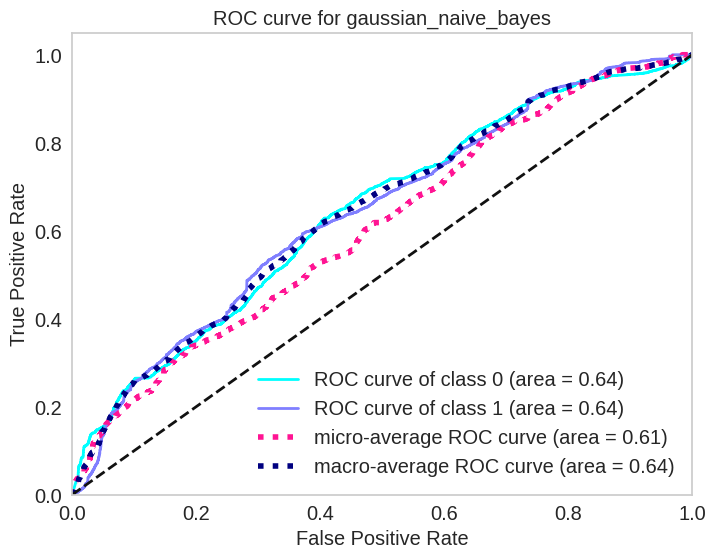

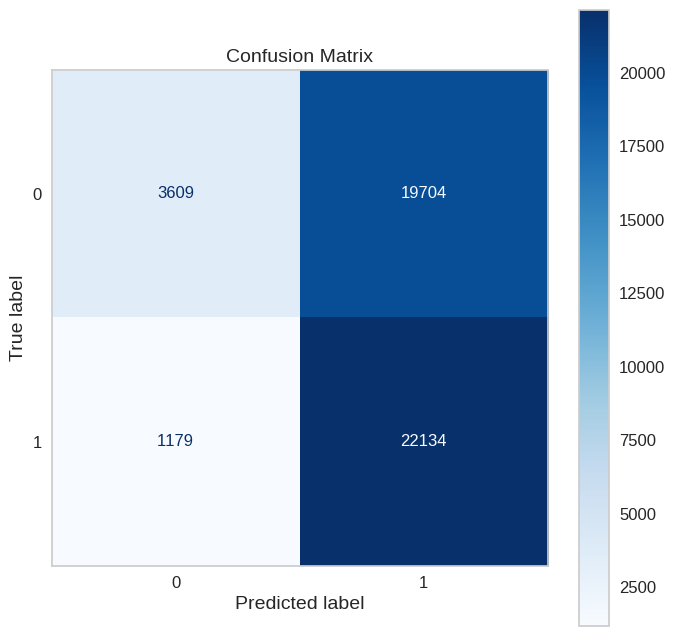



No feature importance for gaussian_naive_bayes






----------------------  k_nearest_neighbors  ----------------------


              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23313
           1       0.98      0.94      0.96     23313

    accuracy                           0.96     46626
   macro avg       0.96      0.96      0.96     46626
weighted avg       0.96      0.96      0.96     46626



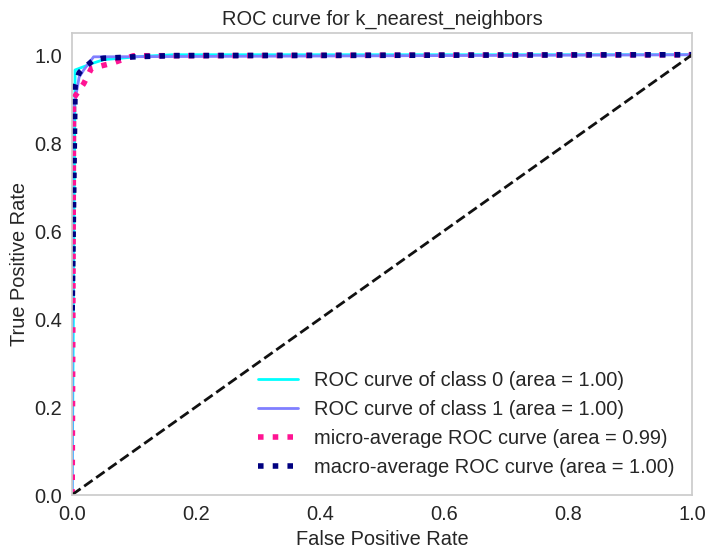

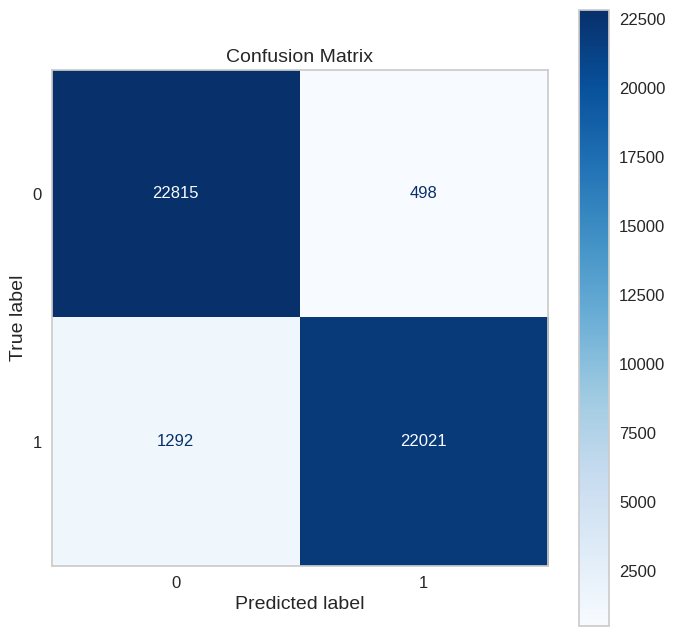



No feature importance for k_nearest_neighbors






----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     23313
           1       0.96      0.94      0.95     23313

    accuracy                           0.95     46626
   macro avg       0.95      0.95      0.95     46626
weighted avg       0.95      0.95      0.95     46626



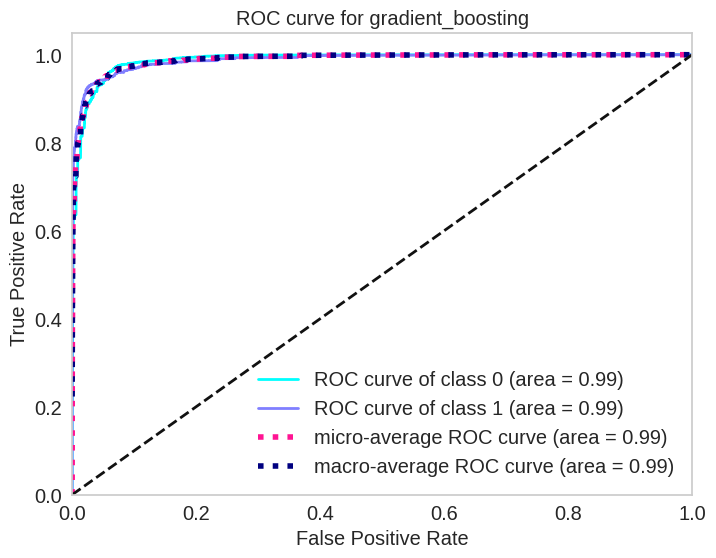

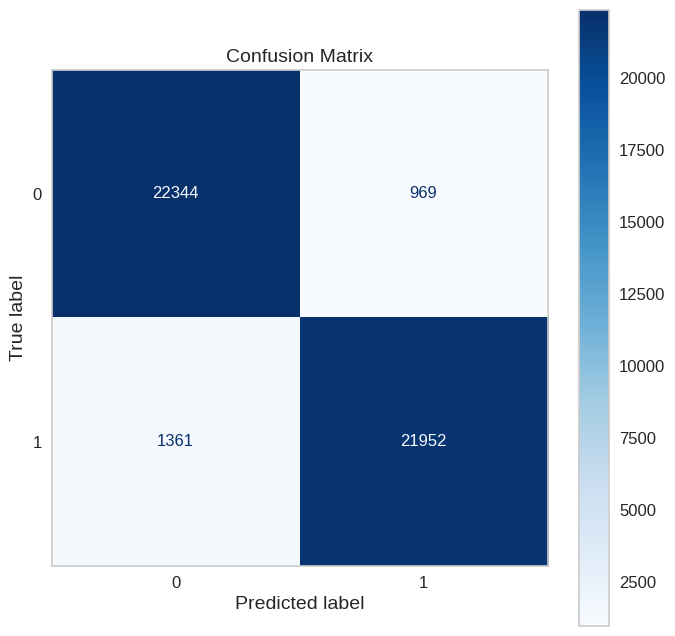

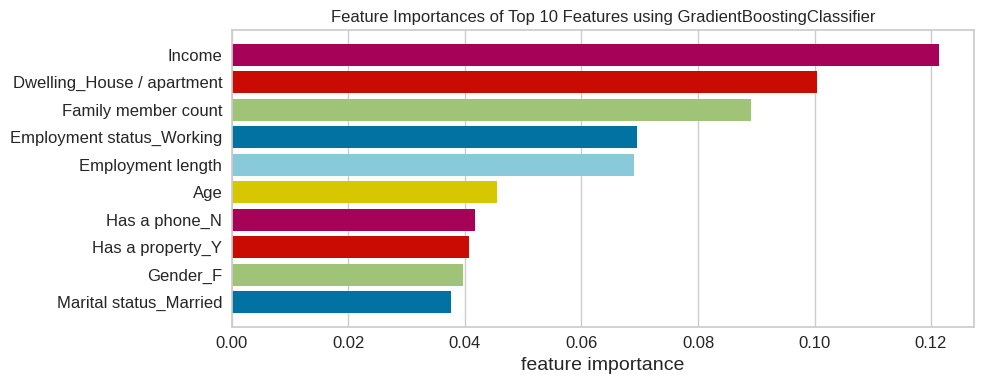

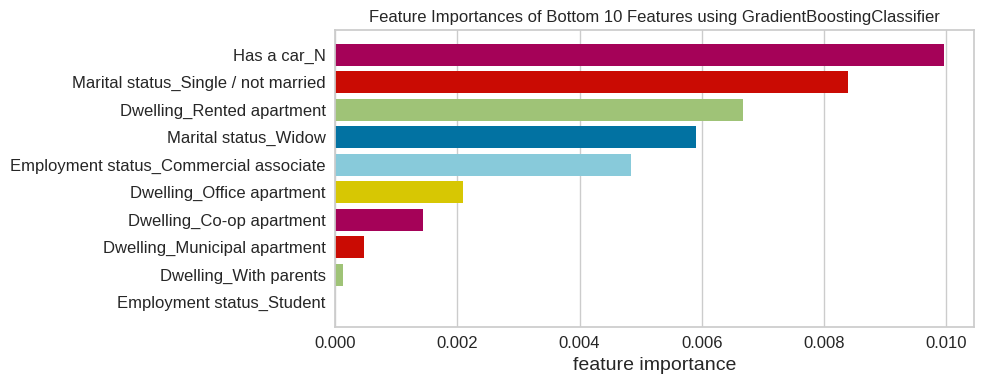







----------------------  linear_discriminant_analysis  ----------------------


              precision    recall  f1-score   support

           0       0.59      0.55      0.57     23313
           1       0.58      0.63      0.60     23313

    accuracy                           0.59     46626
   macro avg       0.59      0.59      0.59     46626
weighted avg       0.59      0.59      0.59     46626



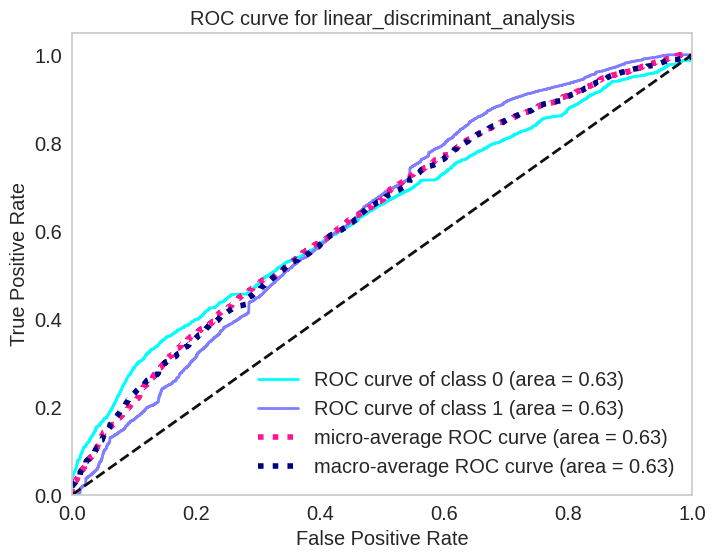

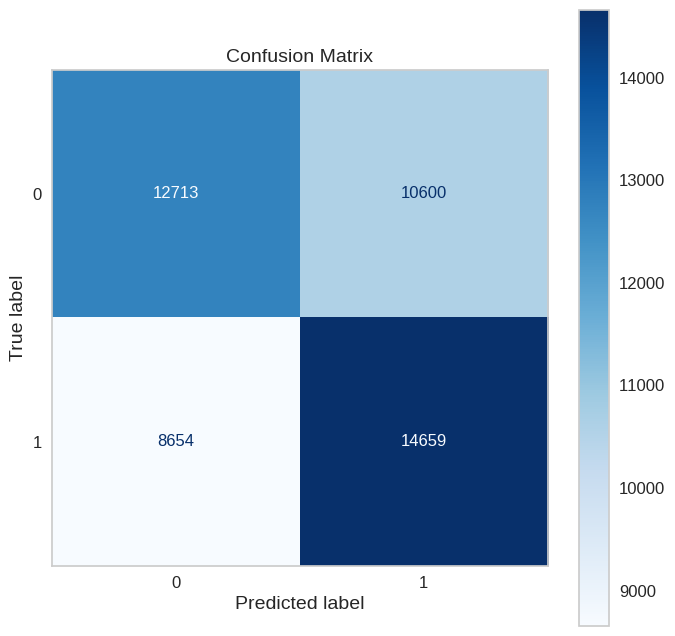

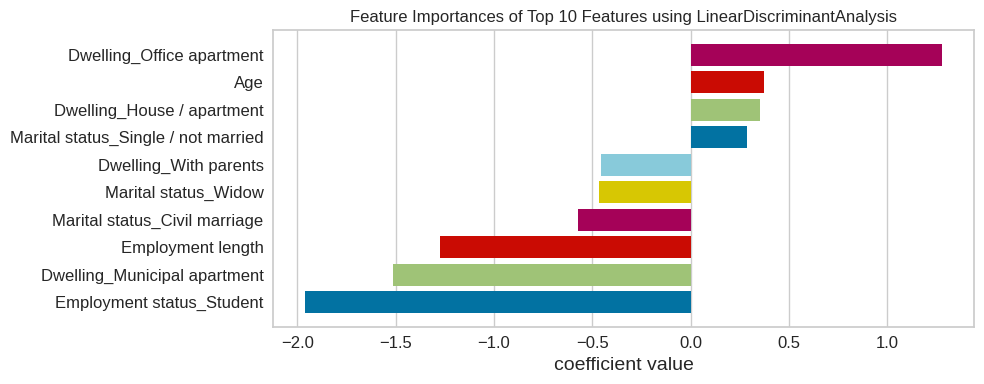

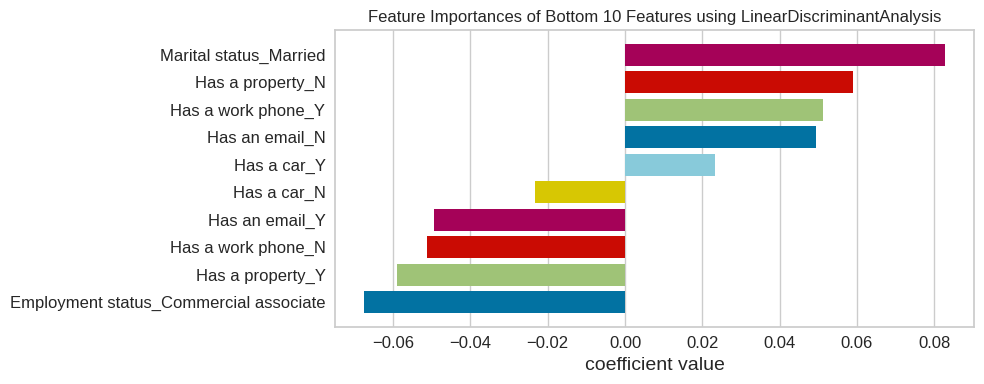







----------------------  bagging  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23313
           1       0.99      0.99      0.99     23313

    accuracy                           0.99     46626
   macro avg       0.99      0.99      0.99     46626
weighted avg       0.99      0.99      0.99     46626



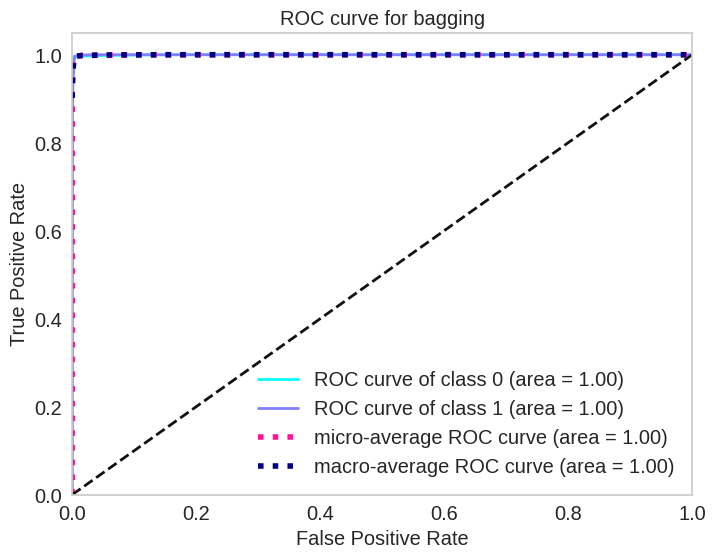

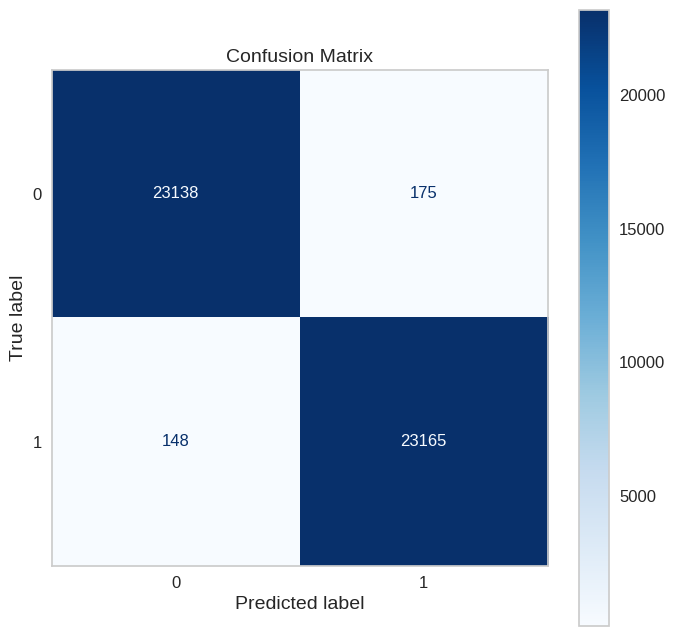



No feature importance for bagging






----------------------  neural_network  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     23313
           1       0.97      0.99      0.98     23313

    accuracy                           0.98     46626
   macro avg       0.98      0.98      0.98     46626
weighted avg       0.98      0.98      0.98     46626



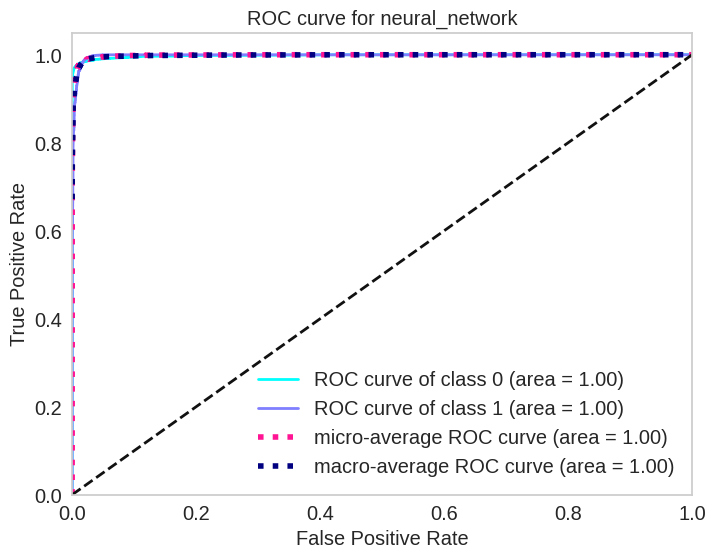

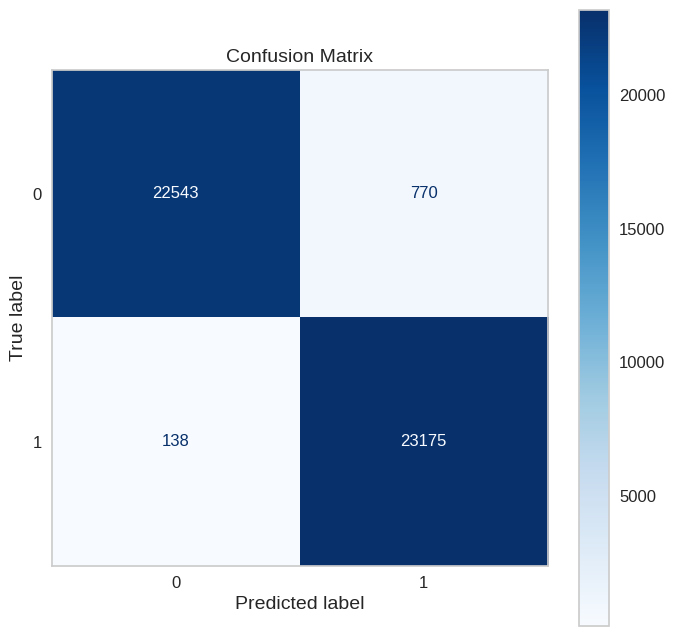



No feature importance for neural_network






----------------------  adaboost  ----------------------


              precision    recall  f1-score   support

           0       0.76      0.70      0.73     23313
           1       0.72      0.78      0.75     23313

    accuracy                           0.74     46626
   macro avg       0.74      0.74      0.74     46626
weighted avg       0.74      0.74      0.74     46626



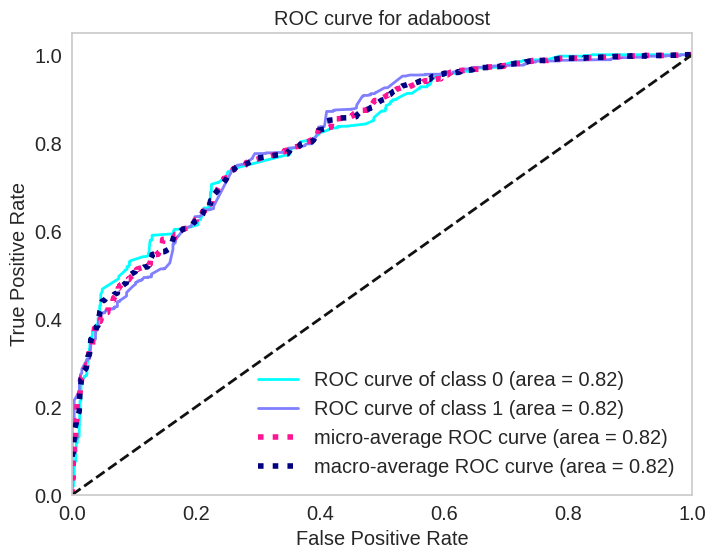

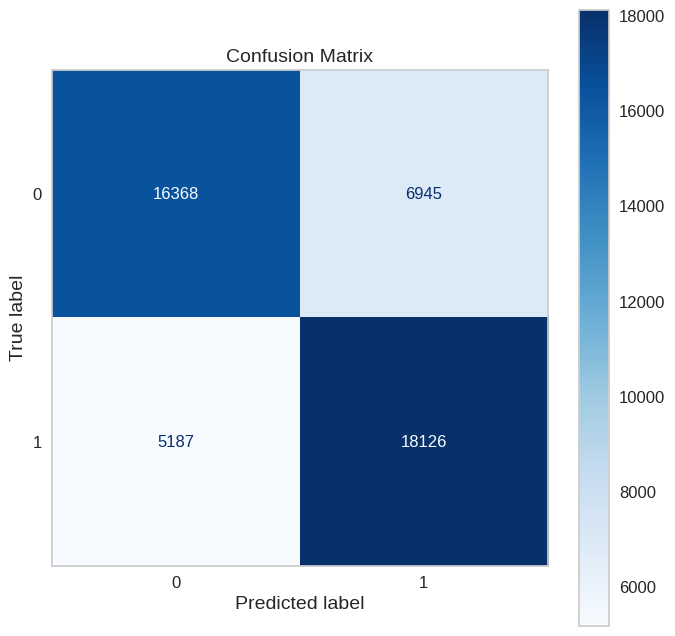

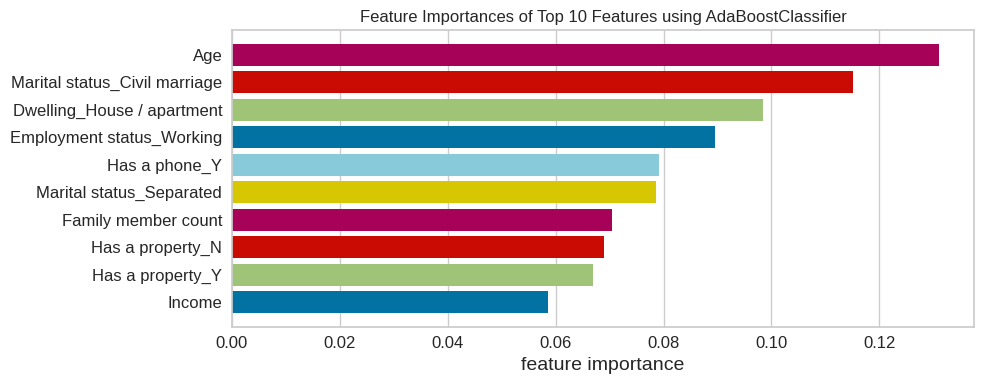

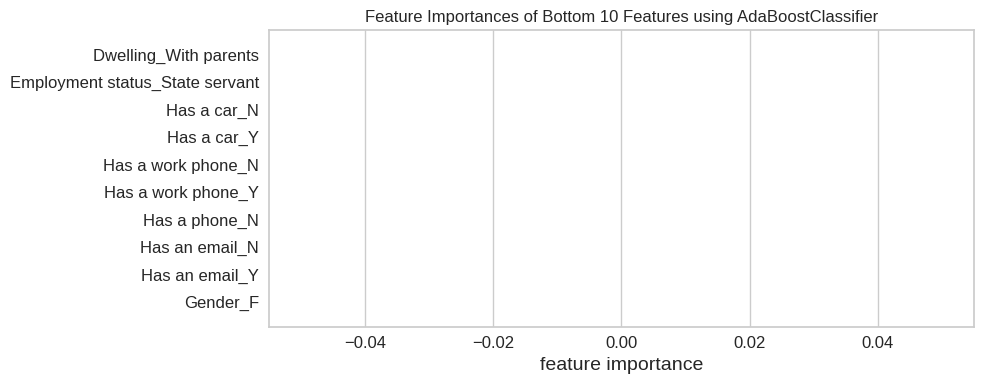







----------------------  extra_trees  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23313
           1       0.99      0.99      0.99     23313

    accuracy                           0.99     46626
   macro avg       0.99      0.99      0.99     46626
weighted avg       0.99      0.99      0.99     46626



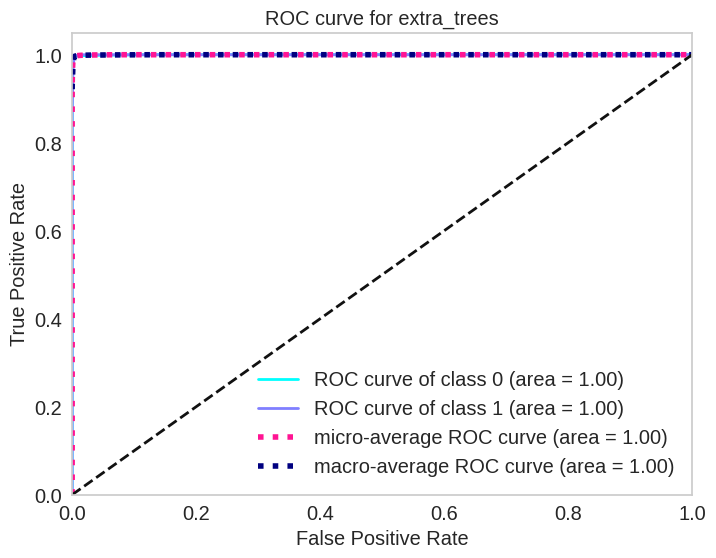

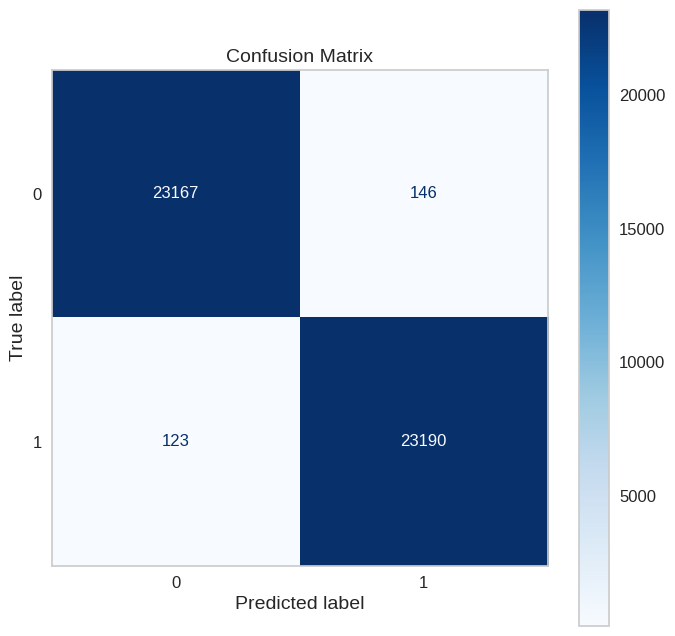

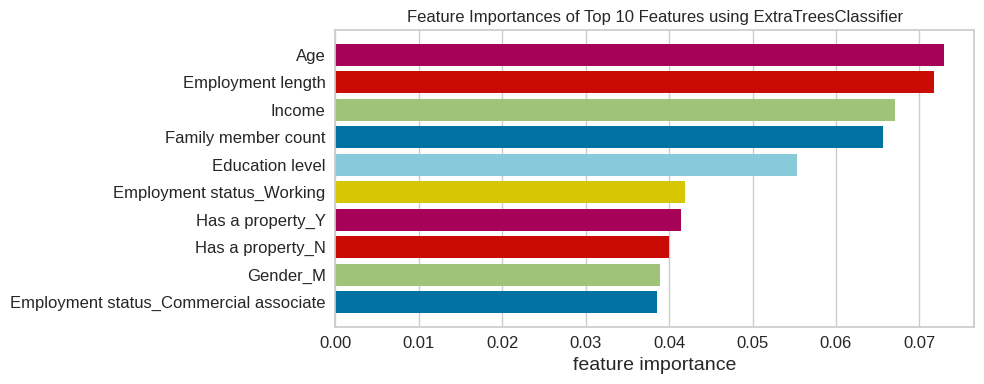

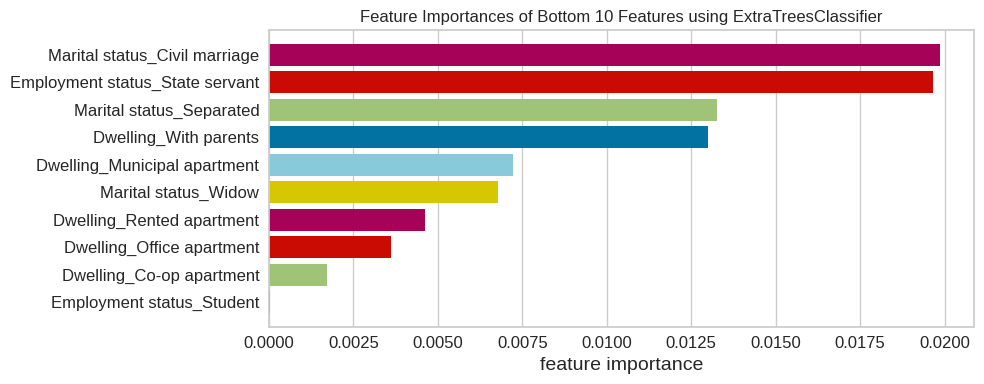

In [139]:
# loop over all the models
for model_name,model in classifiers.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model()
    # train the model
    model_trn = train_model(model,model_name)
    # print the scores from the classification report
    score_func(model_trn, model_name)
    # plot the ROC curve
    roc_curve_func(model_trn,model_name)
    # plot the confusion matrix
    confusion_matrix_func(model_trn,model_name)
    # plot feature importance
    feat_importance_plot(model_trn, model_name)
    warnings.filterwarnings("ignore")

4.2 What metrics to use for this problem?
Since the objective of this problem is to minimize the risk of credit default for the financial institution, the metrics to use depends on the current economical situation:

During the time of a bull market (when the economy is expending), people feel wealthy and usually are employed. Money is usually cheap and the risk of default is low. The financial institution is able to handle the risk of default therefore is not very strict on giving out credit. The financial institution can handle a number of bad clients as long as the vast majority of applicants are good clients (aka those who payback their credit).In this case, having a good recall (sensitivity) is ideal.
During a bear market (when the economy is contracting), people loose their jobs and their money through the stock market. Many people struggle to meet their financial obligations. The financial institution therefore tend to be more conservative on giving out credit or loans. The financial institution can't afford to give out credit to clients who won't be able to pay back their credit. The financial institution would rather have a smaller number of good clients even if it means that some good clients where denied credit, and ideally not have any bad client. In this case, having a good precision (specificity) is desirable.
Note: There is always a trade-off between precision and recall. Choosing the right metrics depends on the problem you are solving.

Conclusion: In our case, since we are in the longest bull market (not including the March 2020 flash crash), we will use recall as our metric.

4.3 Top model
Using the ROC curve and recall, we can that conclude that our top model is:

Gradient boosting classifier

5. Test the final model on the test set

In [140]:
cc_test_copy.head(5)

ID Gender Has a car Has a property  Children count    Income  \
0  5137293      M         Y              N               1 225000.00   
1  5090326      F         N              Y               0 180000.00   
2  5041955      F         N              N               0 157500.00   
3  5115656      F         Y              N               0 270000.00   
4  5028709      F         N              Y               0 247500.00   

      Employment status                Education level Marital status  \
0               Working  Secondary / secondary special        Married   
1             Pensioner  Secondary / secondary special        Married   
2             Pensioner  Secondary / secondary special        Married   
3  Commercial associate  Secondary / secondary special        Married   
4         State servant               Higher education          Widow   

            Dwelling    Age  Employment length  Has a mobile phone  \
0  House / apartment -15243           -7260.00                1.00   
1  House / apartment -21656          365243.00                1.00   
2  House / apartment -20255          365243.00                1.00   
3  House / apartment -14775            -498.00                1.00   
4  House / apartment -19955           -6200.00                1.00   

   Has a work phone  Has a phone  Has an email              Job title  \
0              1.00         1.00          0.00  High skill tech staff   
1              0.00         0.00          0.00                    NaN   
2              0.00         0.00          0.00                    NaN   
3              0.00         0.00          0.00               Managers   
4              0.00         0.00          0.00                    NaN   

   Family member count  Account age Is high risk  
0                 3.00       -12.00            0  
1                 2.00       -14.00            0  
2                 2.00        -9.00            0  
3                 2.00       -31.00            0  
4                 1.00       -33.00            0

In [141]:
cc_test_prep = full_pipeline(cc_test_copy)

In [144]:
# split the train data into X and y (target)
X_cc_test_prep, y_cc_test_prep = cc_test_prep.loc[:, cc_test_prep.columns != 'Is high risk'], cc_test_prep['Is high risk'].astype('int64')

In [145]:

# train the model
model_trn = train_model(classifiers['gradient_boosting'],'gradient_boosting')

In [146]:
final_predictions = model_trn.predict(X_cc_test_prep)

In [147]:
final_predictions.shape

(11580,)

In [148]:
n_correct = sum(final_predictions == y_cc_test_prep)

In [149]:

print(n_correct/len(final_predictions))

0.9221934369602763
